<h1 style="font-size:60px;" align="center"> EASYMONEY CAPSTONE PROJECT <h1>

<h2 style="font-size:50px;" align="center"> ANALYSIS <h2>

<h3 style="font-size:40px;" align="justify"> CONTENT <h3>

<h4 style="font-size:30px;"><b>  A. UNIVARIATE ANALYSIS </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Dataset size (in-memory size, number of registers and attributes, etc.)</li>
    <li>Direct visualization of the data (head)</li>
    <li>Type of variables available (numeric, categorical)</li>
    <li>Descriptive statistics (mean values, dispersion, percentiles, etc.)</li>
    <li>Number of null values / Transform variables</li>
        <div style="font-size:24px;">
            <ul>
            <li>5.1 Check the null values</li>
            <li>5.2 Decode Gender / Deaceased / Salary_unknown</li>
            <li>5.3 Change strings to datetime</li>
            <li>5.4 Grouping customers by age groups</li>
            <li>5.5 Classifying products</li>
            <li>5.6 Printing/Plotting age group composition, mean salary by age group and segment</li>
        </ul>
        </div>

</ol>
</div>

<h4 style="font-size:30px;"><b>  B. MULTIVARIATE ANALYSIS</b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Distribution of variables 2 to 2 (scatter-plots)</li>
        <div style="font-size:24px;">
            <ul>
            <li>1.1 Boxplots Numeric</li>
            <li>1.2 Barcharts Categorical</li>
            <li>1.3 Customers</li>
            <li>1.4 Products over time</li>
        </ul>
        </div>
    <li>Correlation between products and numeric variables</li>
    <div style="font-size:24px;">
            <ul>
            <li>2.1 Correlation matrix</li>
            <li>2.2 Sub barplots for each product considering the remaining products</li>
        </ul>
        </div>
</ol>
</div>

<h4 style="font-size:30px;"><b> C. ANALYSIS BY CLIENT </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Creating a new dataframe by grouping by client cid</li>
    <li>Identification of outliers</li>
</ol>
</div>

<h4 style="font-size:30px;"><b> D. ANALYSIS BY SALES </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Creating the sales' dataframe</li>
    <li>Plotting the sales' dataframe for all pk_partition</li>
    <div style="font-size:24px;">
            <ul>
            <li>2.1 Plotting the sales' dataframe for all pk_partition</li>
            <li>2.2 Plotting the sales' dataframe for the last 6 months</li>
            <li>2.3 Sales on the last month by customer antiquity</li>
        </ul>
        </div>
</ol>
</div>

<h4 style="font-size:30px;"><b> E. PRE-ANALYSIS OF CLUSTERS </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Antiquity</li>
    <div style="font-size:24px;">
            <ul>
            <li>1.1 Number of customers that buy each product by antiquity</li>
        </ul>
        </div>
    <li>Segment</li>
    <div style="font-size:24px;">
            <ul>
            <li>2.1 Number of customers that buy each product by segment</li>
            <li>2.2 Number of particulares' customers that buy each product by age group</li>
            <li>2.3 Number of universitarios' customers that buy each product by age group</li>
            <li>2.4 Number of top' customers that buy each product by age group</li>
        </ul>
        </div>
        <li>Salary</li>
    <div style="font-size:24px;">
            <ul>
            <li>3.1 Number of customers that buy each product by salary level</li>
            <li>3.2 Number of customers that buy each product by salary level (and segment)</li>
        </ul>
        </div>
</ol>
</div>

<h4 style="font-size:30px;"><b> F. NOTES </b></h4>

<h4 style="font-size:30px;"><b> G. SAVE THE FILES </b></h4>
<br><br>

## IMPORT LIBRARIES + DATASETS

In [2]:
import pandas as pd
import numpy as np
import warnings as ws
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns


from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
pd.options.plotting.backend = "plotly"

ws.filterwarnings("ignore")

commercial_act_df = pd.read_csv("data/cleaned_new_commercial_activity_df.csv")
commercial_act_df = commercial_act_df.rename(columns={"Unnamed: 0": "id"})

products_df = pd.read_csv("data/cleaned_new_product_dataset_df.csv")
products_df = products_df.rename(columns={"Unnamed: 0": "id"})

socio_demo_df = pd.read_csv("data/cleaned_new_socio_demo_df.csv")
socio_demo_df = socio_demo_df.rename(columns={"Unnamed: 0": "id"})

## PRINT HEAD FOR ALL 3 ENTITIES

First let's print the first three columns of each dataframe:

In [3]:
commercial_act_df.head(3)

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0  1375586   2018-01-28  2018-01-12           KHL              1.0   
1  1050611   2018-01-28  2015-08-10           KHE              0.0   
2  1050612   2018-01-28  2015-08-10           KHE              0.0   

              segment  
0   02 - PARTICULARES  
1  03 - UNIVERSITARIO  
2  03 - UNIVERSITARIO

In [4]:
products_df.head(3)

pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0  1375586   2018-01-28                   0      0         0      0   
1  1050611   2018-01-28                   0      0         0      0   
2  1050612   2018-01-28                   0      0         0      0   

   securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0           0                  0              0            0      0.0   
1           0                  0              0            0      0.0   
2           0                  0              0            0      0.0   

   pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0           0.0                0            0           0             0   
1           0.0                0            0           0             0   
2           0.0                0            0           0             0   

   em_acount  
0          1  
1          1  
2          1

In [5]:
socio_demo_df.head(3)

pk_cid pk_partition country_id  region_code gender  age deceased  \
0  1375586   2018-01-28         ES         29.0      H   35        N   
1  1050611   2018-01-28         ES         13.0      V   23        N   
2  1050612   2018-01-28         ES         13.0      V   23        N   

      salary  salary_unknown  
0   87218.10           False  
1   35548.74           False  
2  122179.11           False

## MERGE ALL ENTITIES IN ONE FINAL DATASET

Then we merge the dataframes by pk_cid and pk_partition.

In [6]:
commercial_prod_temp = commercial_act_df.merge(products_df, on=["pk_cid","pk_partition"],how="inner")
full_commercial_df = commercial_prod_temp.merge(socio_demo_df, on=["pk_cid","pk_partition"],how="inner")
full_commercial_df.head()

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0  1375586   2018-01-28  2018-01-12           KHL              1.0   
1  1050611   2018-01-28  2015-08-10           KHE              0.0   
2  1050612   2018-01-28  2015-08-10           KHE              0.0   
3  1050613   2018-01-28  2015-08-10           KHD              0.0   
4  1050614   2018-01-28  2015-08-10           KHE              1.0   

              segment  short_term_deposit  loans  mortgage  funds  ...  \
0   02 - PARTICULARES                   0      0         0      0  ...   
1  03 - UNIVERSITARIO                   0      0         0      0  ...   
2  03 - UNIVERSITARIO                   0      0         0      0  ...   
3  03 - UNIVERSITARIO                   1      0         0      0  ...   
4  03 - UNIVERSITARIO                   0      0         0      0  ...   

   debit_card  em_account_p  em_acount  country_id  region_code  gender  age  \
0           0             0          1          ES         29.0       H   35   
1           0             0          1          ES         13.0       V   23   
2           0             0          1          ES         13.0       V   23   
3           0             0          0          ES         50.0       H   22   
4           0             0          1          ES         50.0       V   23   

   deceased     salary  salary_unknown  
0         N   87218.10           False  
1         N   35548.74           False  
2         N  122179.11           False  
3         N  119775.54           False  
4         N      -1.00            True  

[5 rows x 28 columns]

In [7]:
full_commercial_df.T

0                   1                   2        \
pk_cid                        1375586             1050611             1050612   
pk_partition               2018-01-28          2018-01-28          2018-01-28   
entry_date                 2018-01-12          2015-08-10          2015-08-10   
entry_channel                     KHL                 KHE                 KHE   
active_customer                   1.0                 0.0                 0.0   
segment             02 - PARTICULARES  03 - UNIVERSITARIO  03 - UNIVERSITARIO   
short_term_deposit                  0                   0                   0   
loans                               0                   0                   0   
mortgage                            0                   0                   0   
funds                               0                   0                   0   
securities                          0                   0                   0   
long_term_deposit                   0                   0                   0   
em_account_pp                       0                   0                   0   
credit_card                         0                   0                   0   
payroll                           0.0                 0.0                 0.0   
pension_plan                      0.0                 0.0                 0.0   
payroll_account                     0                   0                   0   
emc_account                         0                   0                   0   
debit_card                          0                   0                   0   
em_account_p                        0                   0                   0   
em_acount                           1                   1                   1   
country_id                         ES                  ES                  ES   
region_code                      29.0                13.0                13.0   
gender                              H                   V                   V   
age                                35                  23                  23   
deceased                            N                   N                   N   
salary                        87218.1            35548.74           122179.11   
salary_unknown                  False               False               False   

                               3                   4        \
pk_cid                         1050613             1050614   
pk_partition                2018-01-28          2018-01-28   
entry_date                  2015-08-10          2015-08-10   
entry_channel                      KHD                 KHE   
active_customer                    0.0                 1.0   
segment             03 - UNIVERSITARIO  03 - UNIVERSITARIO   
short_term_deposit                   1                   0   
loans                                0                   0   
mortgage                             0                   0   
funds                                0                   0   
securities                           0                   0   
long_term_deposit                    0                   0   
em_account_pp                        0                   0   
credit_card                          0                   0   
payroll                            0.0                 0.0   
pension_plan                       0.0                 0.0   
payroll_account                      0                   0   
emc_account                          0                   0   
debit_card                           0                   0   
em_account_p                         0                   0   
em_acount                            0                   1   
country_id                          ES                  ES   
region_code                       50.0                50.0   
gender                               H                   V   
age                                 22                  23   
deceased                             N                   N   
salary

In [14]:
full_commercial_df.shape

(5962924, 28)

__________________
# A. UNIVARIATE ANALYSIS
__________________

## 1. Dataset size (in-memory size, number of registers and attributes, etc.)

In [102]:
print(f"Size of dataframe: {full_commercial_df.shape[0]}")
print(f"# unique rows: {full_commercial_df.duplicated().shape[0]}")
print(f"# unique pk_cid: {full_commercial_df['pk_cid'].nunique()}")

Size of dataframe: 5962924


# unique rows: 5962924
# unique pk_cid: 456373


## 2. Direct visualization of the data (head)

In [103]:
full_commercial_df.head()

pk_cid pk_partition  entry_date entry_channel  active_customer  \
0  1375586   2018-01-28  2018-01-12           KHL              1.0   
1  1050611   2018-01-28  2015-08-10           KHE              0.0   
2  1050612   2018-01-28  2015-08-10           KHE              0.0   
3  1050613   2018-01-28  2015-08-10           KHD              0.0   
4  1050614   2018-01-28  2015-08-10           KHE              1.0   

              segment  short_term_deposit  loans  mortgage  funds  ...  \
0   02 - PARTICULARES                   0      0         0      0  ...   
1  03 - UNIVERSITARIO                   0      0         0      0  ...   
2  03 - UNIVERSITARIO                   0      0         0      0  ...   
3  03 - UNIVERSITARIO                   1      0         0      0  ...   
4  03 - UNIVERSITARIO                   0      0         0      0  ...   

   debit_card  em_account_p  em_acount  country_id  region_code  gender  age  \
0           0             0          1          ES         29.0       H   35   
1           0             0          1          ES         13.0       V   23   
2           0             0          1          ES         13.0       V   23   
3           0             0          0          ES         50.0       H   22   
4           0             0          1          ES         50.0       V   23   

   deceased     salary  salary_unknown  
0         N   87218.10           False  
1         N   35548.74           False  
2         N  122179.11           False  
3         N  119775.54           False  
4         N      -1.00            True  

[5 rows x 28 columns]

## 3. Type of variables available (numeric, categorical)

In [104]:
print(full_commercial_df.dtypes)

pk_cid                  int64
pk_partition           object
entry_date             object
entry_channel          object
active_customer       float64
segment                object
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
salary_unknown           bool
dtype: object


## 4.  Descriptive statistics (mean values, dispersion, percentiles, etc.)

In [105]:
full_commercial_df.describe()

pk_cid  active_customer  short_term_deposit         loans  \
count  5.962924e+06     5.962924e+06        5.962924e+06  5.962924e+06   
mean   1.234930e+06     4.033845e-01        2.581619e-03  7.848498e-05   
std    1.623020e+05     4.905767e-01        5.074401e-02  8.858828e-03   
min    1.589100e+04     0.000000e+00        0.000000e+00  0.000000e+00   
25%    1.112532e+06     0.000000e+00        0.000000e+00  0.000000e+00   
50%    1.231097e+06     0.000000e+00        0.000000e+00  0.000000e+00   
75%    1.352339e+06     1.000000e+00        0.000000e+00  0.000000e+00   
max    1.553689e+06     1.000000e+00        1.000000e+00  1.000000e+00   

           mortgage         funds    securities  long_term_deposit  \
count  5.962924e+06  5.962924e+06  5.962924e+06       5.962924e+06   
mean   5.433576e-05  3.370662e-03  3.711770e-03       1.688098e-02   
std    7.371080e-03  5.795948e-02  6.081113e-02       1.288255e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00       1.000000e+00   

       em_account_pp   credit_card       payroll  pension_plan  \
count      5962924.0  5.962924e+06  5.962924e+06  5.962924e+06   
mean             0.0  1.188444e-02  3.451109e-02  3.652604e-02   
std              0.0  1.083660e-01  1.825379e-01  1.875950e-01   
min              0.0  0.000000e+00  0.000000e+00  0.000000e+00   
25%              0.0  0.000000e+00  0.000000e+00  0.000000e+00   
50%              0.0  0.000000e+00  0.000000e+00  0.000000e+00   
75%              0.0  0.000000e+00  0.000000e+00  0.000000e+00   
max              0.0  1.000000e+00  1.000000e+00  1.000000e+00   

       payroll_account   emc_account    debit_card  em_account_p  \
count     5.962924e+06  5.962924e+06  5.962924e+06  5.962924e+06   
mean      5.524471e-02  5.483233e-02  9.441140e-02  5.701901e-06   
std       2.284573e-01  2.276527e-01  2.924002e-01  2.387859e-03   
min       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          em_acount   region_code           age        salary  
count  5.962924e+06  5.962924e+06  5.962924e+06  5.962924e+06  
mean   7.348076e-01  2.580466e+01  2.976042e+01  8.644718e+04  
std    4.414356e-01  1.360233e+01  1.198038e+01  1.796161e+05  
min    0.000000e+00  0.000000e+00  2.000000e+00 -1.000000e+00  
25%    0.000000e+00  1.300000e+01  2.200000e+01 -1.000000e+00  
50%    1.000000e+00  2.800000e+01  2.500000e+01  6.969621e+04  
75%    1.000000e+00  3.600000e+01  3.400000e+01  1.134622e+05  
max    1.000000e+00  5.200000e+01  1.050000e+02  2.889440e+07

In [106]:
full_commercial_df.describe(include='object')

pk_partition  entry_date entry_channel             segment country_id  \
count       5962924     5962924       5962924             5962924    5962924   
unique           17        1497            69                   4         41   
top      2019-05-28  2017-07-28           KHE  03 - UNIVERSITARIO         ES   
freq         442995       57389       3113947             3900166    5960672   

         gender deceased  
count   5962924  5962924  
unique        3        2  
top           H        N  
freq    3087502  5961849

## 5.  Number of null values / Transform variables

### 5.1 Check the null values

The dataframes don't have any null values because it was already pre-cleaned before.

In [107]:
df_nulls=pd.DataFrame(full_commercial_df.isna().any())
size_=full_commercial_df.shape[0]*100

null_count_df=pd.DataFrame(columns = ['Field', 'Counting', 'Percentage'])

for idx, row in df_nulls.iterrows():
    if df_nulls.loc[idx].values[0]:
        n_=full_commercial_df[full_commercial_df[idx].isna()].shape[0]
        null_count_df.loc[len(null_count_df.index)] = [idx, n_, round(n_/size_*100,2)]  

null_count_df.head(10)


Empty DataFrame
Columns: [Field, Counting, Percentage]
Index: []

### 5.2 Decode Gender / Deaceased / Salary_unknown

Let's decode some binary variables to 0 and 1, namely, gender, deceased and salary_unknown.

In [108]:
Gender = {'H': 1, 'V': 0, 'UNKNOWN': -1}
full_commercial_df.gender = [Gender[item] for item in full_commercial_df.gender]

Deceased = {'S': 1, 'N': 0}
full_commercial_df.deceased = [Deceased[item] for item in full_commercial_df.deceased]

Salary_unknown = {True: 1, False: 0}
full_commercial_df.salary_unknown = [Salary_unknown[item] for item in full_commercial_df.salary_unknown]

In [109]:
customers_ids = full_commercial_df[full_commercial_df["segment"]=="UNKNOWN"]["pk_cid"].unique() #1060507, 1035728, 1040205, ..., 1173729, 1164094, 1550586

In [110]:
full_commercial_salary_df = full_commercial_df[["pk_cid","salary_unknown"]].groupby(["pk_cid"]).max()
print(f"Percentage of customers with no salary {round(full_commercial_salary_df['salary_unknown'].sum()/full_commercial_salary_df['salary_unknown'].count()*100,2)}")

Percentage of customers with no salary 34.39


### 5.3 Change strings to datetime

In [111]:
full_commercial_df["entry_date"]=pd.to_datetime(full_commercial_df["entry_date"],format='%Y-%m-%d')
full_commercial_df["pk_partition"]=pd.to_datetime(full_commercial_df["pk_partition"],format='%Y-%m-%d')
full_commercial_df[["entry_date","pk_partition"]].dtypes

entry_date      datetime64[ns]
pk_partition    datetime64[ns]
dtype: object

In [112]:
for col in ["pk_partition"]:
  full_commercial_df[col + "_day"] = full_commercial_df[col].dt.day
  full_commercial_df[col + "_month"] = full_commercial_df[col].dt.month
  full_commercial_df[col + "_year"] = full_commercial_df[col].dt.year

### 5.4  Grouping customers by age groups

Regarding the ages, we create a new column with age groups according the age of each customer:

In [113]:
Age_bins = [0, 18, 35, 55, 65, float('inf')]
Age_labels = ['Teenager','Young Adults', 'Adults', 'Senior', 'Old Age']
full_commercial_df['Age_group'] = pd.cut(full_commercial_df['age'], bins= Age_bins, labels=Age_labels, right= False)
full_commercial_df.head()

pk_cid pk_partition entry_date entry_channel  active_customer  \
0  1375586   2018-01-28 2018-01-12           KHL              1.0   
1  1050611   2018-01-28 2015-08-10           KHE              0.0   
2  1050612   2018-01-28 2015-08-10           KHE              0.0   
3  1050613   2018-01-28 2015-08-10           KHD              0.0   
4  1050614   2018-01-28 2015-08-10           KHE              1.0   

              segment  short_term_deposit  loans  mortgage  funds  ...  \
0   02 - PARTICULARES                   0      0         0      0  ...   
1  03 - UNIVERSITARIO                   0      0         0      0  ...   
2  03 - UNIVERSITARIO                   0      0         0      0  ...   
3  03 - UNIVERSITARIO                   1      0         0      0  ...   
4  03 - UNIVERSITARIO                   0      0         0      0  ...   

   region_code  gender  age  deceased     salary  salary_unknown  \
0         29.0       1   35         0   87218.10               0   
1         13.0       0   23         0   35548.74               0   
2         13.0       0   23         0  122179.11               0   
3         50.0       1   22         0  119775.54               0   
4         50.0       0   23         0      -1.00               1   

   pk_partition_day  pk_partition_month  pk_partition_year     Age_group  
0                28                   1               2018        Adults  
1                28                   1               2018  Young Adults  
2                28                   1               2018  Young Adults  
3                28                   1               2018  Young Adults  
4                28                   1               2018  Young Adults  

[5 rows x 32 columns]

### 5.5 Classifying products

Then we create a column to save the type of each product: saving, financial, investment or account_type.

In [114]:
conditions_0 = [
    ((full_commercial_df['long_term_deposit']==1) | (full_commercial_df['pension_plan']==1) | (full_commercial_df['short_term_deposit']==1)),
    ~((full_commercial_df['long_term_deposit']==1) | (full_commercial_df['pension_plan']==1) | (full_commercial_df['short_term_deposit']==1))]

values_0 = [1,0]

full_commercial_df['saving_product'] = np.select(conditions_0, values_0)

conditions_0 = [
    ((full_commercial_df['funds']==1) | (full_commercial_df['securities']==1)),
    ~((full_commercial_df['funds']==1) | (full_commercial_df['securities']==1))]

full_commercial_df['financial_product'] = np.select(conditions_0, values_0)

conditions_0 = [
    ((full_commercial_df['credit_card']==1) | (full_commercial_df['loans']==1) | (full_commercial_df['mortgage']==1)),
    ~((full_commercial_df['credit_card']==1) | (full_commercial_df['loans']==1) | (full_commercial_df['mortgage']==1))]

full_commercial_df['investment_product'] = np.select(conditions_0, values_0)

conditions_0 = [
    ((full_commercial_df['debit_card']==1) | (full_commercial_df['em_acount']==1) | (full_commercial_df['emc_account']==1)
            | (full_commercial_df['payroll']==1) | (full_commercial_df['payroll_account']==1) | (full_commercial_df['em_account_p']==1) | (full_commercial_df['em_account_pp']==1)),
    ~((full_commercial_df['debit_card']==1) | (full_commercial_df['em_acount']==1) | (full_commercial_df['emc_account']==1)
            | (full_commercial_df['payroll']==1) | (full_commercial_df['payroll_account']==1) | (full_commercial_df['em_account_p']==1) | (full_commercial_df['em_account_pp']==1))]

full_commercial_df['account_type'] = np.select(conditions_0, values_0)

### 5.6  Printing/Plotting age group composition, mean salary by age group and segment

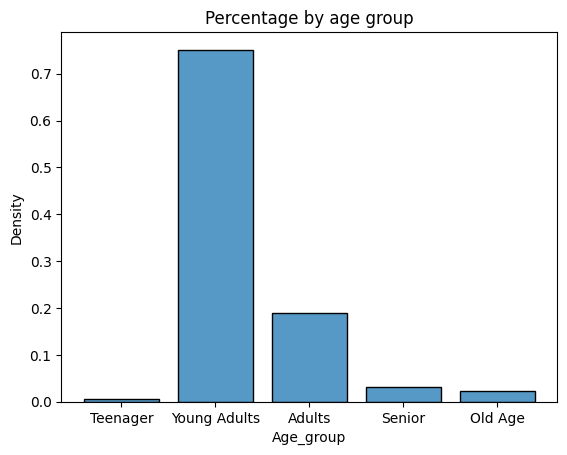

In [115]:
sns.histplot(x = full_commercial_df['Age_group'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.title("Percentage by age group")
plt.show()

In [116]:
print("Average salary by group age:")
for ag in Age_labels:
    print(f'{ag}: €{str(round(full_commercial_df[full_commercial_df["Age_group"]==ag]["salary"].mean(),2))}')

print("\nAverage salary by segment:")
for seg in ["01 - TOP","02 - PARTICULARES","03 - UNIVERSITARIO"]:
    print(f'{seg}: €{str(round(full_commercial_df[full_commercial_df["segment"]==seg]["salary"].mean(),2))}')

Average salary by group age:
Teenager: €122403.69
Young Adults: €85236.22
Adults: €85862.04
Senior: €98060.71
Old Age: €106590.35

Average salary by segment:
01 - TOP: €114306.27
02 - PARTICULARES: €88760.14
03 - UNIVERSITARIO: €86603.52


From the values above we can conclude that the older people tend to have a high salary, in average. The teenagers have the highest mean, but it reflects the salary of this parents and the amount of such customers in the dataset is not so relevante compared with young adults and adults groups.

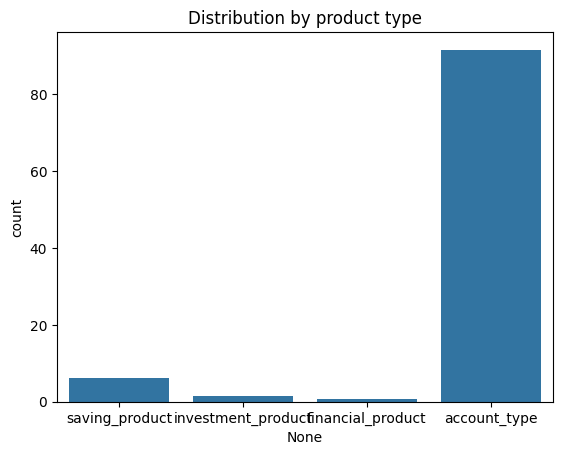

In [117]:
df = pd.DataFrame(full_commercial_df[['saving_product','investment_product','financial_product','account_type']].sum(),columns=['count'])
df["count"]=round(df['count']/df['count'].sum()*100,2)
ax = sns.barplot(x = df.index, y = 'count', data = df).set(title="Distribution by product type")
plt.show()

By the plot above one can say that the account_type is the type of product with more entries in the dataset. Probably directly related with the em_acount which the most common, in general, as we will see along the file.

__________________
# B. MULTIVARIATE ANALYSIS
__________________

## 1.  Distribution of variables 2 to 2 (scatter-plots)

### 1.1  Boxplots Numeric

From the boxplots below one can say that most of the values are concentraded for ages around 20s/30s and, for the salary we can't have a clear understanding, as soon as, they are more concentrated for values close from zero, but the scale os too small for the variable. Furthermore, some of the salaries we signed as -1.

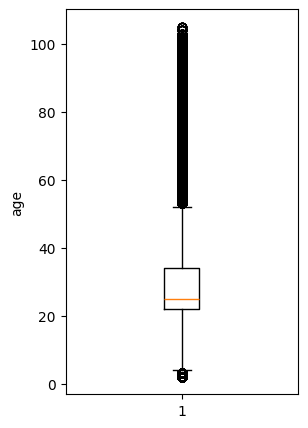

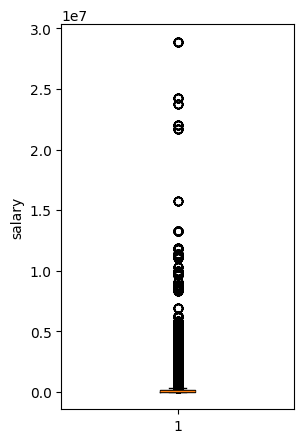

In [118]:
def show_boxplots(df):

    for col in df.loc[:, ["age","salary"]]:
        plt.figure(figsize = (3,5))
        plt.boxplot(df[col])
        plt.ylabel(col)
        plt.show()

show_boxplots(full_commercial_df)

### 1.2  Barcharts Categorical

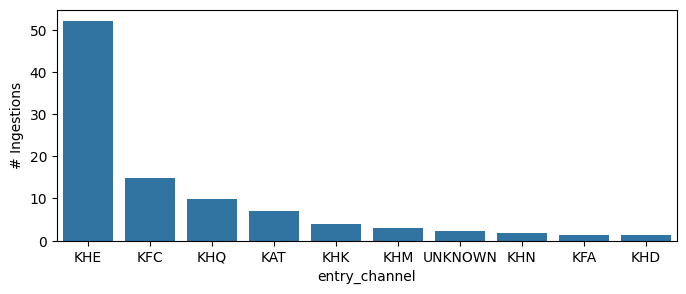

     count
KHE  52.22
KFC  14.94
KHQ   9.90
KAT   6.98
KHK   3.86


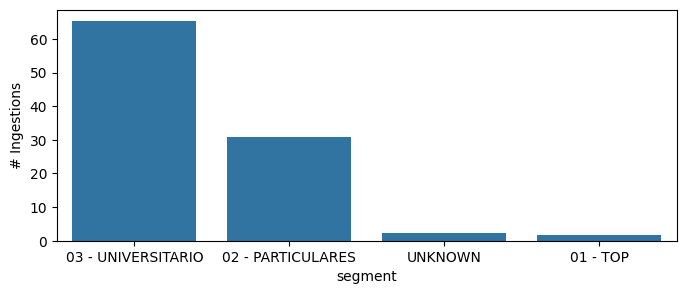

                    count
03 - UNIVERSITARIO  65.41
02 - PARTICULARES   30.70
UNKNOWN              2.25
01 - TOP             1.64


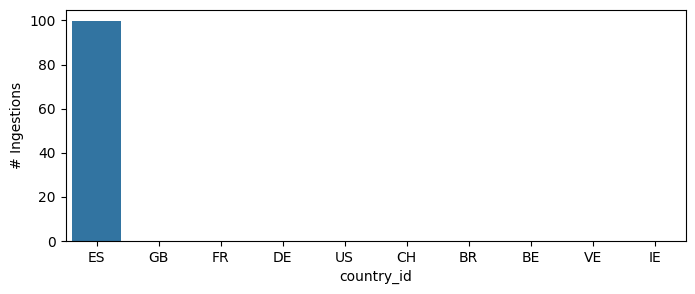

    count
ES  99.96
GB   0.01
FR   0.00
DE   0.00
US   0.00


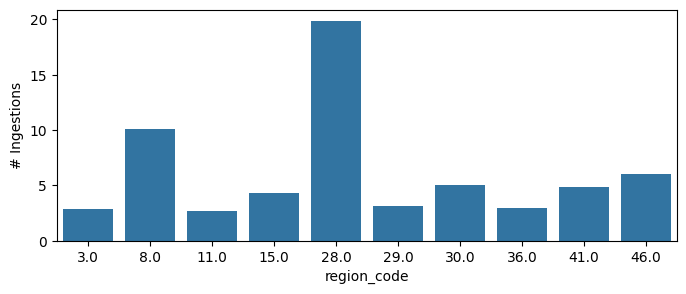

      count
28.0  19.89
8.0   10.07
46.0   6.01
30.0   4.98
41.0   4.87


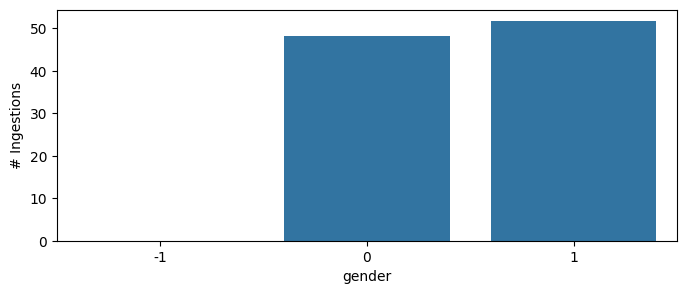

    count
 1  51.78
 0  48.22
-1   0.00


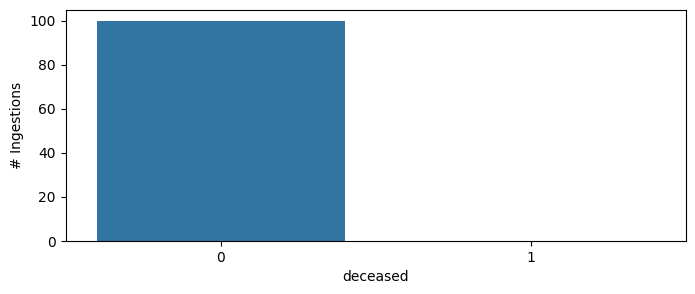

   count
0  99.98
1   0.02


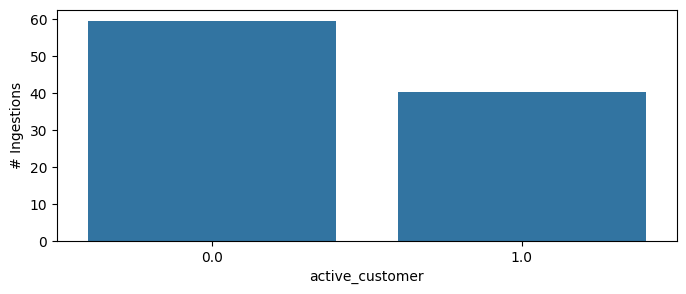

     count
0.0  59.66
1.0  40.34


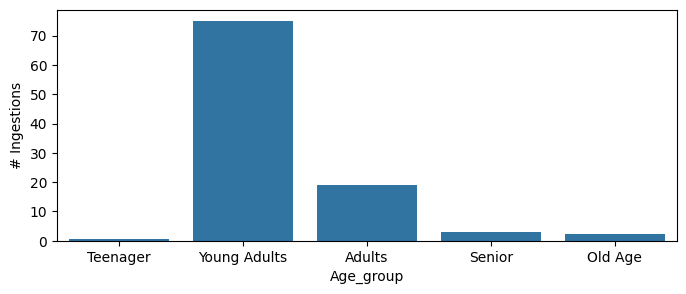

              count
Young Adults  75.10
Adults        19.00
Senior         3.08
Old Age        2.22
Teenager       0.60


In [119]:
def show_frequency_plots(df):

    cat = ["entry_channel","segment","country_id",'region_code','gender','deceased','active_customer','Age_group']
    for col in cat:
        plt.figure(figsize = (8,3))
        plt_df=pd.value_counts(df[col].values)
        plt_df=pd.DataFrame(plt_df).sort_values(by="count", ascending=False)
        plt_df["count"]=round(plt_df["count"]/plt_df["count"].sum()*100,2)
        sns.barplot(x = plt_df.head(10).index, y = 'count', data = plt_df.head(10))
        plt.ylabel("# Ingestions")
        plt.xlabel(col)
        plt.show()
        print(plt_df.head())
            
show_frequency_plots(full_commercial_df)

### 1.3 Customers

#### 1.3.1 Active customers VS Inactive customers

Overall by partition.

In [120]:
active_customers_df=pd.DataFrame(full_commercial_df[["pk_partition","active_customer"]].groupby(["pk_partition"]).sum())
active_customers_df=active_customers_df.rename(columns={"active_customer":"num_active_customers"})

In [121]:
total_customers_df=pd.DataFrame(full_commercial_df[["pk_partition","active_customer"]].groupby(["pk_partition"]).count())
total_customers_df=total_customers_df.rename(columns={"active_customer":"num_customers"})

In [122]:
active_customers_df["perc_active_customers"]=round(active_customers_df["num_active_customers"]/total_customers_df["num_customers"]*100,2)

In [123]:
activity_df = total_customers_df.merge(active_customers_df, left_index=True, right_index=True)
activity_df["num_inactive_customers"] = activity_df["num_customers"]-activity_df["num_active_customers"]
activity_df["perc_inactive_customers"]=round(activity_df["num_inactive_customers"]/activity_df["num_customers"]*100,2)
activity_df[["perc_active_customers","perc_inactive_customers"]].T

pk_partition             2018-01-28  2018-02-28  2018-03-28  2018-04-28  \
perc_active_customers         45.18        45.8        46.4        47.0   
perc_inactive_customers       54.82        54.2        53.6        53.0   

pk_partition             2018-05-28  2018-06-28  2018-07-28  2018-08-28  \
perc_active_customers         47.64       48.22        38.1       38.63   
perc_inactive_customers       52.36       51.78        61.9       61.37   

pk_partition             2018-09-28  2018-10-28  2018-11-28  2018-12-28  \
perc_active_customers         38.58       37.77       37.54       37.69   
perc_inactive_customers       61.42       62.23       62.46       62.31   

pk_partition             2019-01-28  2019-02-28  2019-03-28  2019-04-28  \
perc_active_customers         38.08       38.23       38.56       38.67   
perc_inactive_customers       61.92       61.77       61.44       61.33   

pk_partition             2019-05-28  
perc_active_customers         38.73  
perc_inactive_customers       61.27

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2018-01-28'),
  Text(1, 0, '2018-02-28'),
  Text(2, 0, '2018-03-28'),
  Text(3, 0, '2018-04-28'),
  Text(4, 0, '2018-05-28'),
  Text(5, 0, '2018-06-28'),
  Text(6, 0, '2018-07-28'),
  Text(7, 0, '2018-08-28'),
  Text(8, 0, '2018-09-28'),
  Text(9, 0, '2018-10-28'),
  Text(10, 0, '2018-11-28'),
  Text(11, 0, '2018-12-28'),
  Text(12, 0, '2019-01-28'),
  Text(13, 0, '2019-02-28'),
  Text(14, 0, '2019-03-28'),
  Text(15, 0, '2019-04-28'),
  Text(16, 0, '2019-05-28')])

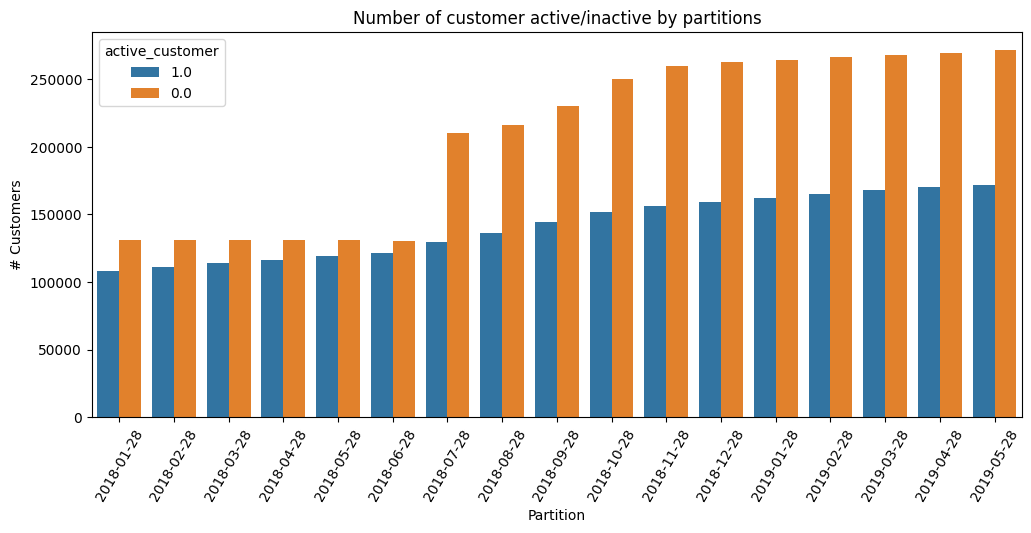

In [124]:
full_commercial_df_=full_commercial_df.copy()
full_commercial_df_["active_customer"]=full_commercial_df_["active_customer"].astype(str)  
plt.figure(figsize = (12,5))
sns.countplot(data=full_commercial_df_, x="pk_partition", hue="active_customer")
plt.title("Number of customer active/inactive by partitions")
plt.ylabel("# Customers")
plt.xlabel("Partition")
plt.xticks(rotation=60)

Active/Inactive customer by segment

Text(0.5, 0, 'Partition')

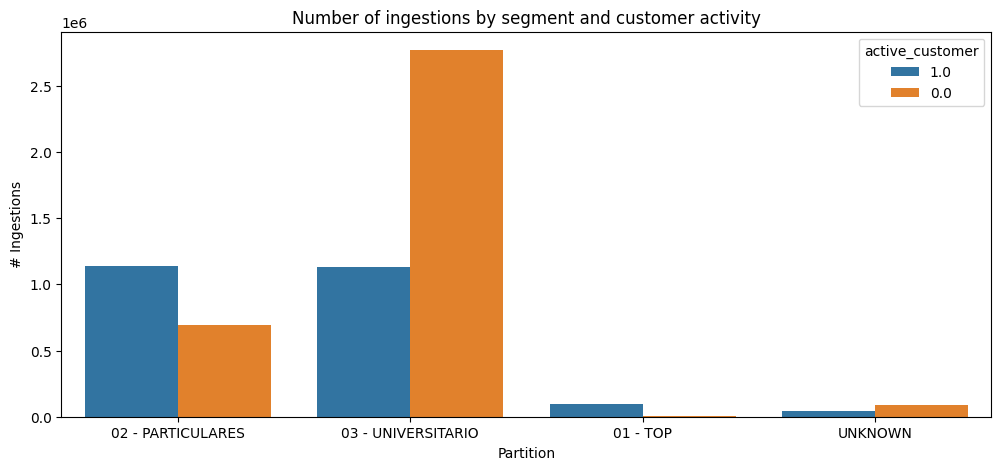

In [125]:
plt.figure(figsize = (12,5))
sns.countplot(data=full_commercial_df_, x="segment", hue = "active_customer")
plt.title("Number of ingestions by segment and customer activity")
plt.ylabel("# Ingestions")
plt.xlabel("Partition")

Active/Inactive customer by segment over time.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2018-01-28'),
  Text(1, 0, '2018-02-28'),
  Text(2, 0, '2018-03-28'),
  Text(3, 0, '2018-04-28'),
  Text(4, 0, '2018-05-28'),
  Text(5, 0, '2018-06-28'),
  Text(6, 0, '2018-07-28'),
  Text(7, 0, '2018-08-28'),
  Text(8, 0, '2018-09-28'),
  Text(9, 0, '2018-10-28'),
  Text(10, 0, '2018-11-28'),
  Text(11, 0, '2018-12-28'),
  Text(12, 0, '2019-01-28'),
  Text(13, 0, '2019-02-28'),
  Text(14, 0, '2019-03-28'),
  Text(15, 0, '2019-04-28'),
  Text(16, 0, '2019-05-28')])

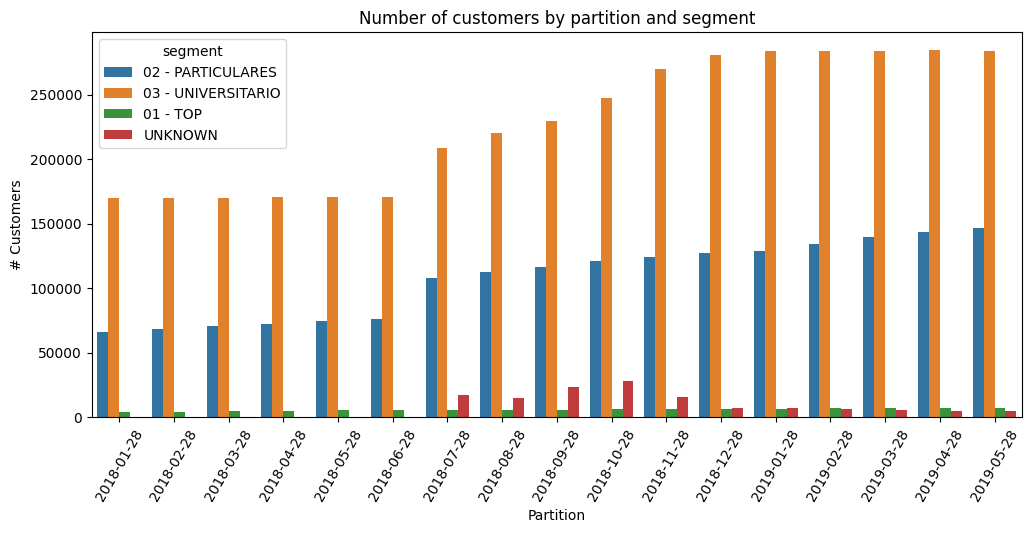

In [126]:
plt.figure(figsize = (12,5))
ax = sns.countplot(data=full_commercial_df_, x="pk_partition", hue="segment")
plt.title("Number of customers by partition and segment")
plt.ylabel("# Customers")
plt.xlabel("Partition")
plt.xticks(rotation=60)

#### 1.3.2 Entry dates over time by segment

Let's take a look at the entry dates over time.

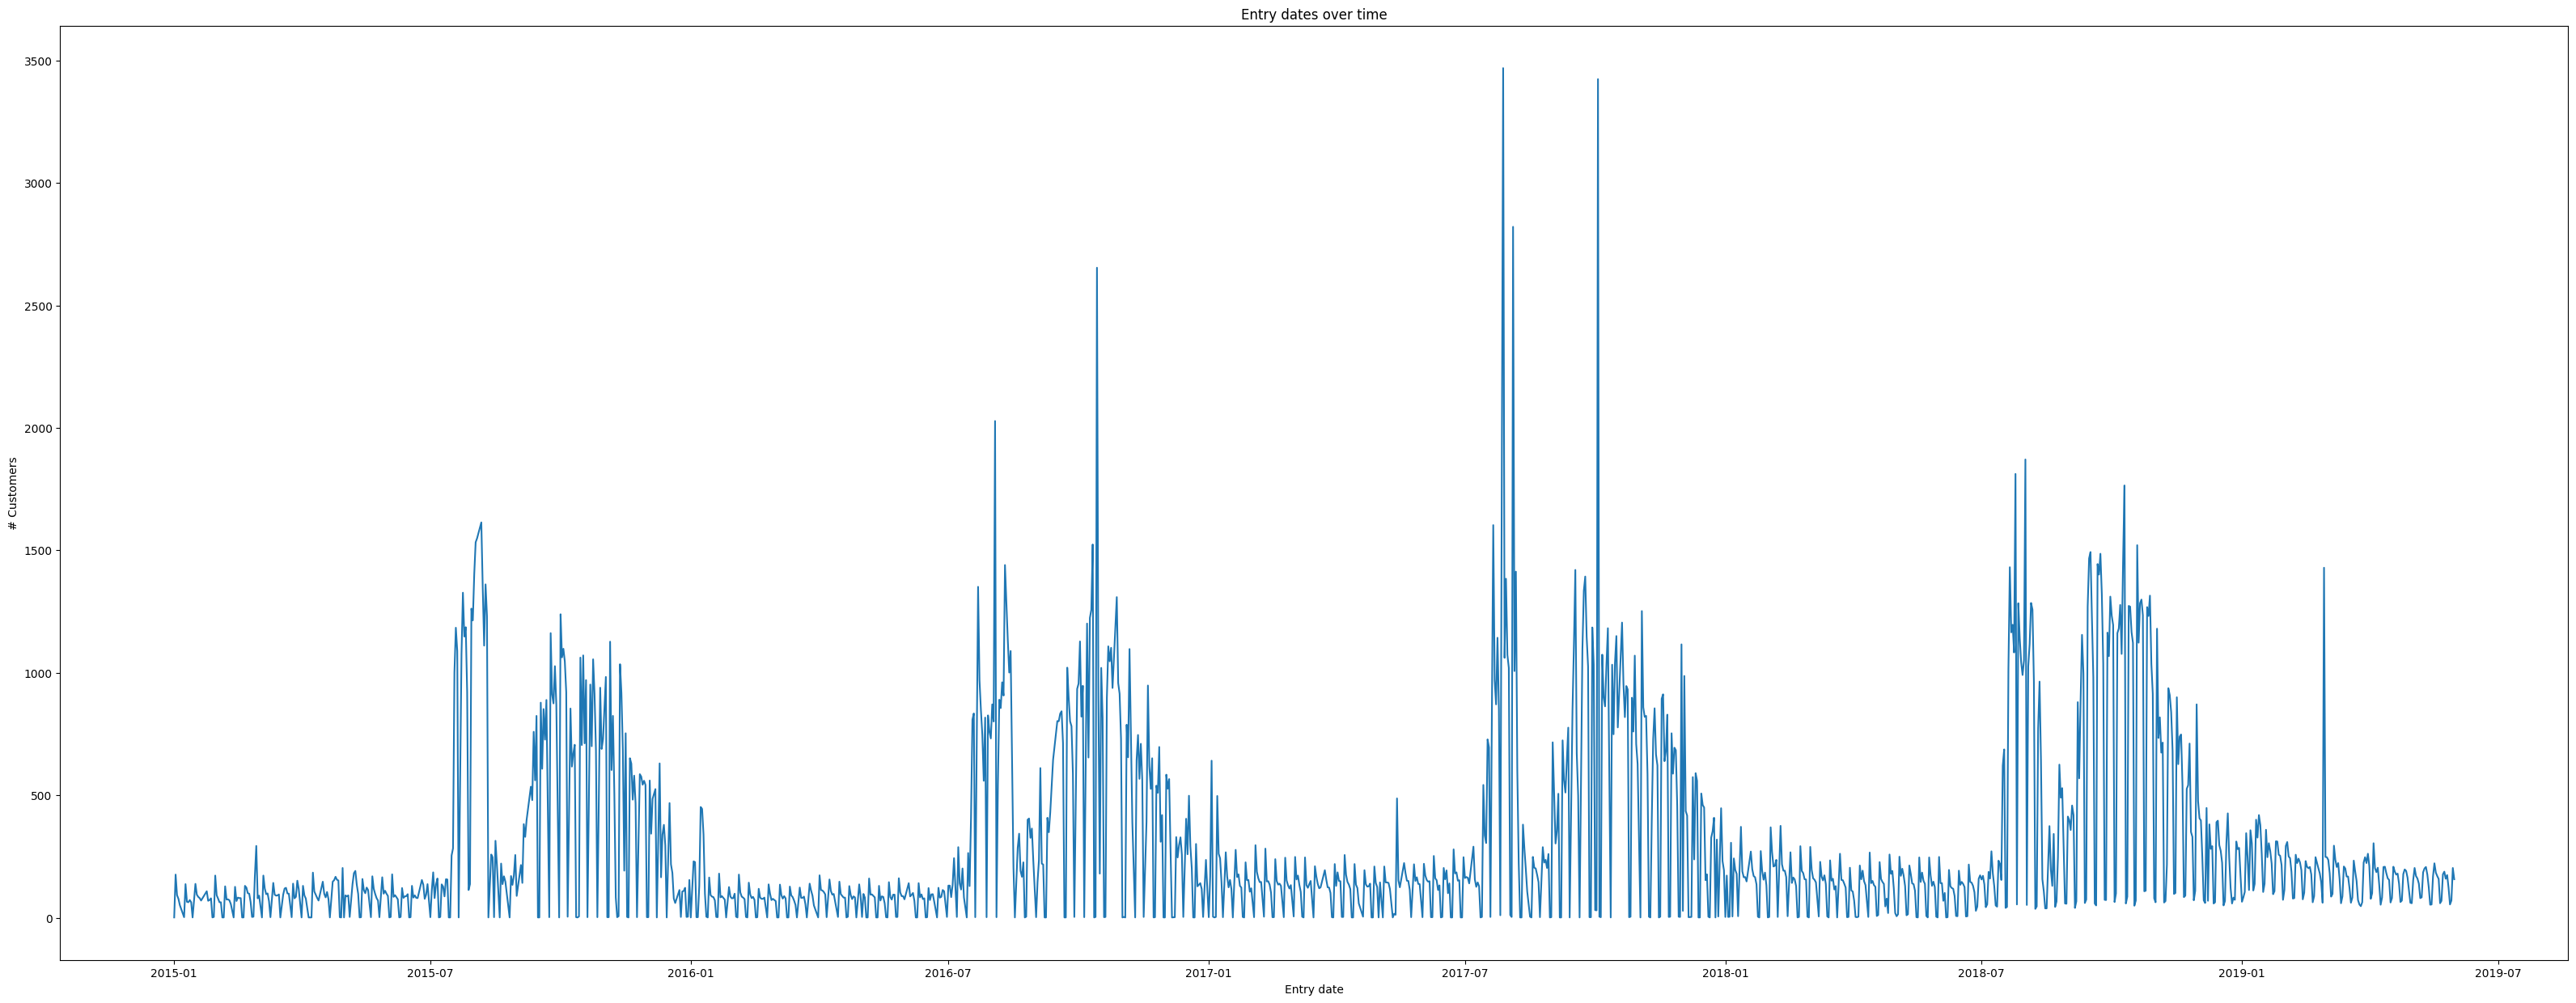

In [127]:
full_commercial_df_=full_commercial_df.copy()
full_commercial_df_ = full_commercial_df_[["entry_date","pk_cid","segment","gender","Age_group"]].groupby(["pk_cid"]).max()
full_commercial_df_by_entry_date = full_commercial_df_[["entry_date"]].groupby(["entry_date"]).value_counts().sort_index()
full_commercial_df_by_entry_date = pd.DataFrame(full_commercial_df_by_entry_date)
plt.figure(figsize = (40,15))
ax=sns.lineplot(x=full_commercial_df_by_entry_date.index,y="count",data=full_commercial_df_by_entry_date)
ax.set_title("Entry dates over time")
plt.ylabel("# Customers")
plt.xlabel("Entry date")
plt.show()


From the plot above, it's clear we have a ciclical trend, ie, around August and next few months the number of entries group significantely and reduces from December to next August (more and less). 
By the plots below, which split according to the segment, we can easily conclude that such trend is more related with universitarios' segment.

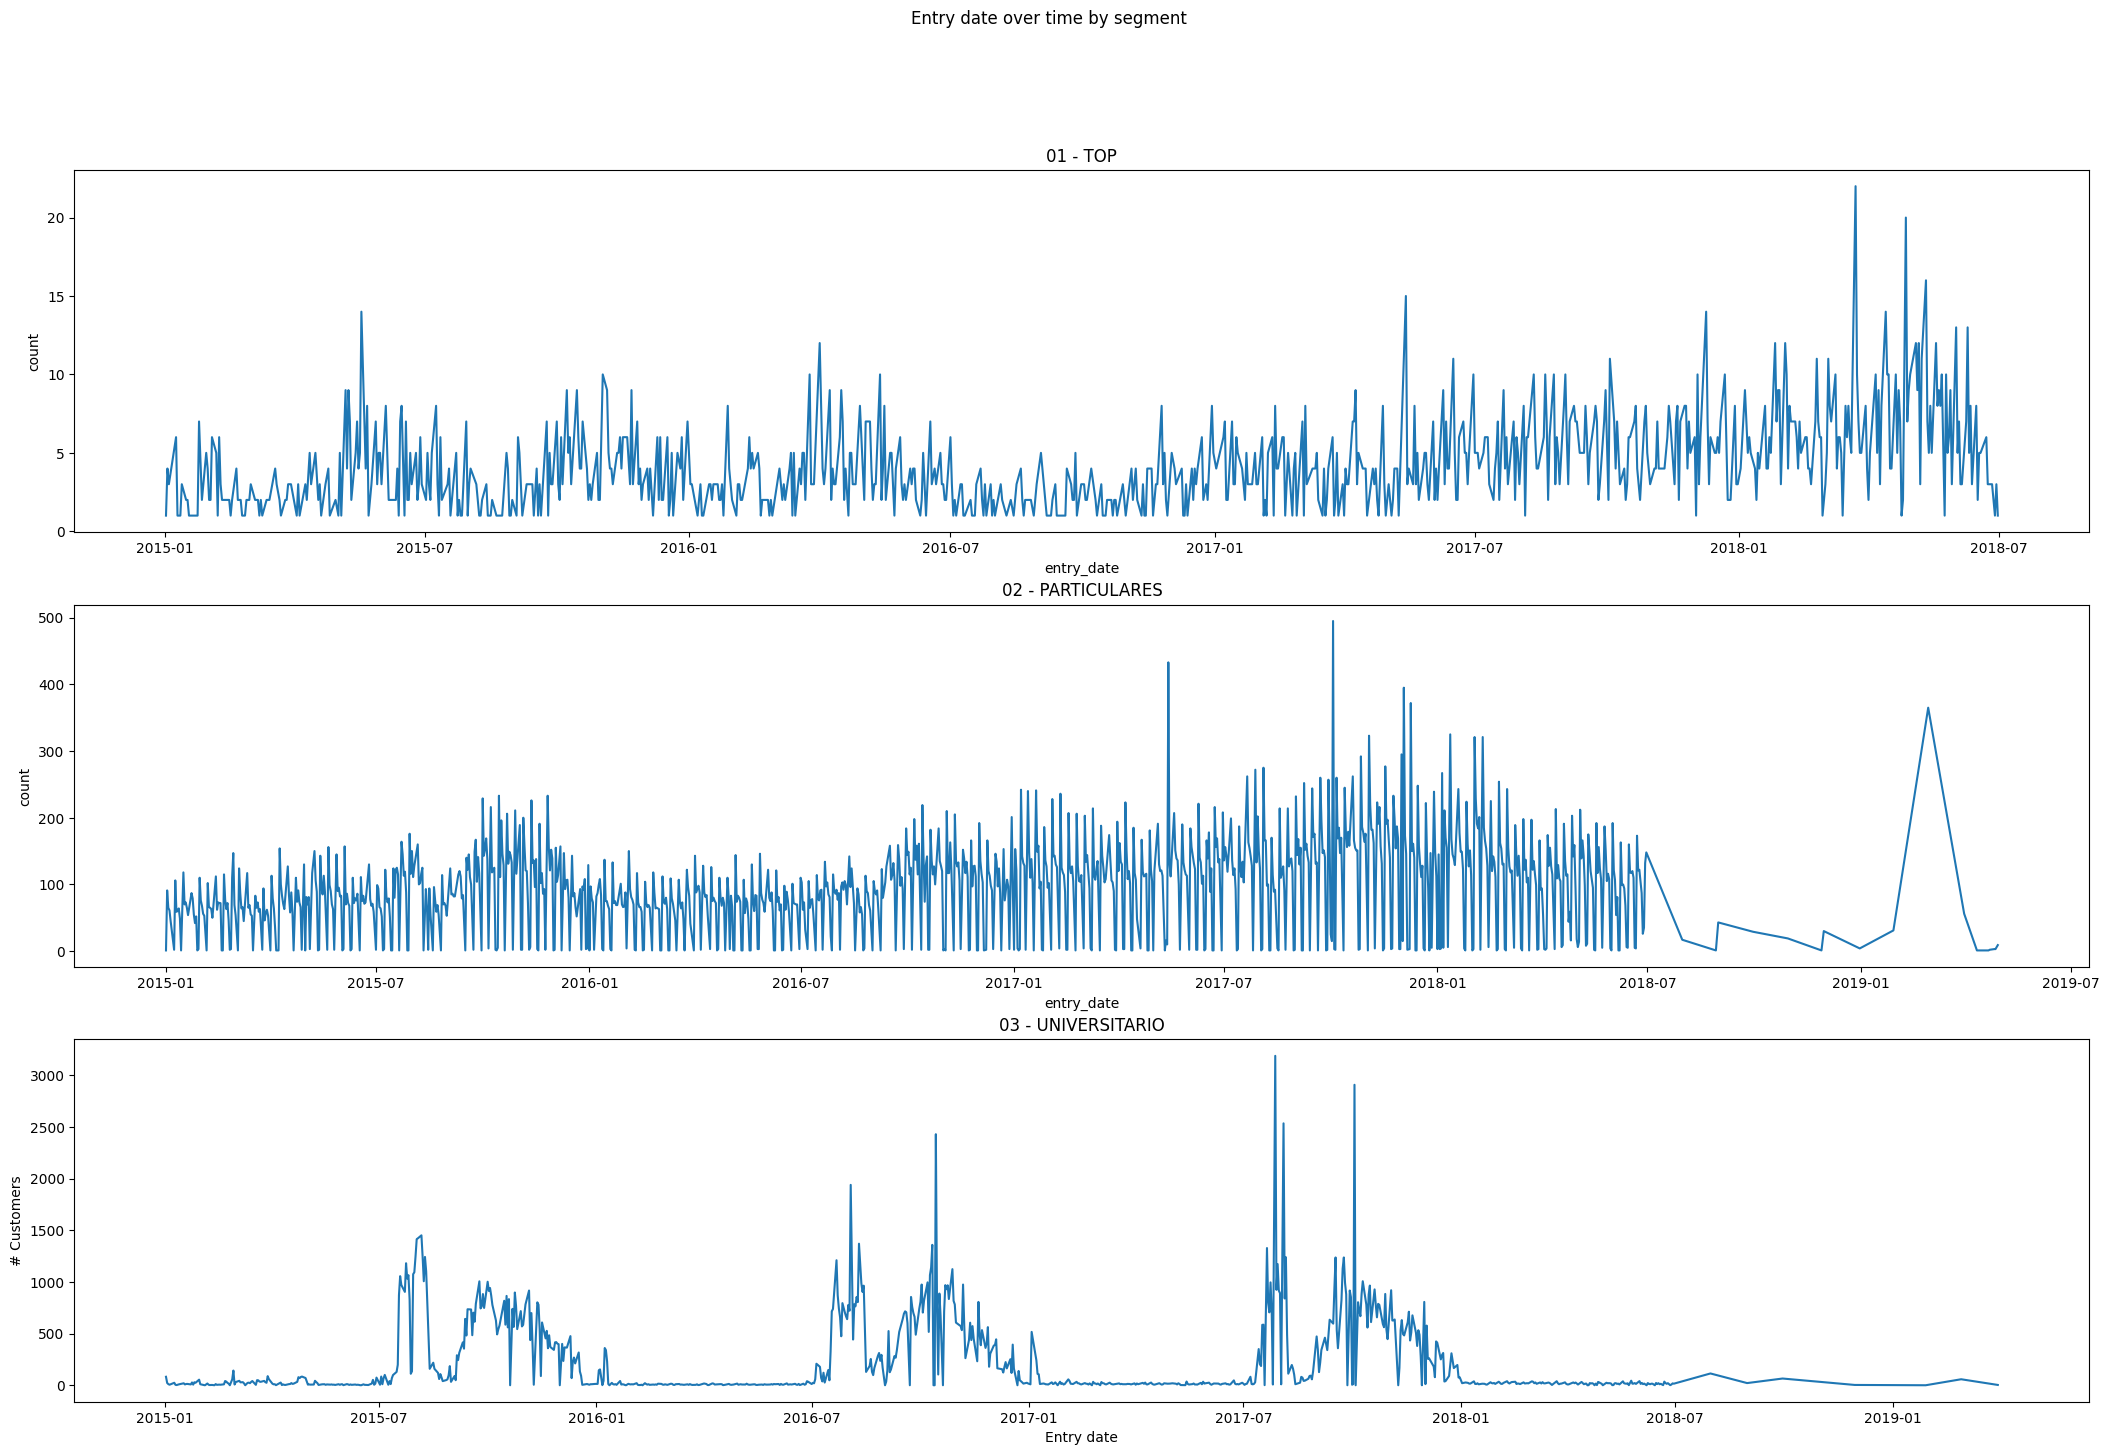

In [128]:
fig, axes = plt.subplots(3, 1)
fig.suptitle('Entry date over time by segment')
fig.set_size_inches(26,16)

segments = ["01 - TOP","02 - PARTICULARES","03 - UNIVERSITARIO"]
for idx, s in enumerate(segments):
    full_commercial_df_by_entry_date = full_commercial_df_[full_commercial_df_["segment"]==s][["entry_date"]].groupby(["entry_date"]).value_counts().sort_index()
    full_commercial_df_by_entry_date = pd.DataFrame(full_commercial_df_by_entry_date)
    ax=sns.lineplot(ax=axes[idx],x=full_commercial_df_by_entry_date.index,y="count",data=full_commercial_df_by_entry_date)
    plt.ylabel("# Customers")
    plt.xlabel("Entry date")
    ax.set_title(s)

#### 1.3.3 Entry dates over time by age group

Performing the same analysis, but by age group, one can see that the young adults have the same trend, which can indicate that the segment Universitarios and Age group Young adults are strictly related.

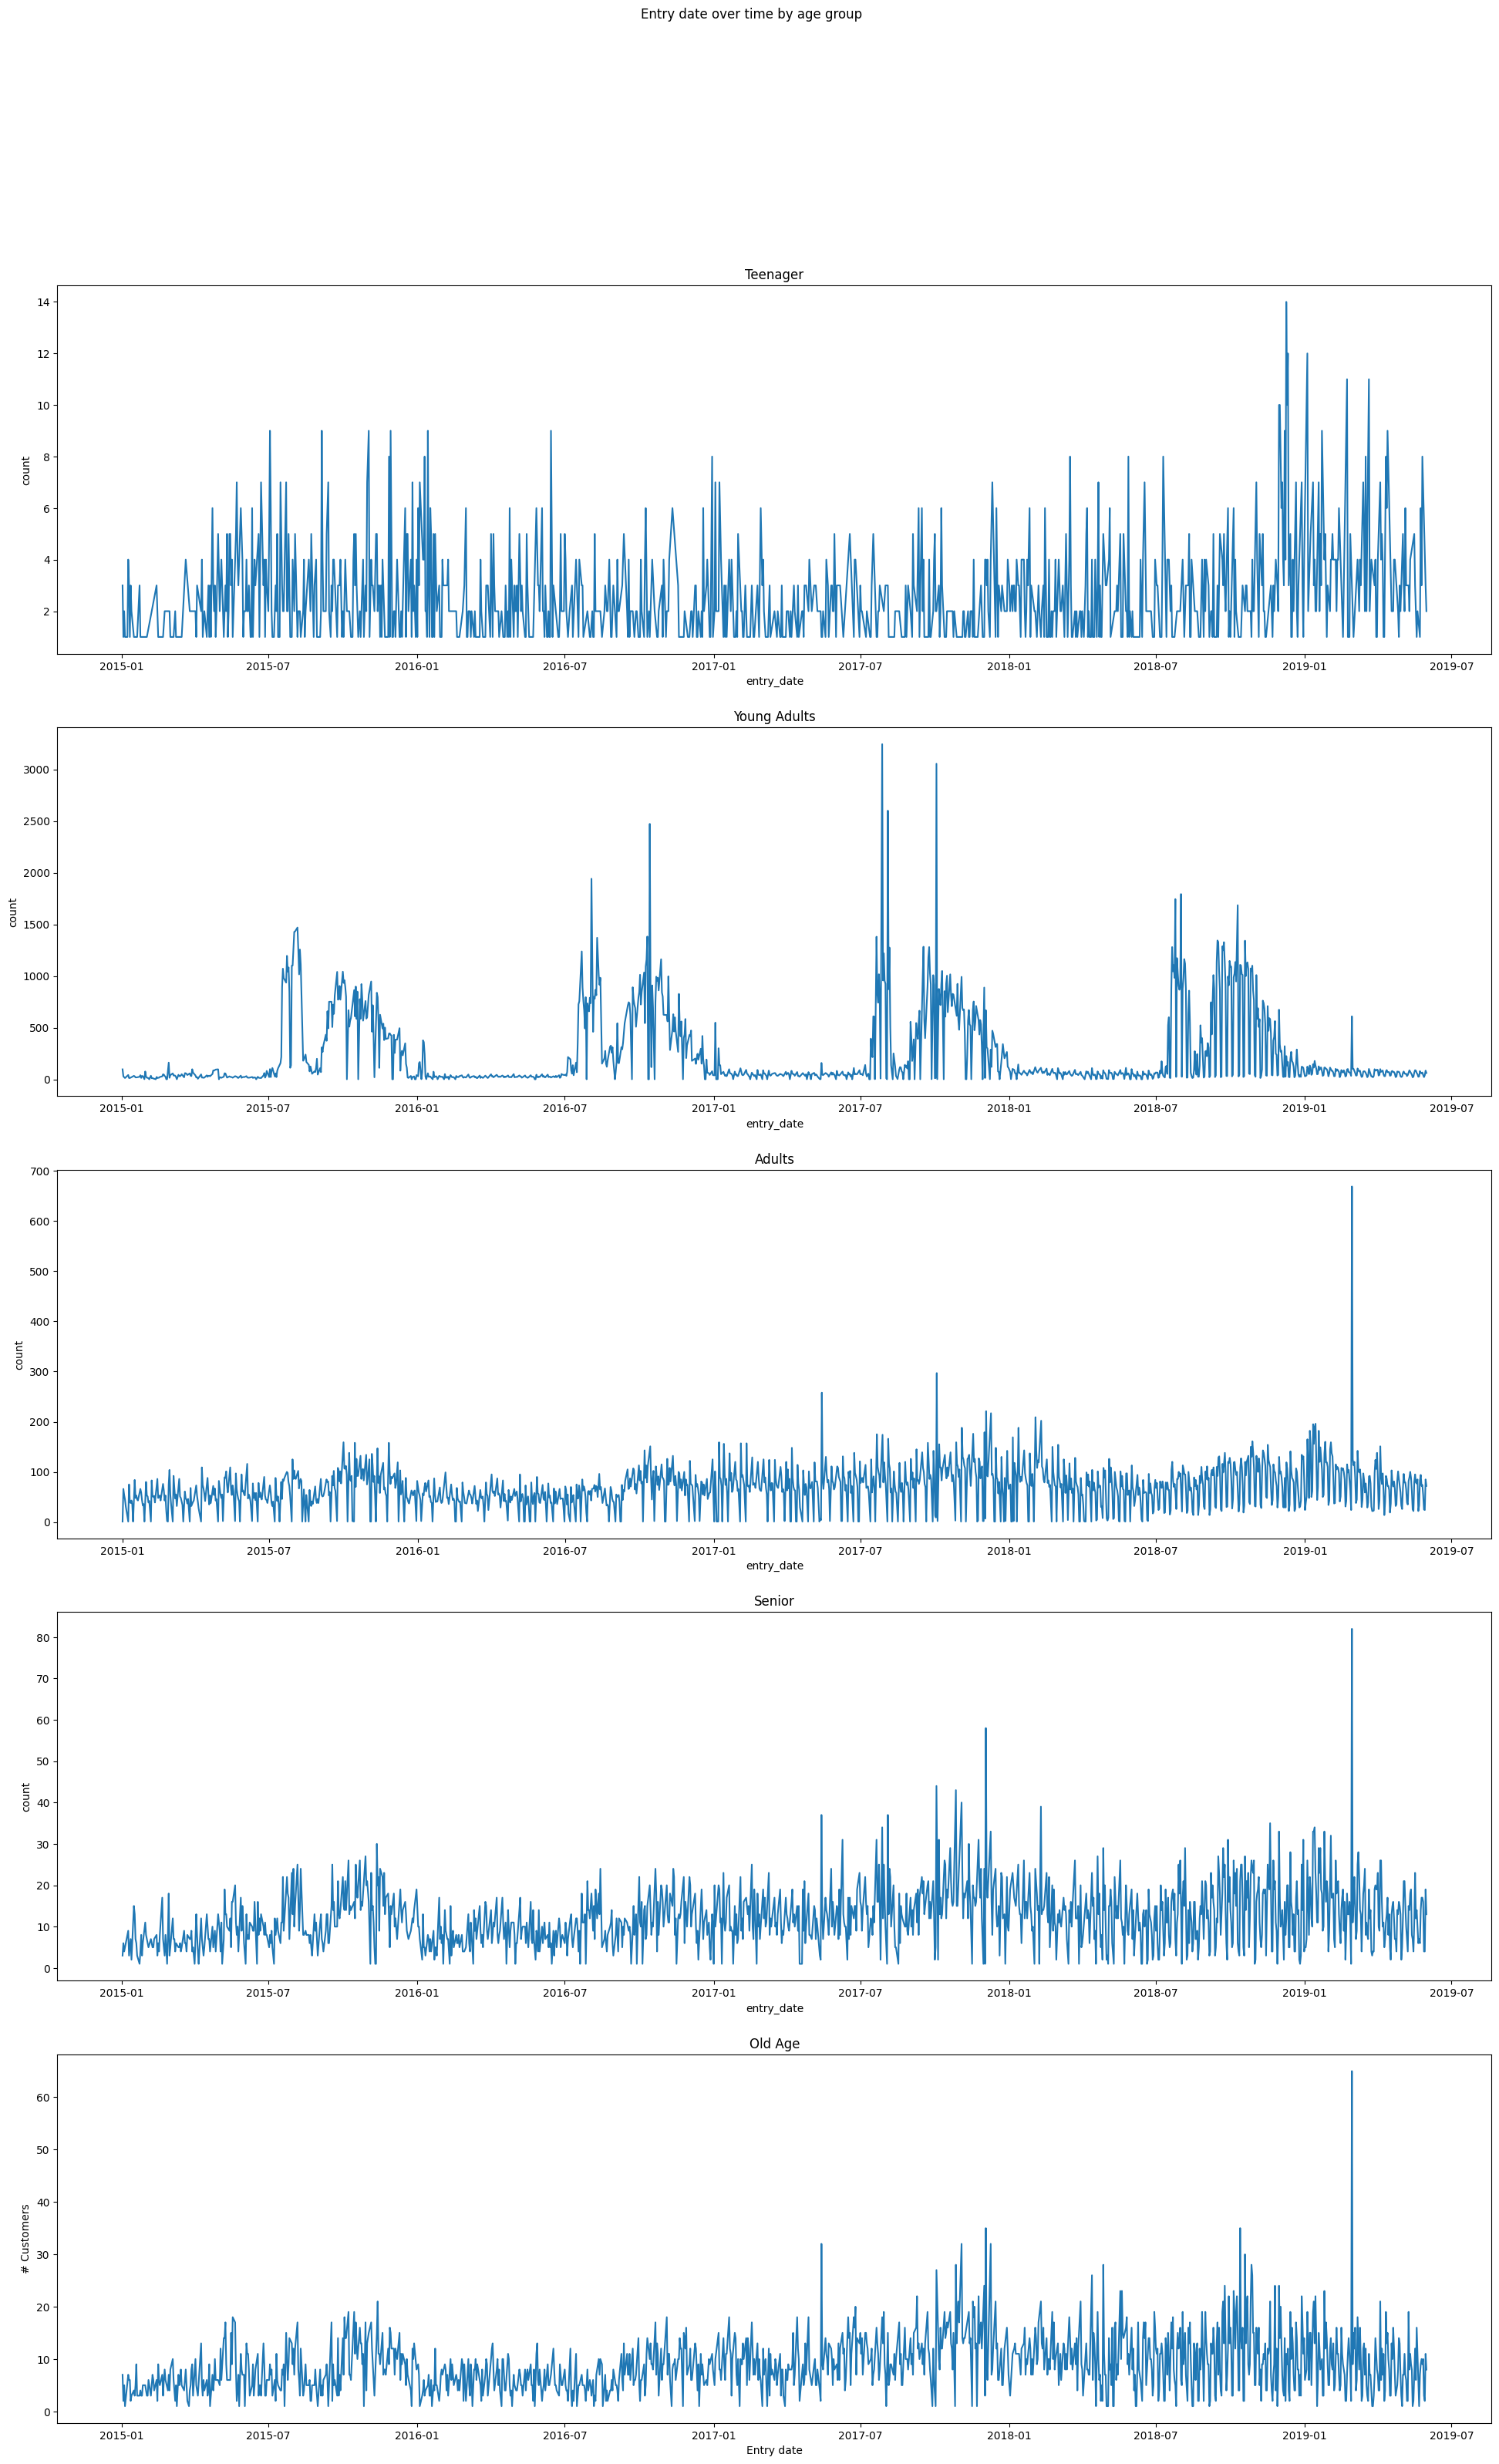

In [129]:
fig, axes = plt.subplots(5, 1)
fig.suptitle('Entry date over time by age group')
fig.set_size_inches(24,36)

group_ages = Age_labels

for idx, ag in enumerate(group_ages):
    full_commercial_df_by_entry_date = full_commercial_df_[full_commercial_df_["Age_group"]==ag][["entry_date"]].groupby(["entry_date"]).value_counts().sort_index()
    full_commercial_df_by_entry_date = pd.DataFrame(full_commercial_df_by_entry_date)
    ax=sns.lineplot(ax=axes[idx],x=full_commercial_df_by_entry_date.index,y="count",data=full_commercial_df_by_entry_date)
    plt.ylabel("# Customers")
    plt.xlabel("Entry date")
    ax.set_title(ag)

#### 1.3.4 Old customers VS New customers

Now, let's that a look in the number of ingestion by partition considering old (entry day before 01/01/2018) and new customers (entry day after 01/01/2018 included).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2018-01-28'),
  Text(1, 0, '2018-02-28'),
  Text(2, 0, '2018-03-28'),
  Text(3, 0, '2018-04-28'),
  Text(4, 0, '2018-05-28'),
  Text(5, 0, '2018-06-28'),
  Text(6, 0, '2018-07-28'),
  Text(7, 0, '2018-08-28'),
  Text(8, 0, '2018-09-28'),
  Text(9, 0, '2018-10-28'),
  Text(10, 0, '2018-11-28'),
  Text(11, 0, '2018-12-28'),
  Text(12, 0, '2019-01-28'),
  Text(13, 0, '2019-02-28'),
  Text(14, 0, '2019-03-28'),
  Text(15, 0, '2019-04-28'),
  Text(16, 0, '2019-05-28')])

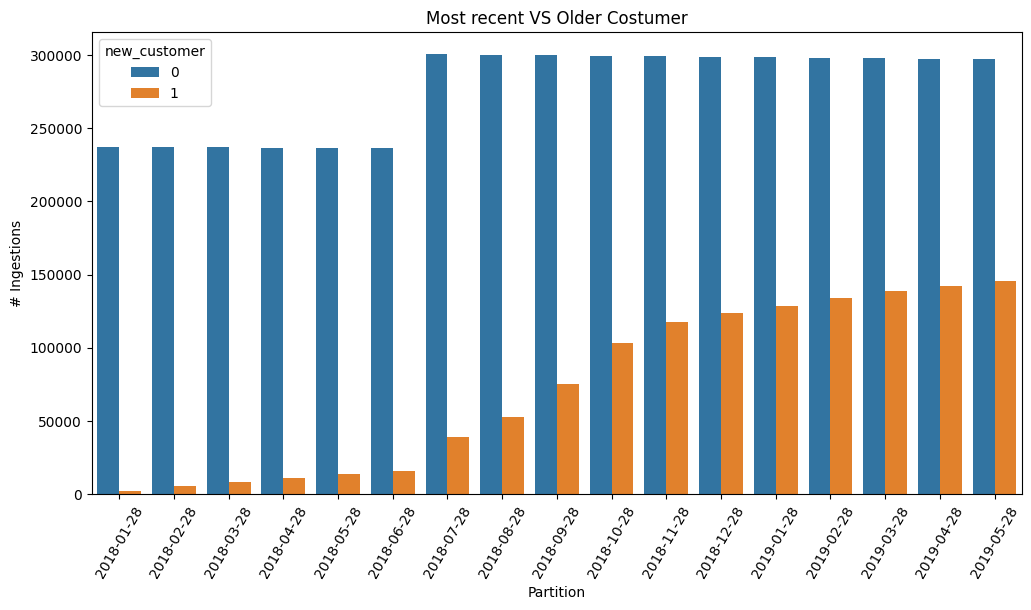

In [130]:
fig = plt.figure(figsize = (12,6))
plt.title("Most recent VS Older Costumer")

conditions_3 = [
    (full_commercial_df['entry_date'] < pd.to_datetime("2018-01-01",format='%Y-%m-%d')),
    (full_commercial_df['entry_date'] >= pd.to_datetime("2018-01-01",format='%Y-%m-%d'))
    ]

values_3 = [0,1]

full_commercial_df['new_customer'] = np.select(conditions_3, values_3)
ax = sns.countplot(data=full_commercial_df, x="pk_partition", hue="new_customer")
plt.ylabel("# Ingestions")
plt.xlabel("Partition")
plt.xticks(rotation=60)


### 1.4 Products over time

Now let's take a look on the the products ingestion over the partition dates.

#### 1.4.1 Ingestion of products by pk_partition

In [131]:
products = ['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

df_grouped_product = full_commercial_df.groupby('pk_partition')[products].sum()
df_grouped_product

short_term_deposit  loans  mortgage  funds  securities  \
pk_partition                                                           
2018-01-28                   883     19        15    786         932   
2018-02-28                  1343     19        15    872         965   
2018-03-28                  1664     23        17    969         965   
2018-04-28                  1740     24        17   1084         983   
2018-05-28                  1455     27        18   1145        1012   
2018-06-28                  1244     27        19   1159        1019   
2018-07-28                  1282     28        20   1172        1053   
2018-08-28                  1335     29        20   1219        1133   
2018-09-28                  1386     31        20   1237        1201   
2018-10-28                  1374     33        19   1249        1348   
2018-11-28                  1018     32        19   1282        1360   
2018-12-28                   528     30        19   1322        1420   
2019-01-28                   125     28        20   1330        1655   
2019-02-28                    11     29        20   1316        1747   
2019-03-28                     2     29        20   1322        1769   
2019-04-28                     2     30        23   1320        1782   
2019-05-28                     2     30        23   1315        1789   

              long_term_deposit  em_account_pp  credit_card  payroll  \
pk_partition                                                           
2018-01-28                 4884              0         3325   8145.0   
2018-02-28                 4956              0         3282   8889.0   
2018-03-28                 4965              0         3511   9735.0   
2018-04-28                 5107              0         3725   9905.0   
2018-05-28                 5356              0         3797   9994.0   
2018-06-28                 5588              0         4002  10946.0   
2018-07-28                 5796              0         4137  11888.0   
2018-08-28                 5923              0         4206  11383.0   
2018-09-28                 6158              0         4289  11850.0   
2018-10-28                 6380              0         4385  12454.0   
2018-11-28                 6447              0         4512  13032.0   
2018-12-28                 6749              0         4536  14452.0   
2019-01-28                 6659              0         4493  12058.0   
2019-02-28                 6658              0         4542  14378.0   
2019-03-28                 6537              0         4576  15114.0   
2019-04-28                 6368              0         4747  15231.0   
2019-05-28                 6129              0         4801  16333.0   

              pension_plan  payroll_account  emc_account  debit_card  \
pk_partition                                                           
2018-01-28          8835.0            13478        15320       24696   
2018-02-28          9496.0            14246        15827       25448   
2018-03-28          9882.0            14989        16428       27046   
2018-04-28         10560.0            15825        16947       27764   
2018-05-28         10148.0            16697        17569       27911   
2018-06-28         11635.0            15540        17950       28828   
2018-07-28         12779.0            16916        18185       29578   
2018-08-28         12126.0            18118        18333       29205   
2018-09-28         12624.0            18862        18618       31684   
2018-10-28         13223.0            19945        18844       34372   
2018-11-28         13818.0            21437        19494       35466   
2018-12-28         15324.0            21359        20043       37430   
2019-01-28         12538.0            22324        20921       37350   
2019-02-28         15265.0            23264        21796       39399   
2019-03-28         15976.0            24390        22480       41390   
2019-04-28         16220.0            25501        2

From the table above, we have an idea what are the products that have more ingestion in the database, and, in general the number of ingestions trend to increase, meaning that the balance of new ingestions and the clients that "left" he products is positive (more clients that buy than left the product). However some products have a different trend, as short_term_deposit which decreased significantly after September/October 2018.

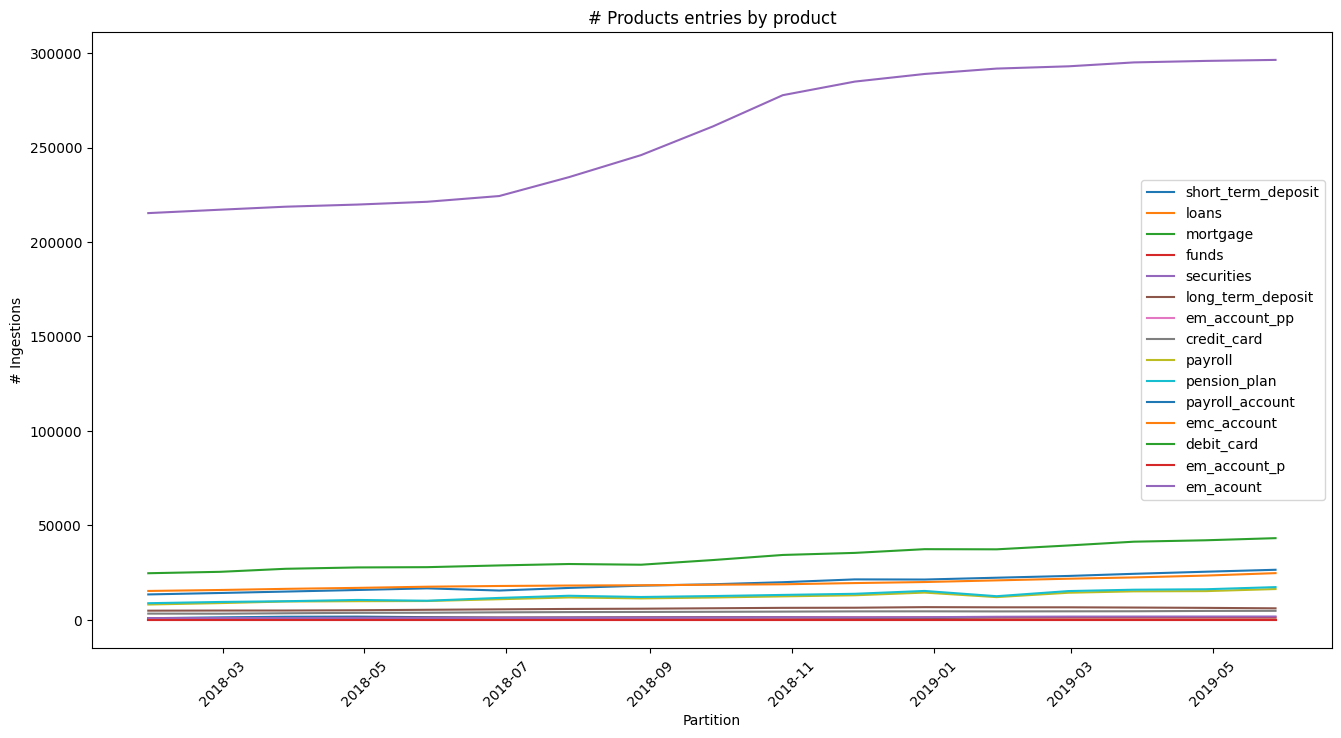

In [132]:
plt.figure(figsize = (16,8))
for col in products:
    plt.plot(df_grouped_product.index, df_grouped_product[col], label=col)
plt.xlabel('Partition')
plt.ylabel('# Ingestions')
plt.xticks(rotation=45)
plt.title("# Products entries by product")
plt.legend()
plt.show()

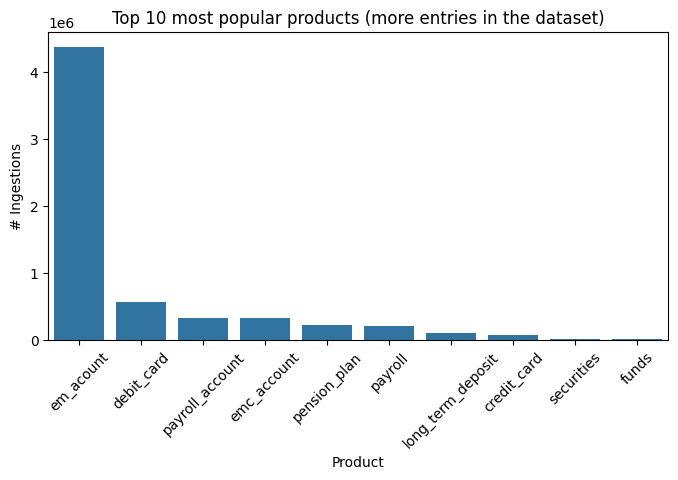

In [133]:
df_products_total=pd.DataFrame(df_grouped_product.sum(axis=0).sort_values(ascending=False),columns=["count"])
df_products_total_perc=pd.DataFrame(round(df_grouped_product.sum(axis=0).sort_values(ascending=False)/df_products_total.sum().values[0]*100,2),columns=["Percentage"])
df_products_total_top10=df_products_total.head(10)
plt.figure(figsize = (8,4))
splot = sns.barplot(x = df_products_total_top10.head(10).index, y = 'count', data = df_products_total_top10.head(10)).set(title="Top 10 most popular products (more entries in the dataset)")
plt.xlabel('Product')
plt.ylabel('# Ingestions')
plt.xticks(rotation=45)
plt.show()


Below we have the percentage of entries in the dataframe for each product.

In [134]:
df_products_total_perc

Percentage
em_acount                70.05
debit_card                9.00
payroll_account           5.27
emc_account               5.23
pension_plan              3.48
payroll                   3.29
long_term_deposit         1.61
credit_card               1.13
securities                0.35
funds                     0.32
short_term_deposit        0.25
loans                     0.01
mortgage                  0.01
em_account_p              0.00
em_account_pp             0.00

#### 1.4.2  Products' ingestion over time by segment

Let's see if there is any trend of ingestion by segment.

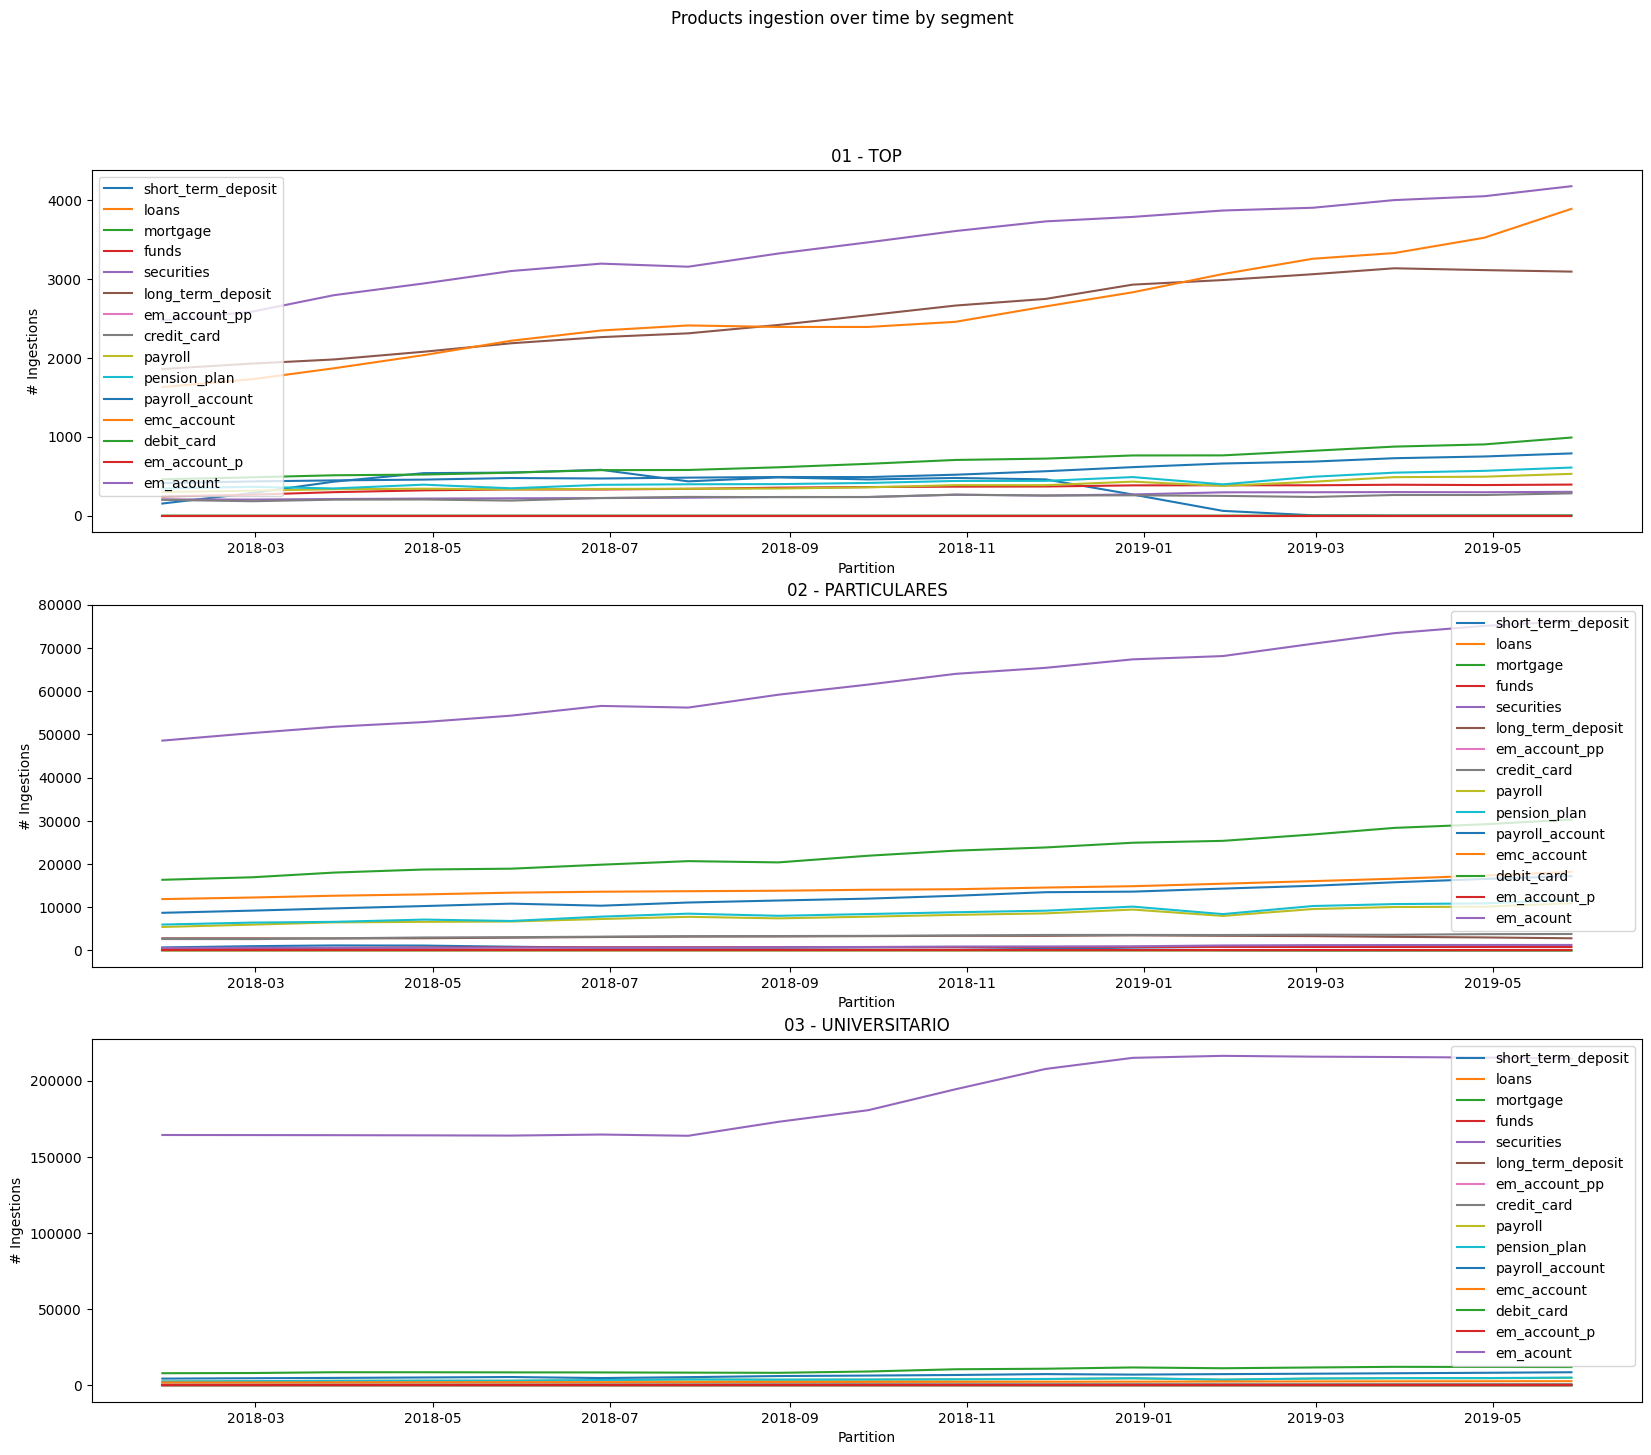

In [135]:
fig, axes = plt.subplots(3, 1)
fig.suptitle('Products ingestion over time by segment')
fig.set_size_inches(20,16)

for idx, s in enumerate(segments):
    df_grouped_product_loop = full_commercial_df[full_commercial_df["segment"]==s].groupby('pk_partition')[products].sum()
    for col in products:
        ax=sns.lineplot(ax=axes[idx],x=df_grouped_product_loop.index,y=col,data=df_grouped_product_loop, label=col)
    ax.set_title(s)
    ax.set_ylabel("# Ingestions")
    ax.set_xlabel("Partition")
   

For all segment the trend of em_count is similar, ie, it increases over time. but for top segment other 2 products have several ingestions: long_term_deposit and emc_account.

#### 1.4.3 Products' ingestion over time by age group

Let's see if there is any trend of ingestion by age group.

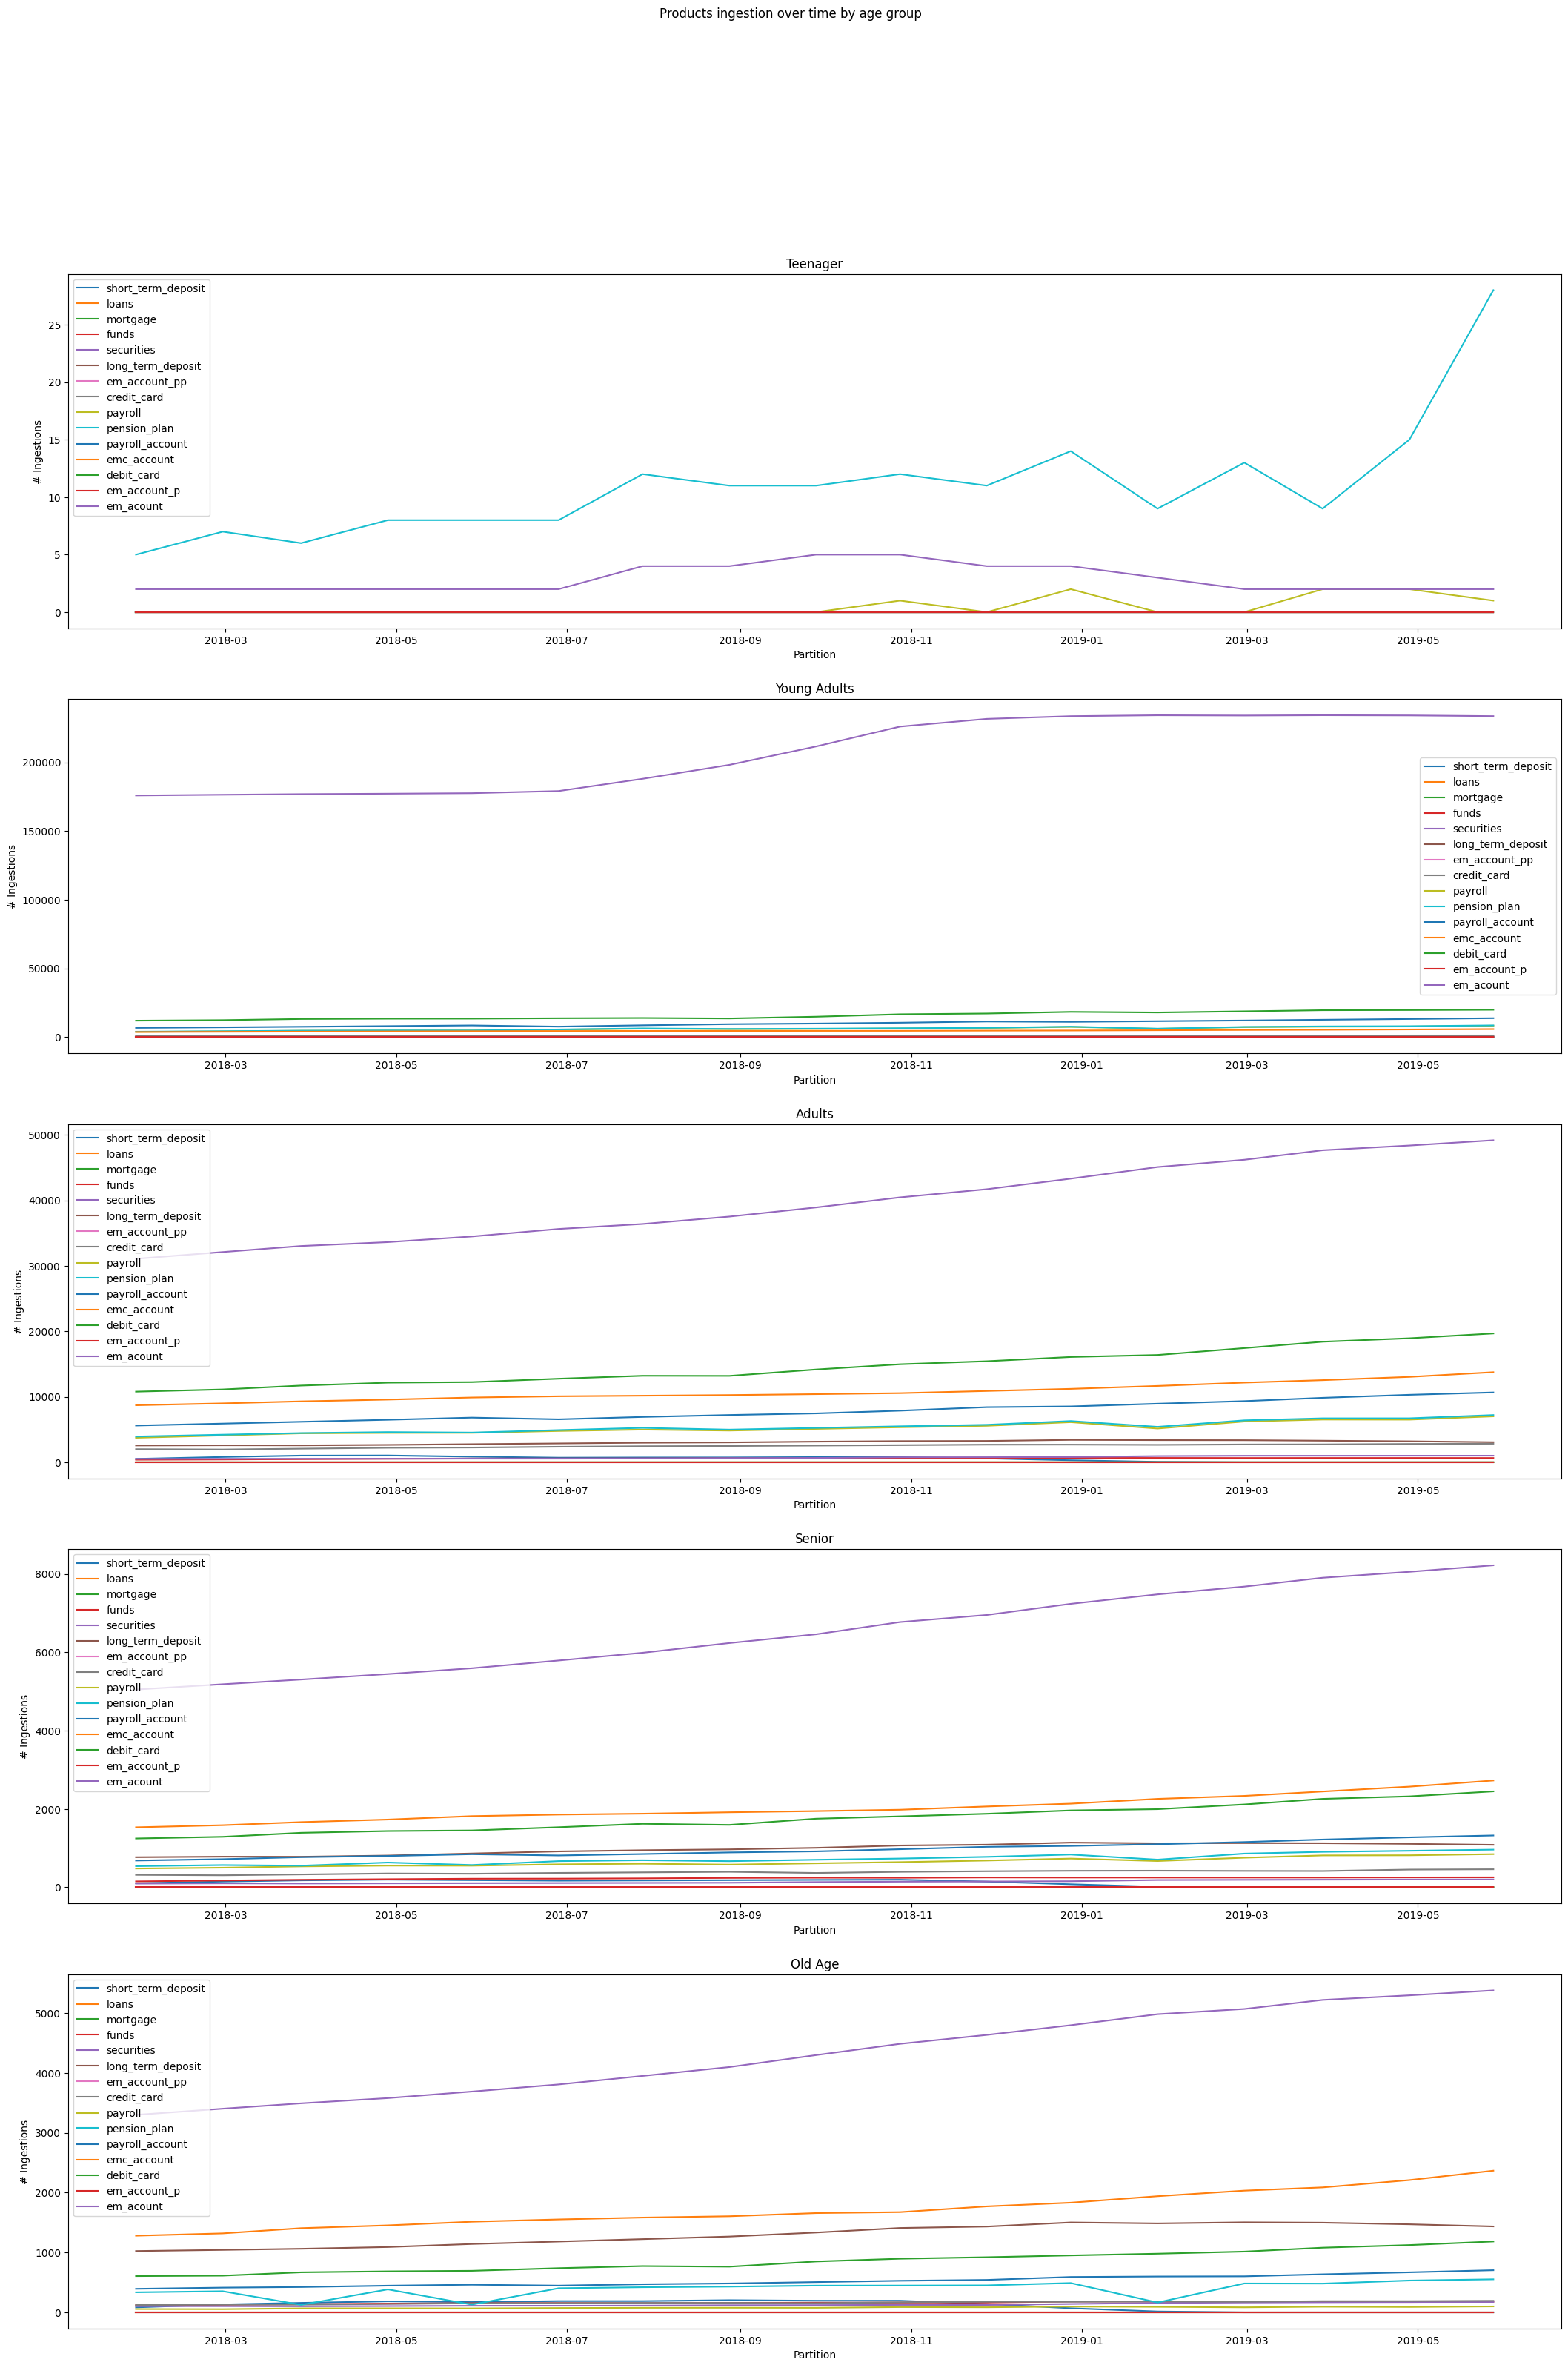

In [136]:
fig, axes = plt.subplots(5, 1)
fig.suptitle('Products ingestion over time by age group')
fig.set_size_inches(26,36)

for idx, ag in enumerate(group_ages):
    df_grouped_product_loop = full_commercial_df[full_commercial_df["Age_group"]==ag].groupby('pk_partition')[products].sum()
    for col in products:
        ax=sns.lineplot(ax=axes[idx],x=df_grouped_product_loop.index,y=col,data=df_grouped_product_loop, label=col)
    ax.set_title(ag)
    ax.set_ylabel("# Ingestions")
    ax.set_xlabel("Partition")

For all age groups the trend of em_count is similar, ie, it increases over time. but for teenagers, even with descreases and increases over time, the most common product is pension_plan.

## 2. Correlation between products and numeric variables

It's interesting to check if we have any ralation between the products, ie, to check if some products ingestion are some kind related.

### 2.1 Correlation matrix

In [137]:
full_commercial_corr_df = full_commercial_df.copy()
conditions_2 = [
    (full_commercial_df['segment'] == "UNKNOWN"),
    (full_commercial_df['segment'] == "01 - TOP"),
    (full_commercial_df['segment'] == "02 - PARTICULARES"),
    (full_commercial_df['segment'] == "03 - UNIVERSITARIO")
    ]

values_2 = [-2,-1,0,1]
full_commercial_corr_df['segment_'] = np.select(conditions_2, values_2)
full_commercial_corr_df = full_commercial_corr_df[full_commercial_corr_df['segment_']!=-2]
full_commercial_corr_df = full_commercial_corr_df.loc[:, ~full_commercial_corr_df.columns.isin(['pk_cid','region_code'])].select_dtypes(include=np.number)
full_commercial_corr_df=full_commercial_corr_df.corr()

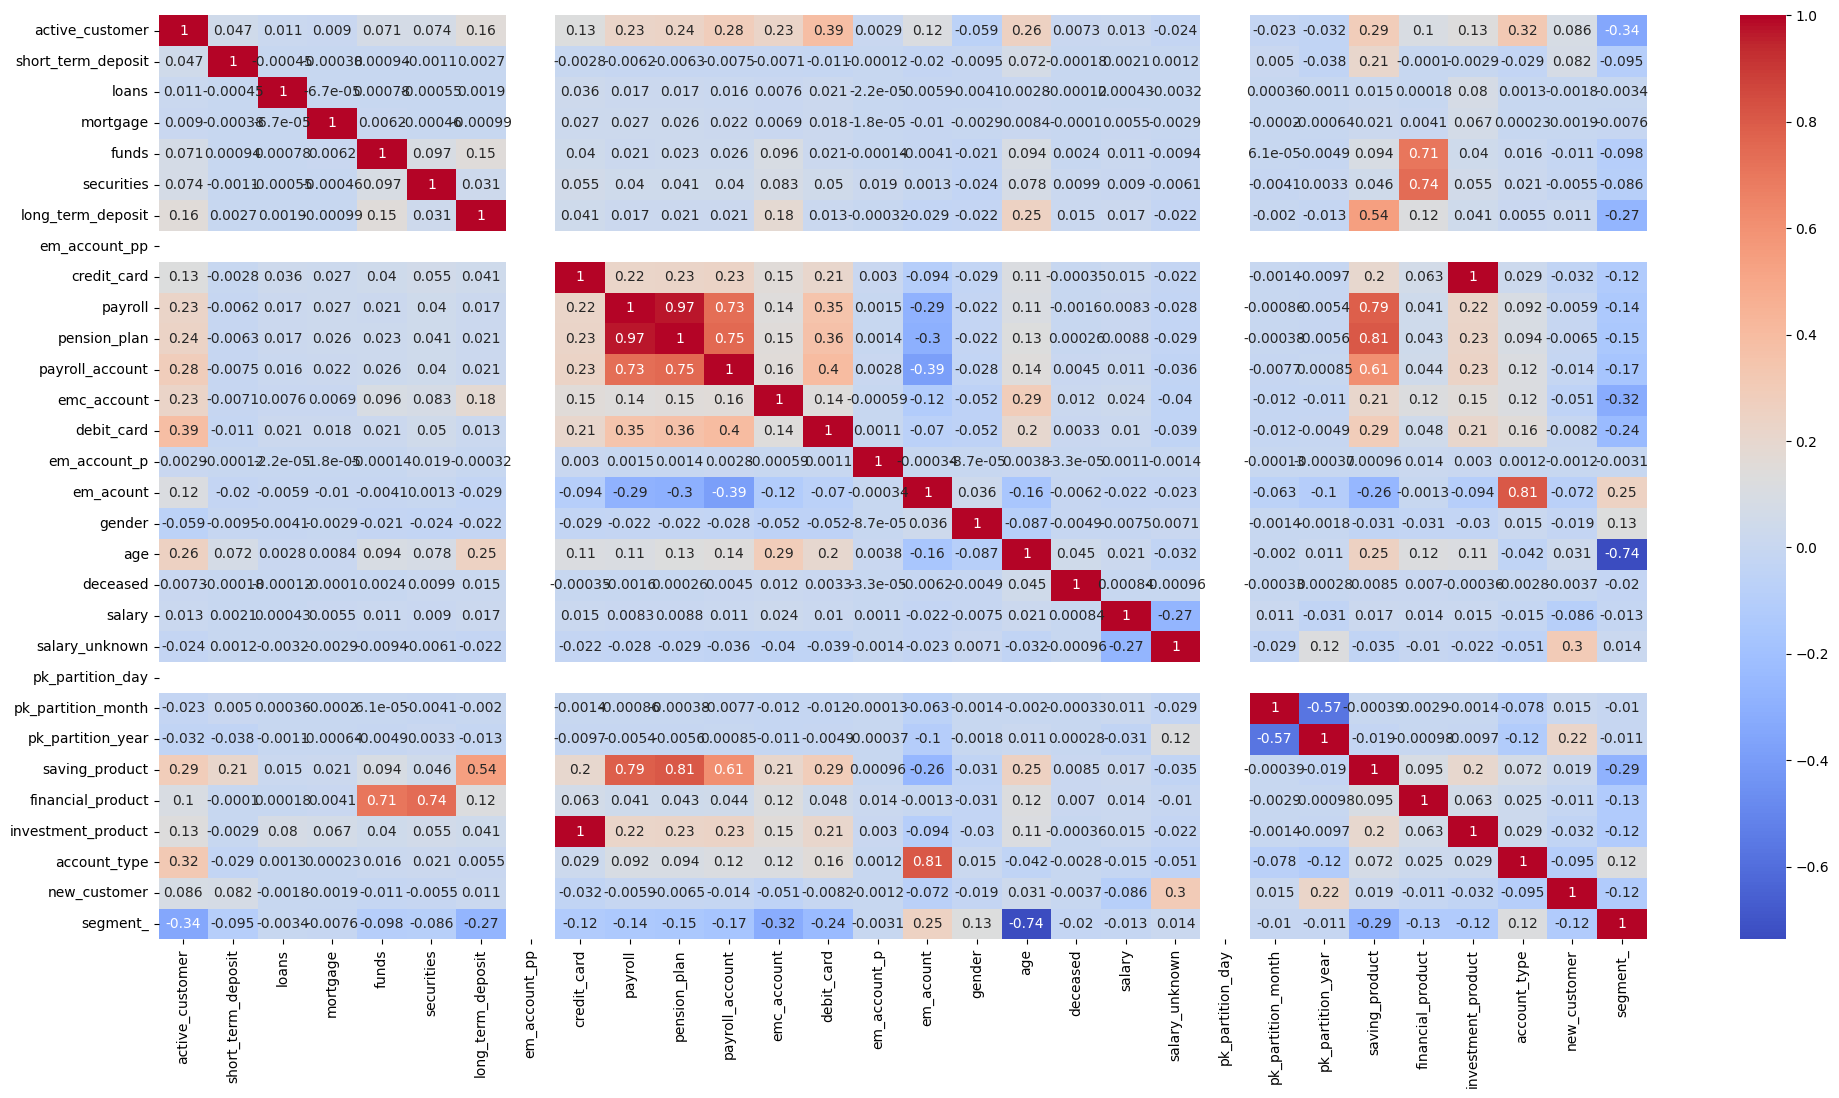

In [138]:
plt.figure(figsize = (24,12))
dataplot = sns.heatmap(full_commercial_corr_df, cmap="coolwarm", annot=True) 
plt.show()

From the heatmap above we can see that the products payroll, payroll_account and pension_plan have some relation (coeficients aroud 0.70). Also the segment is somehow related with the age (-0.57).
For the remaining features is not clear that it has any significant relation.

### 2.2 Sub barplots for each product considering the remaining products

Let's create bar plots of each product (A), of the number of ingestions for each of the remaining products, considering when #(A) = 0 and when #(A) = 1.

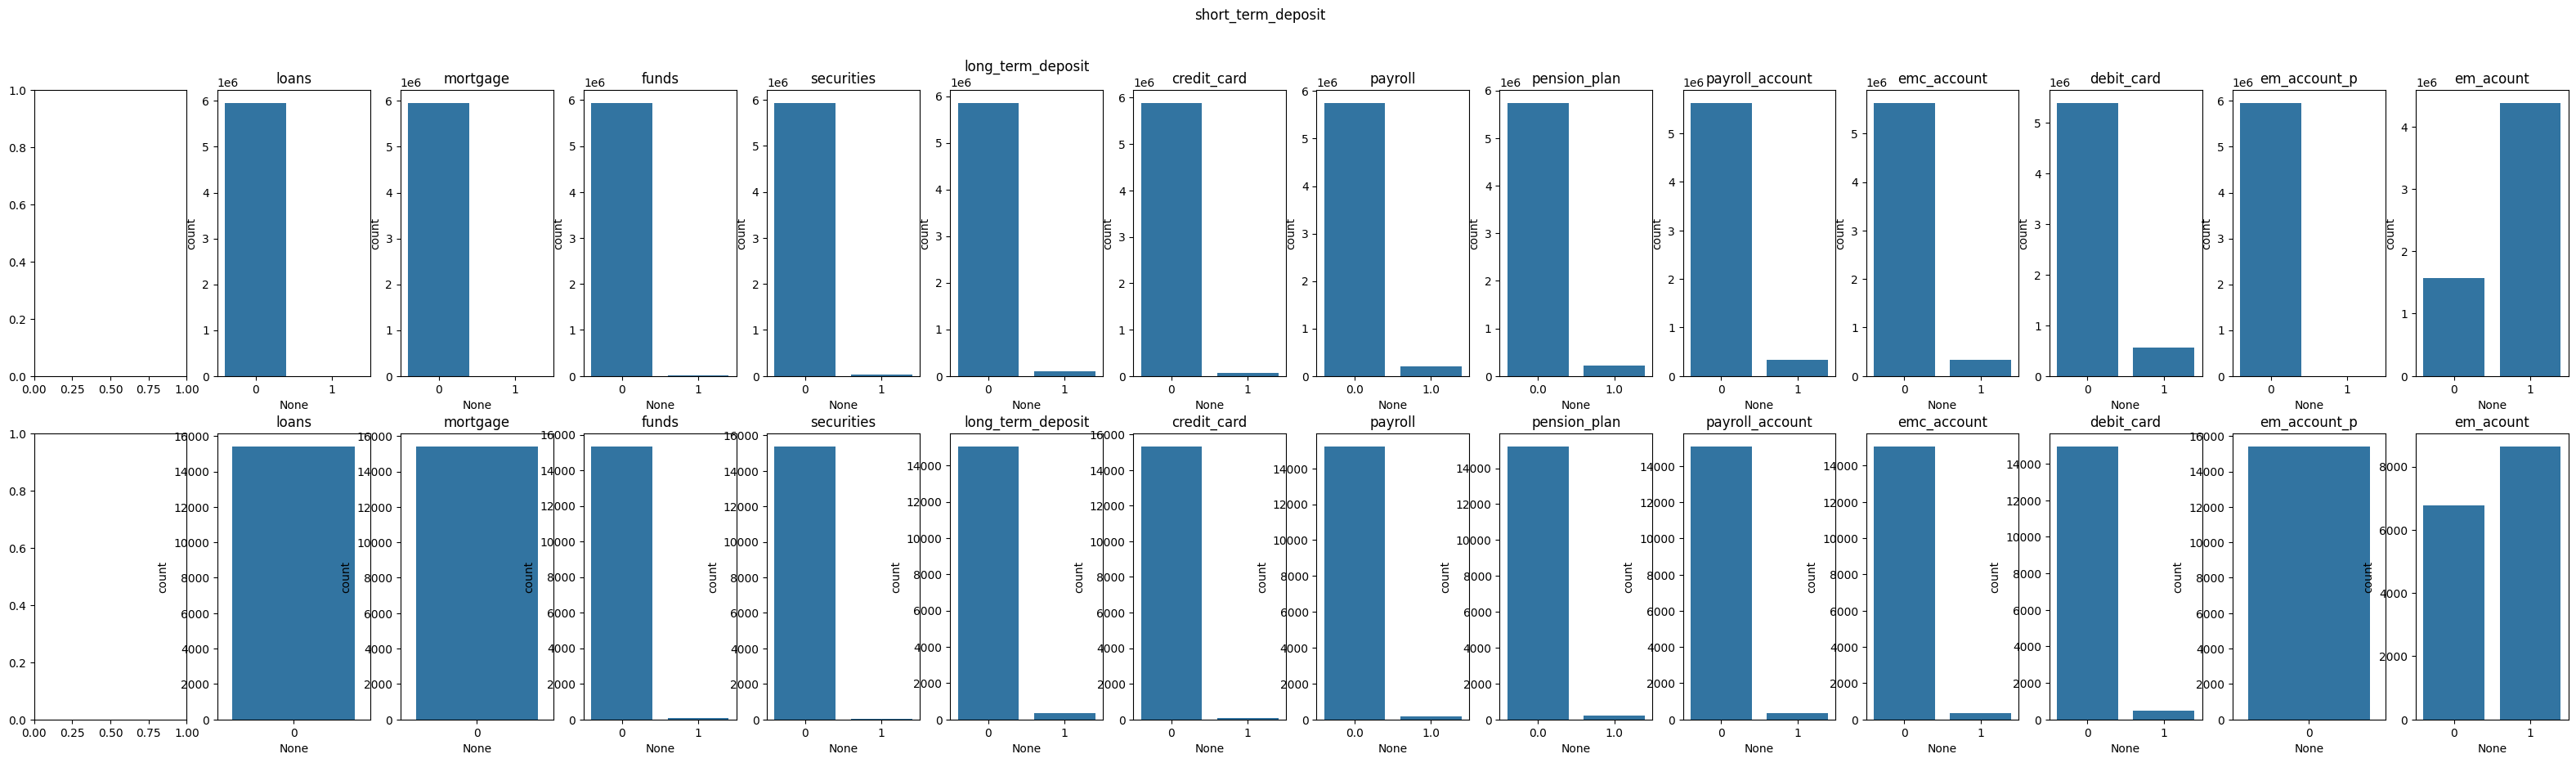

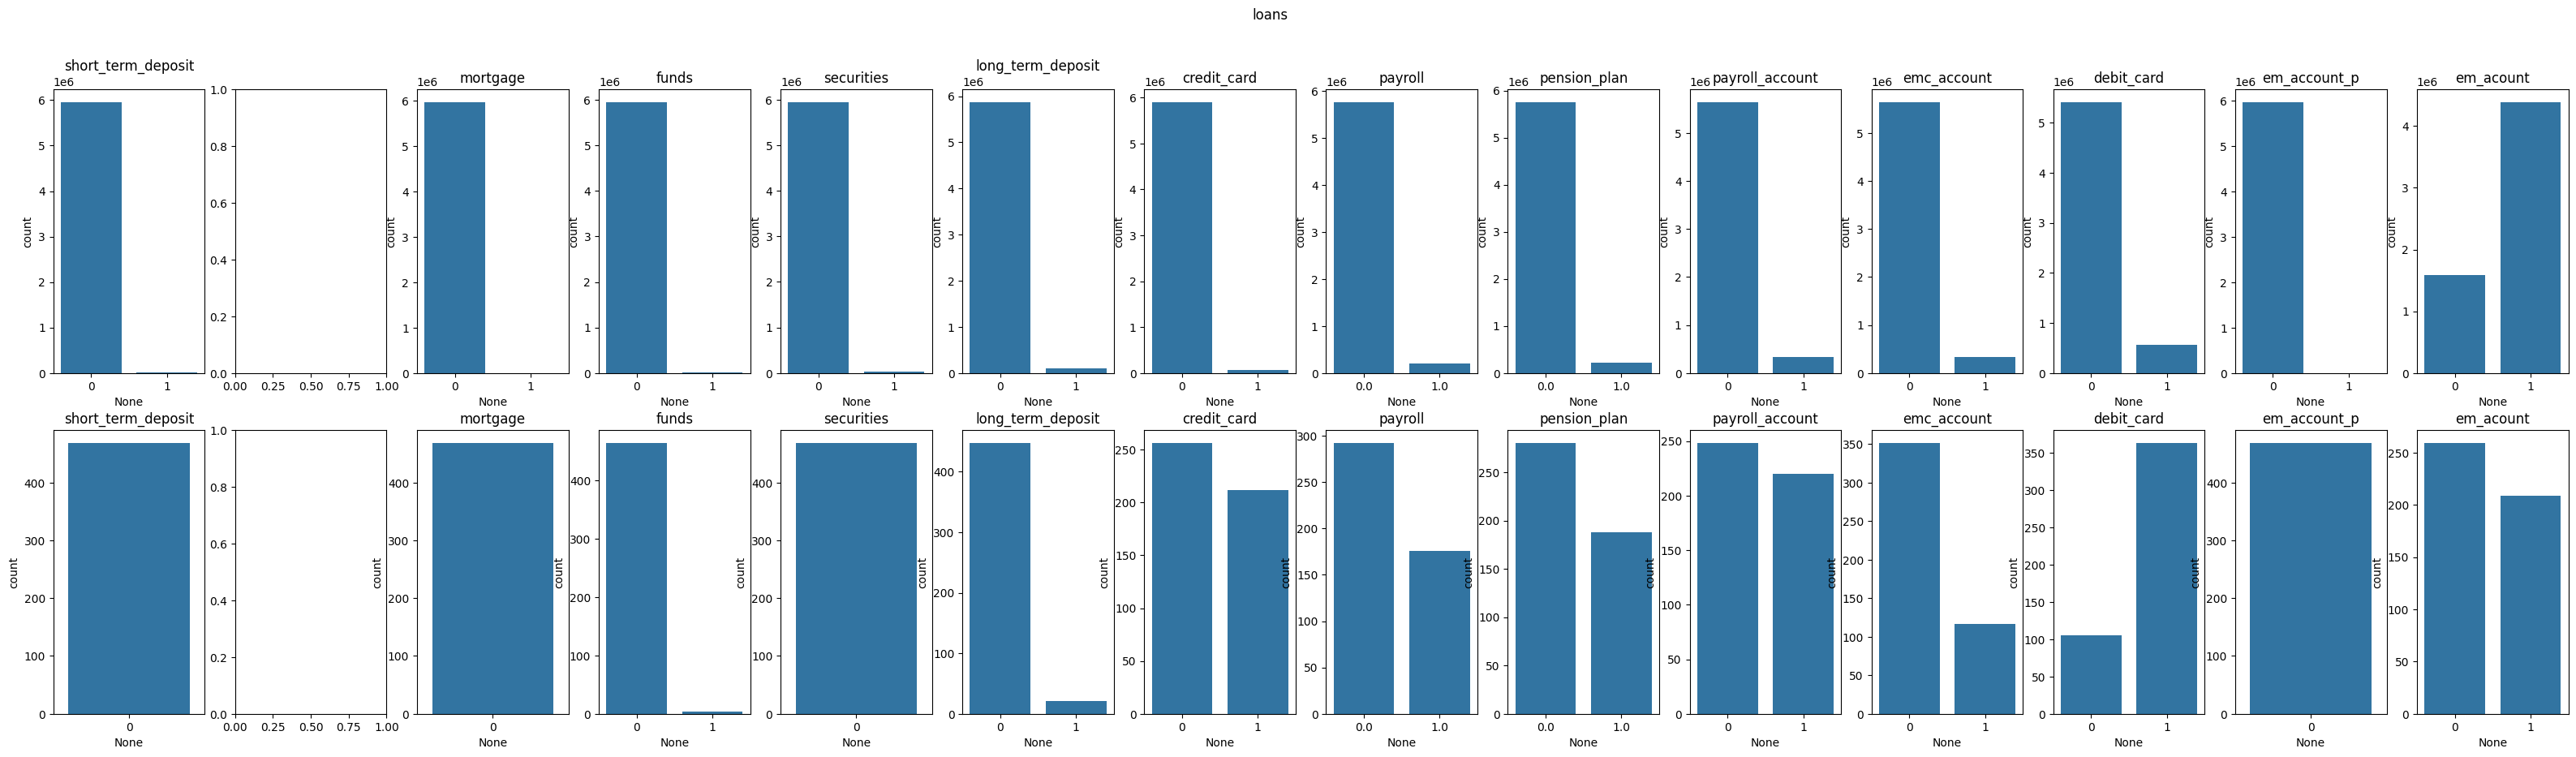

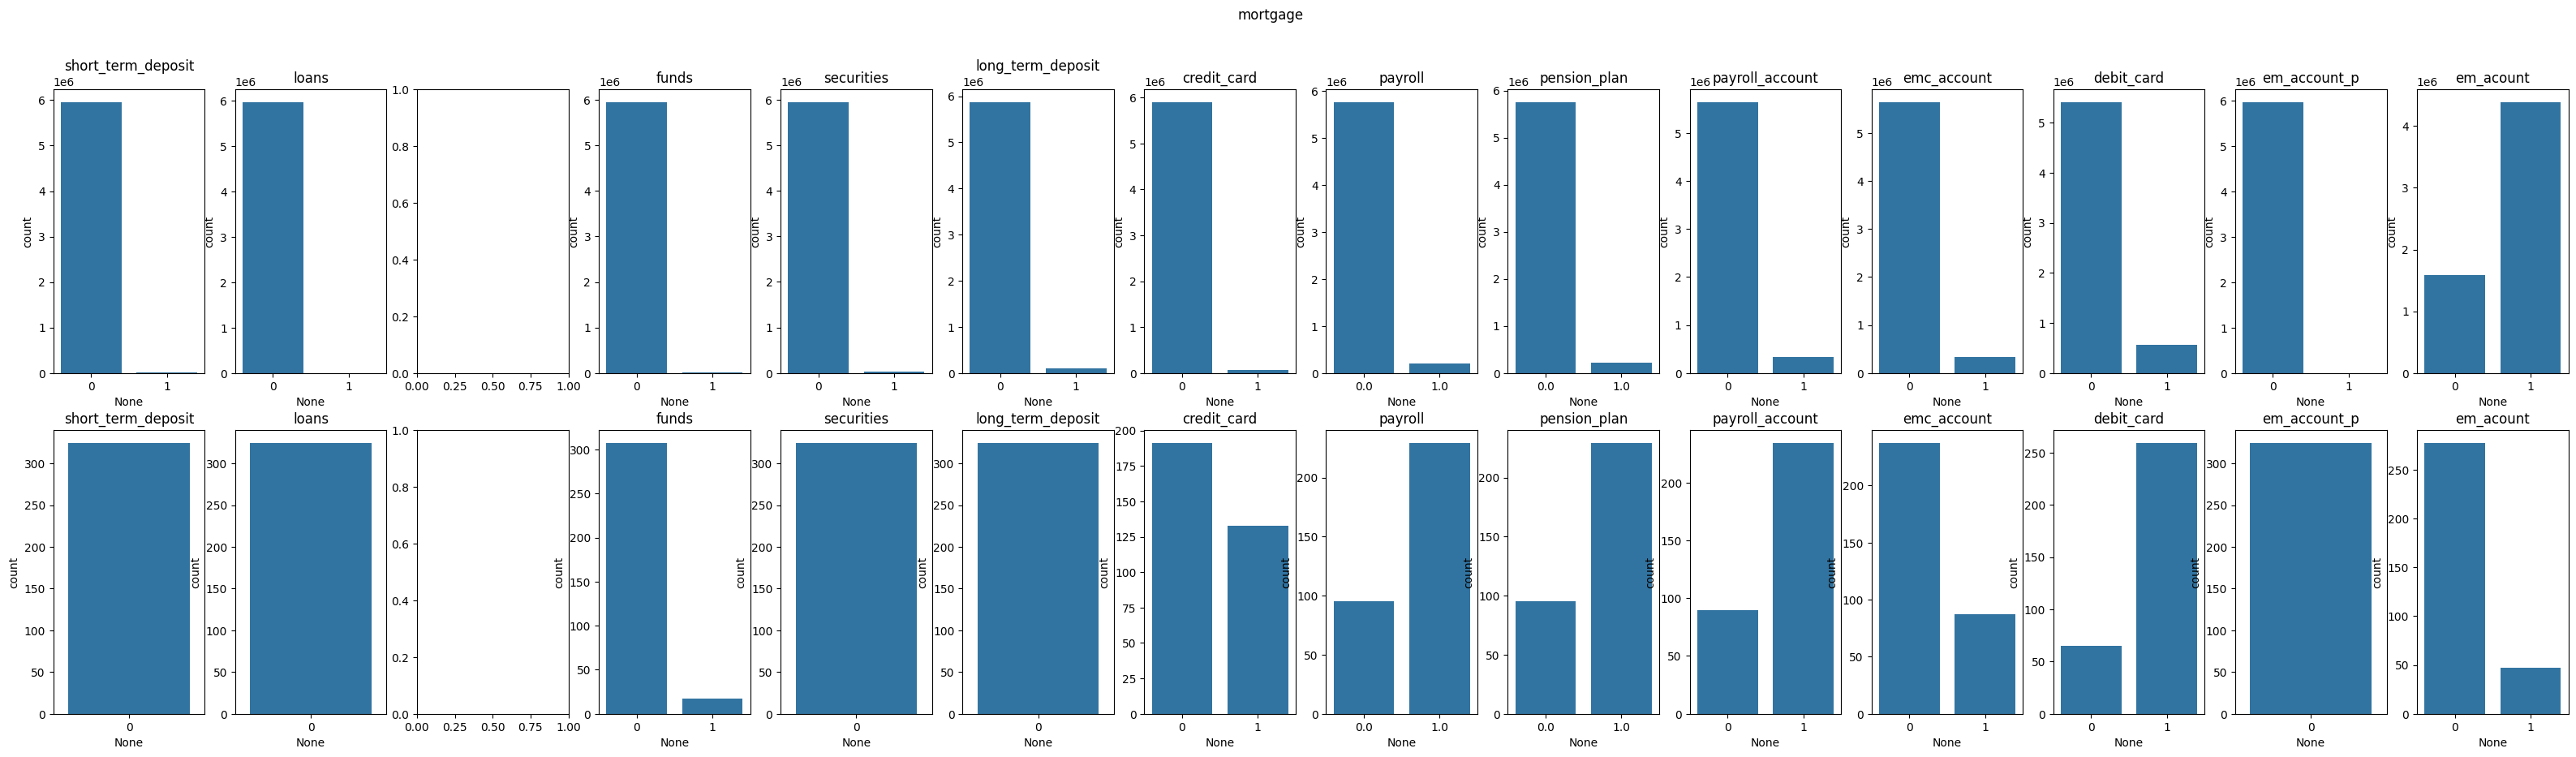

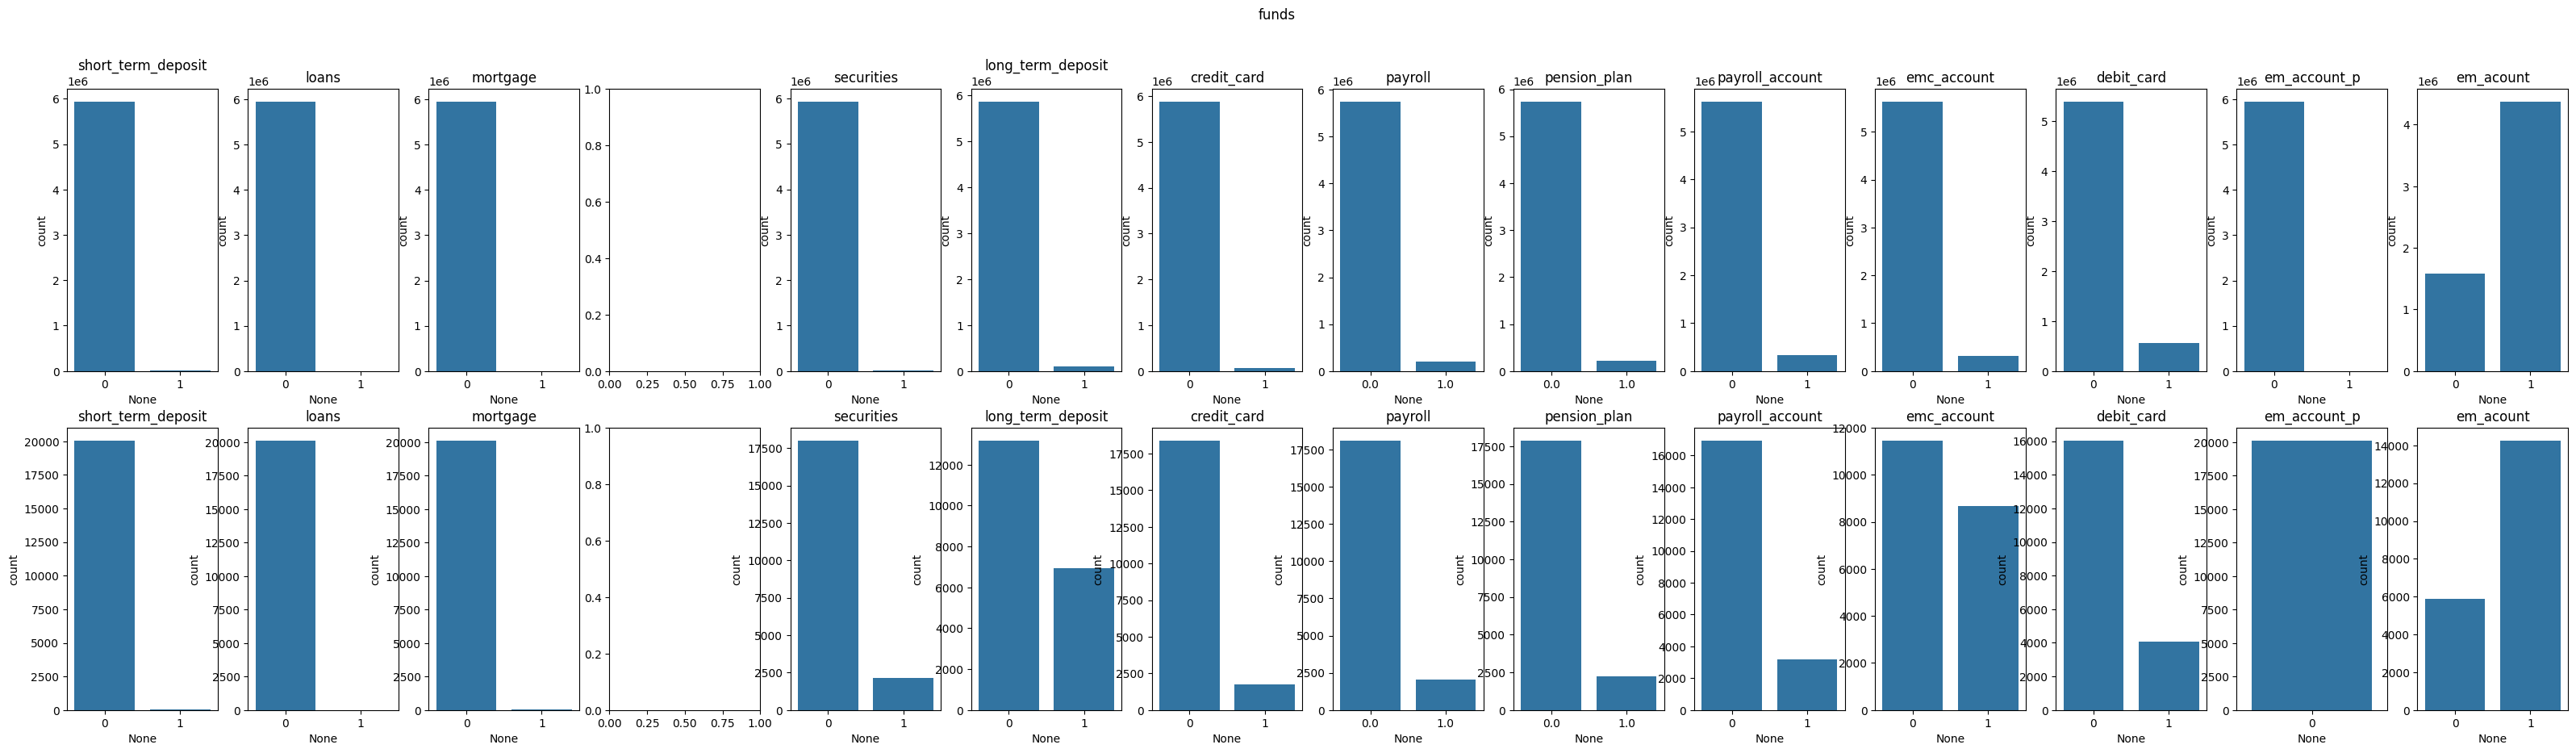

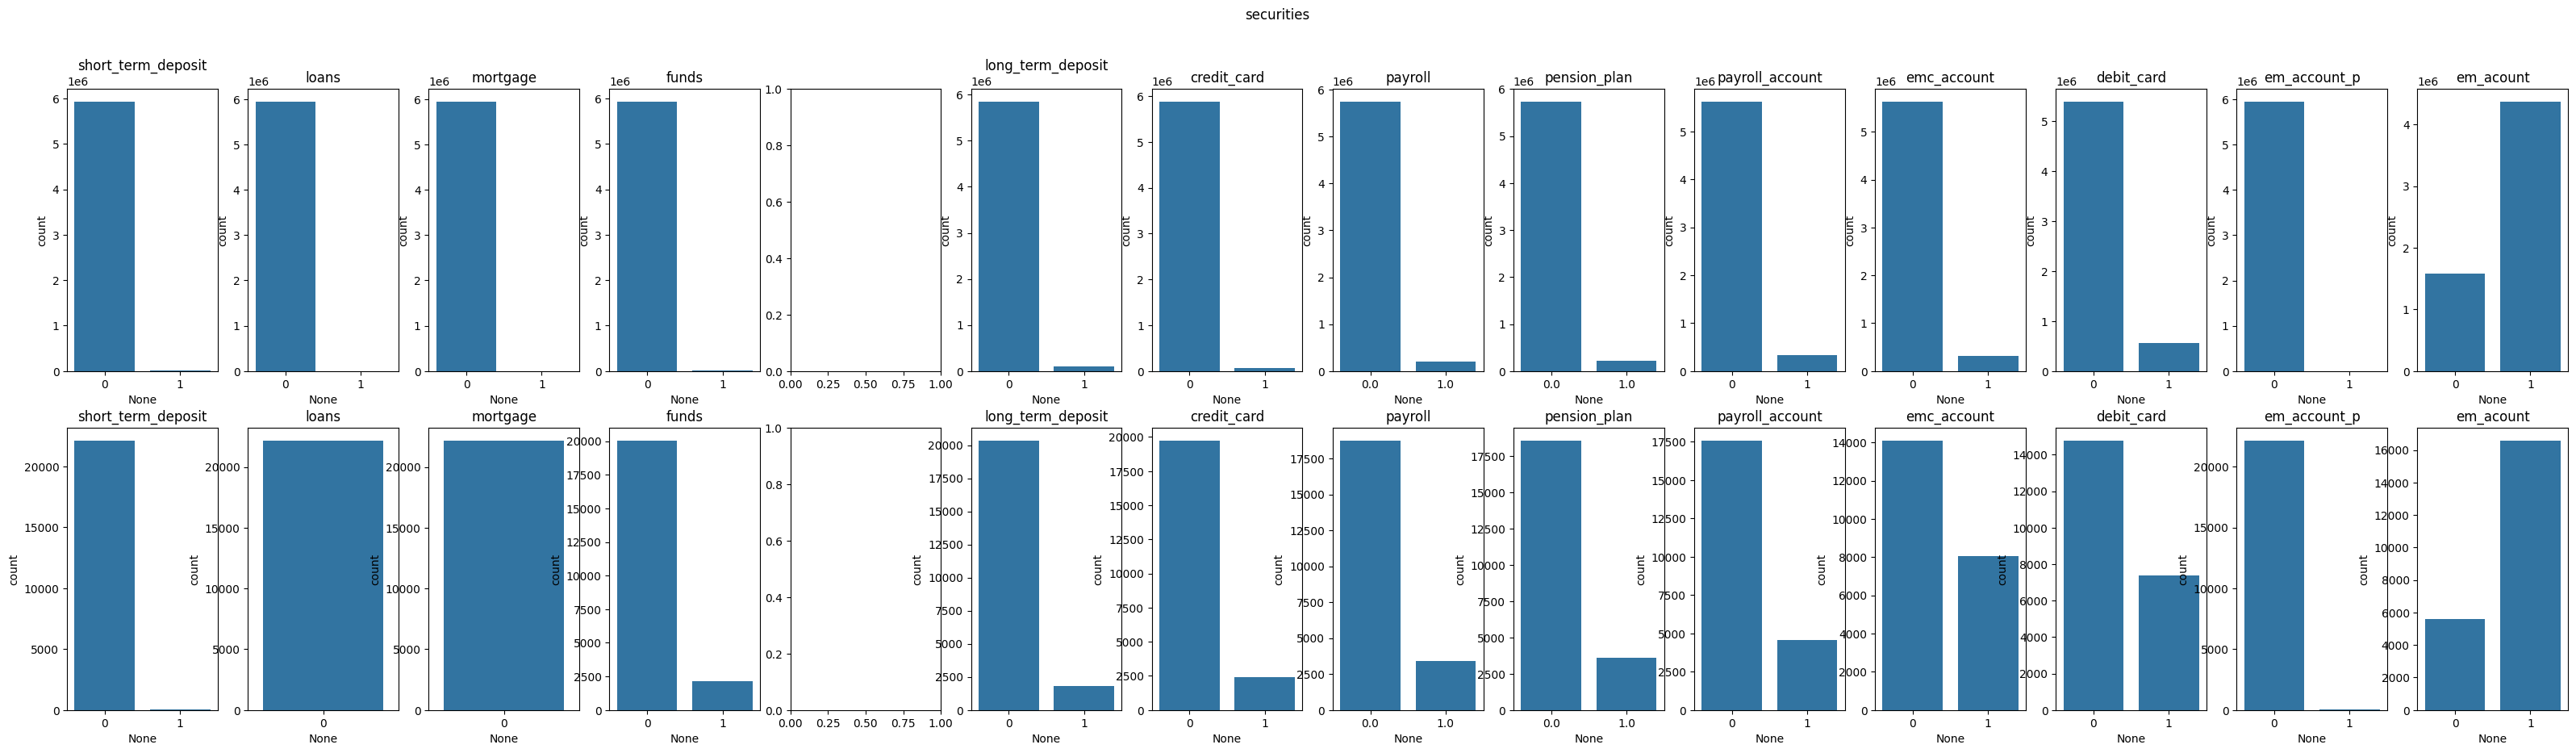

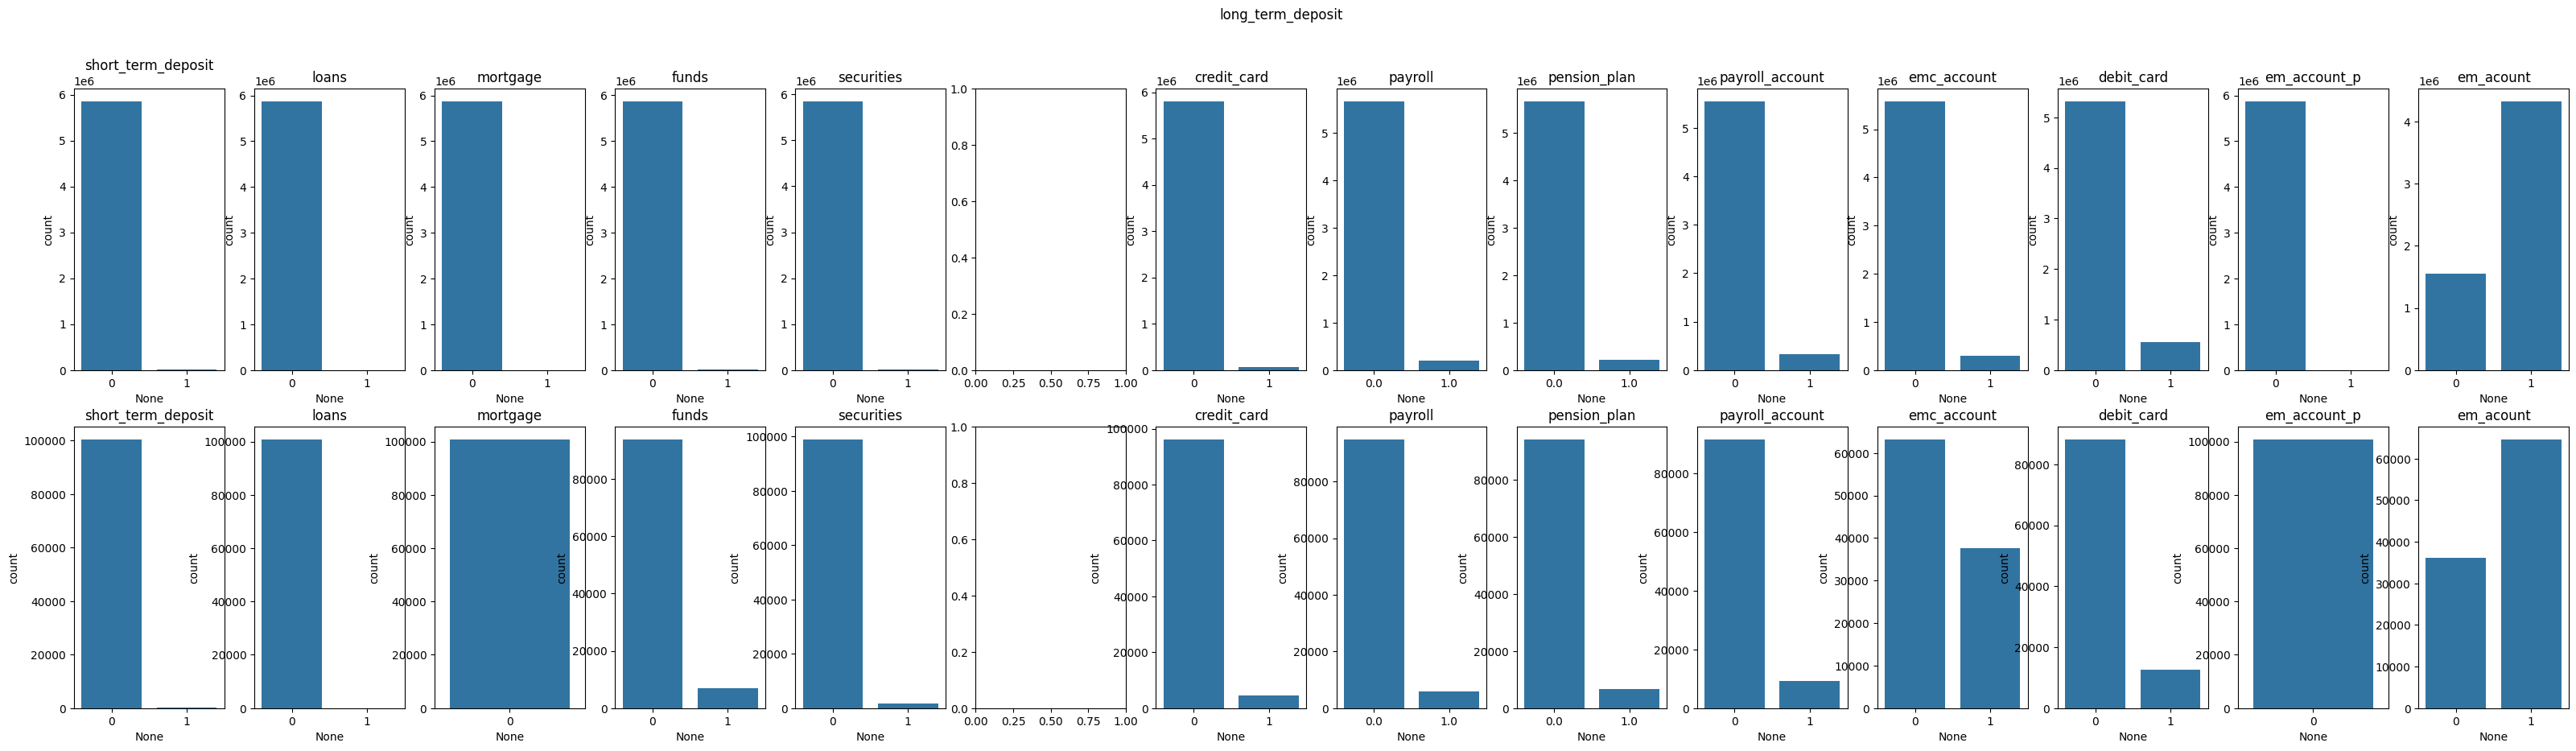

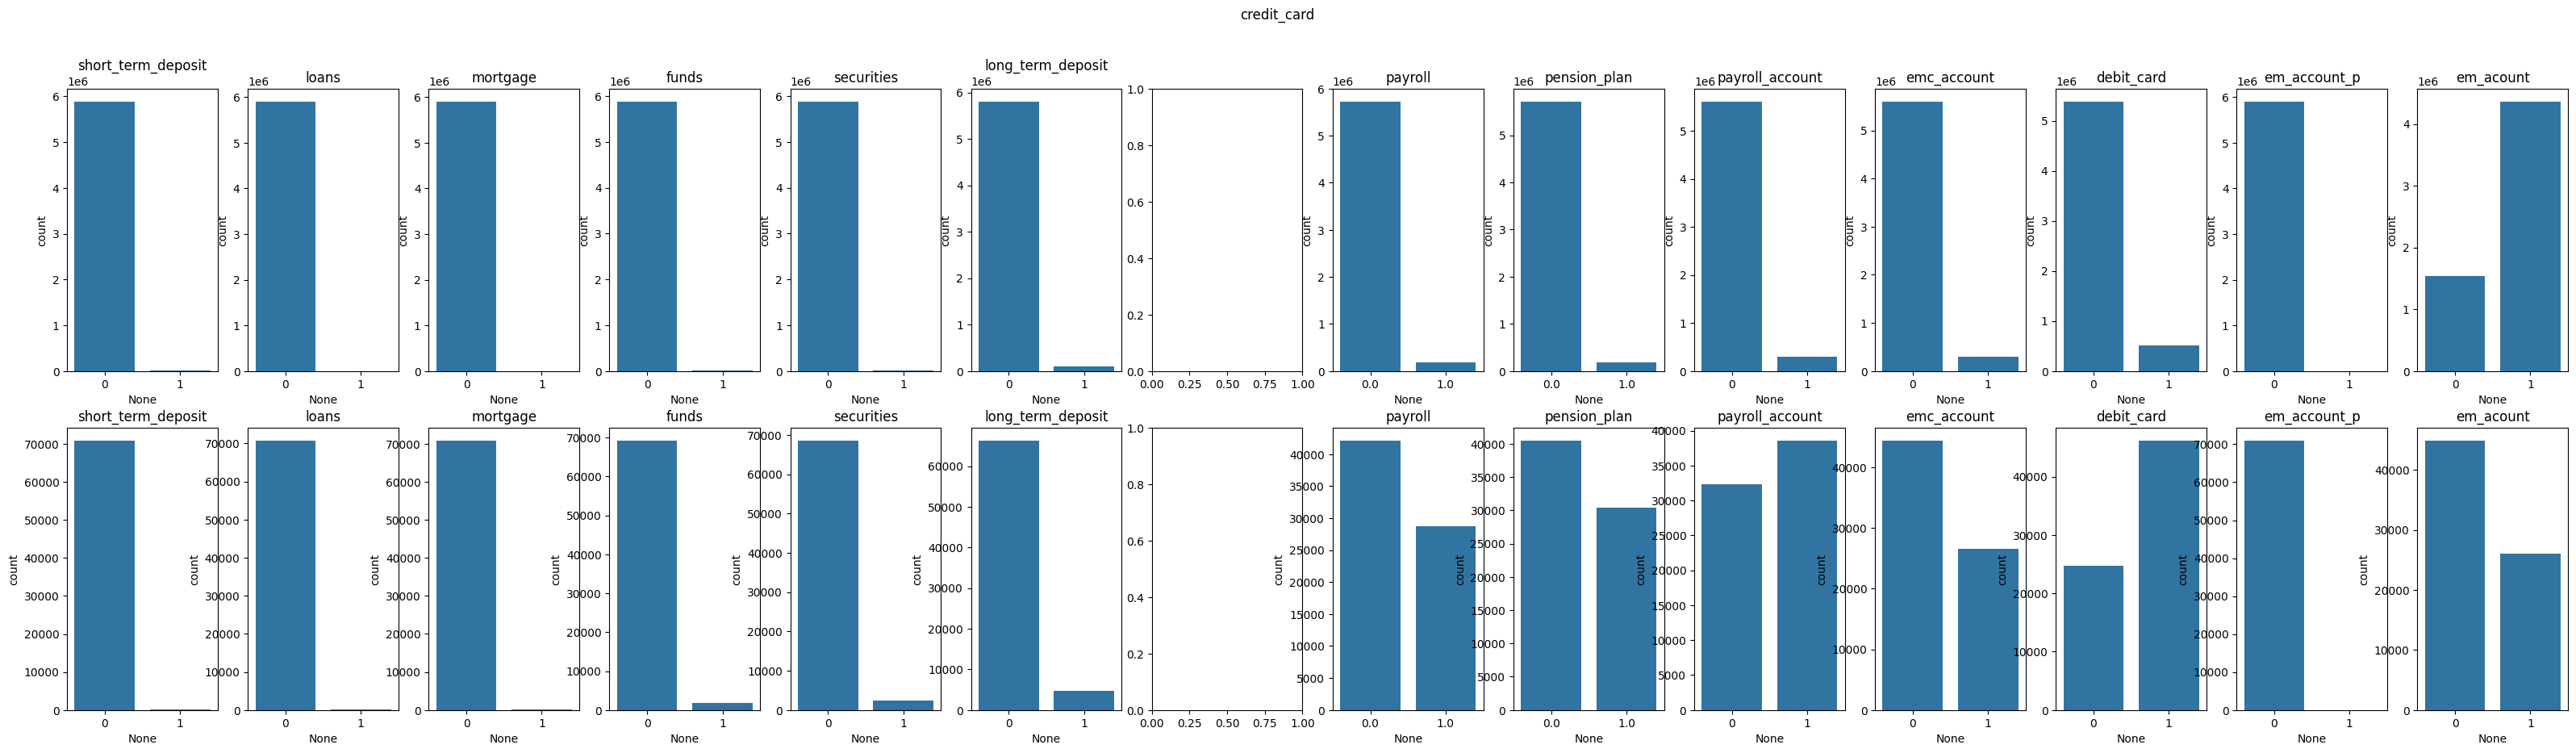

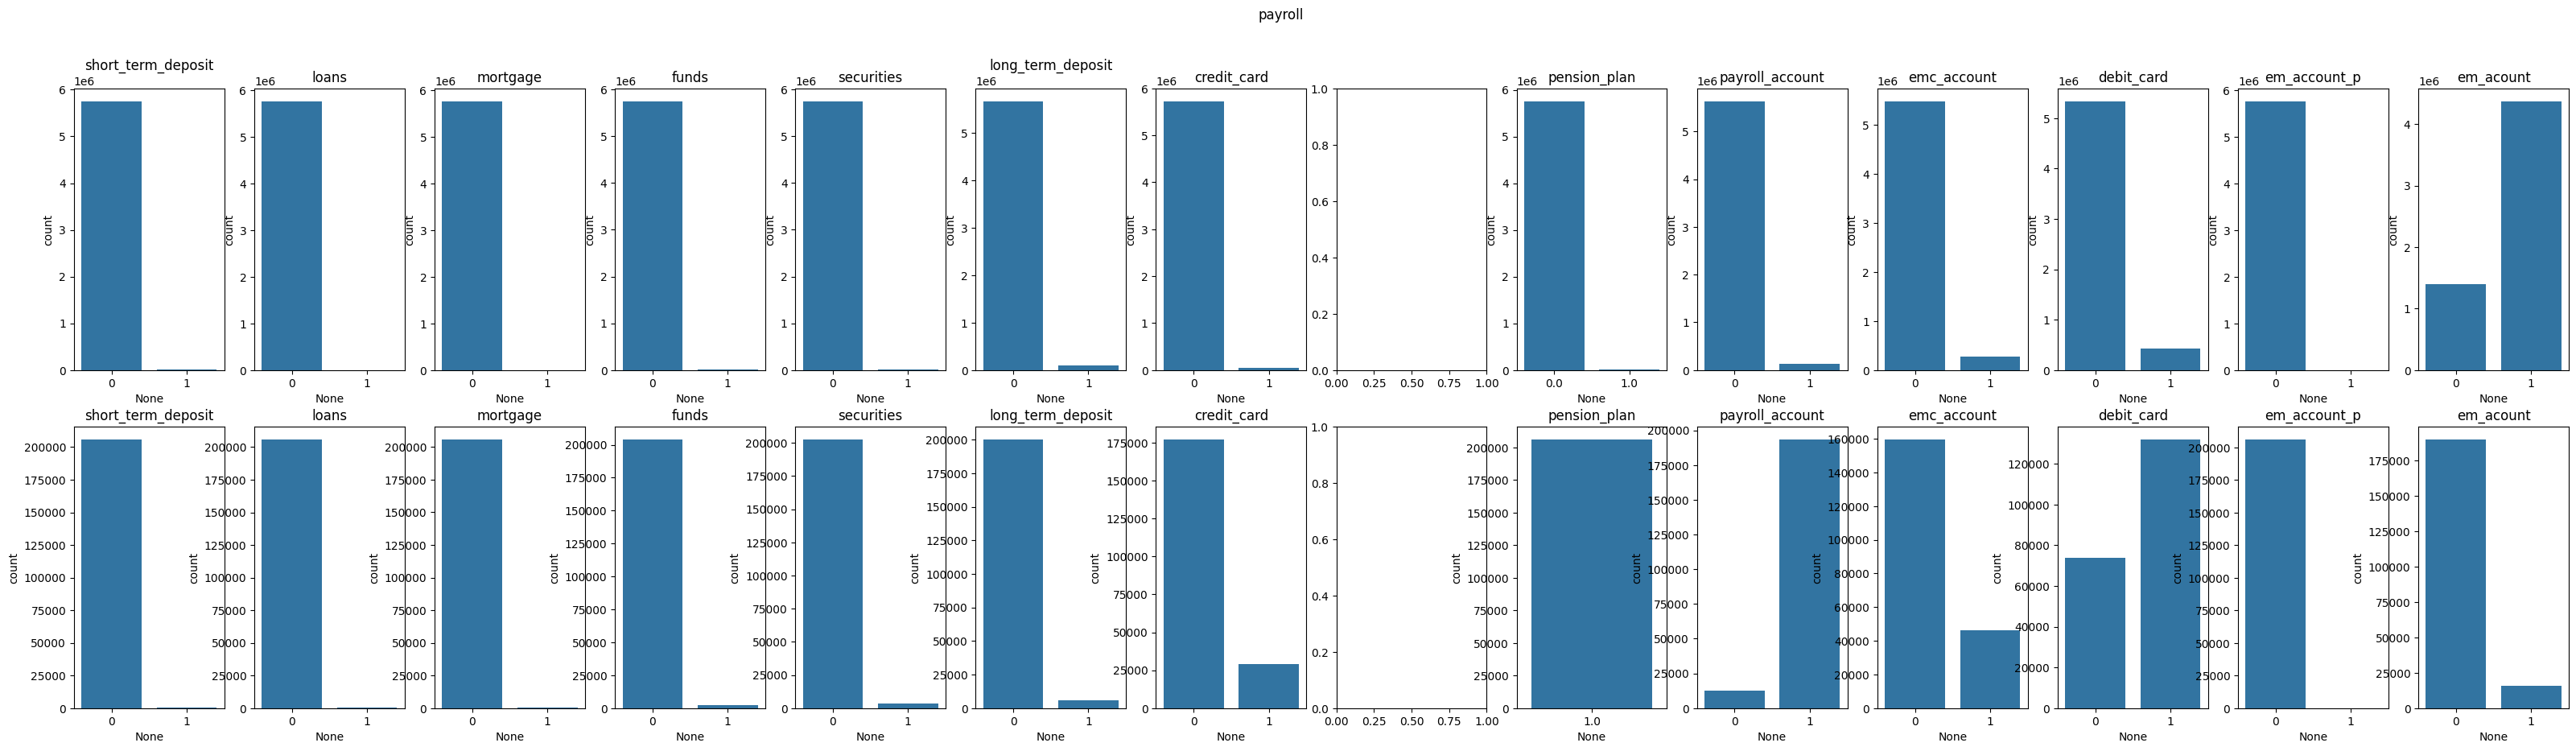

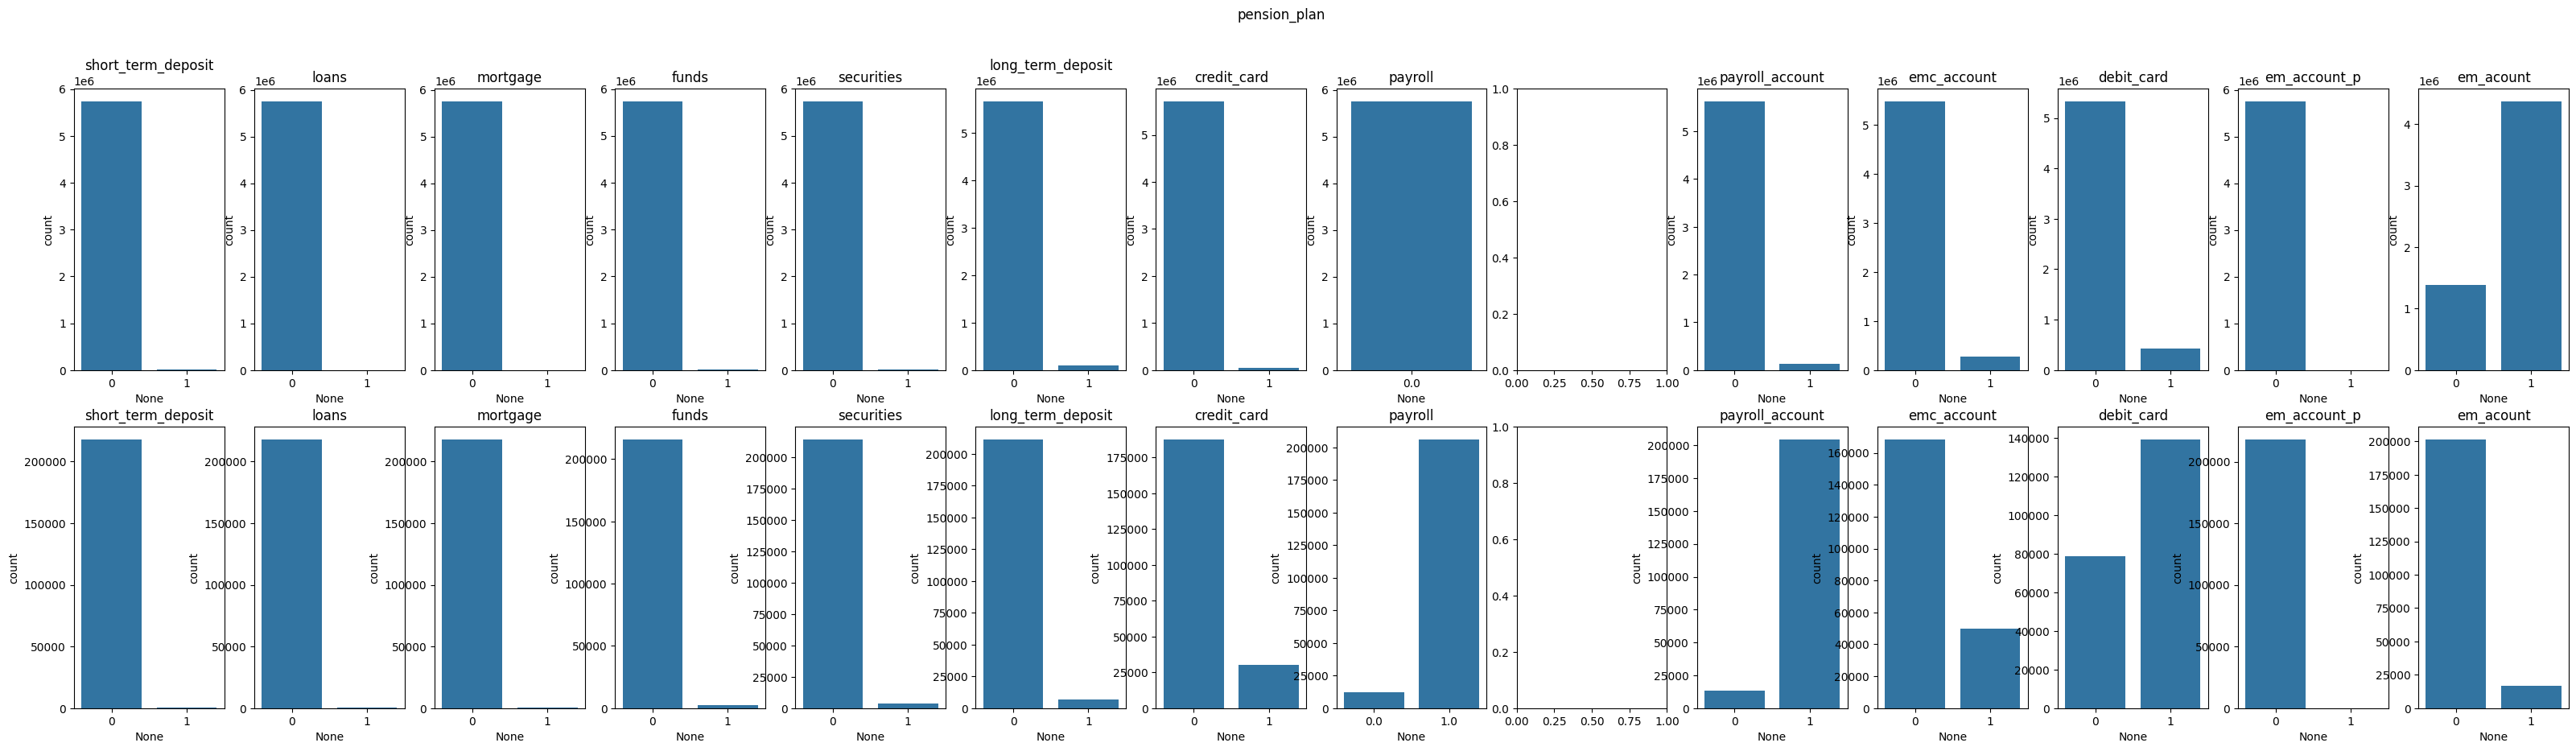

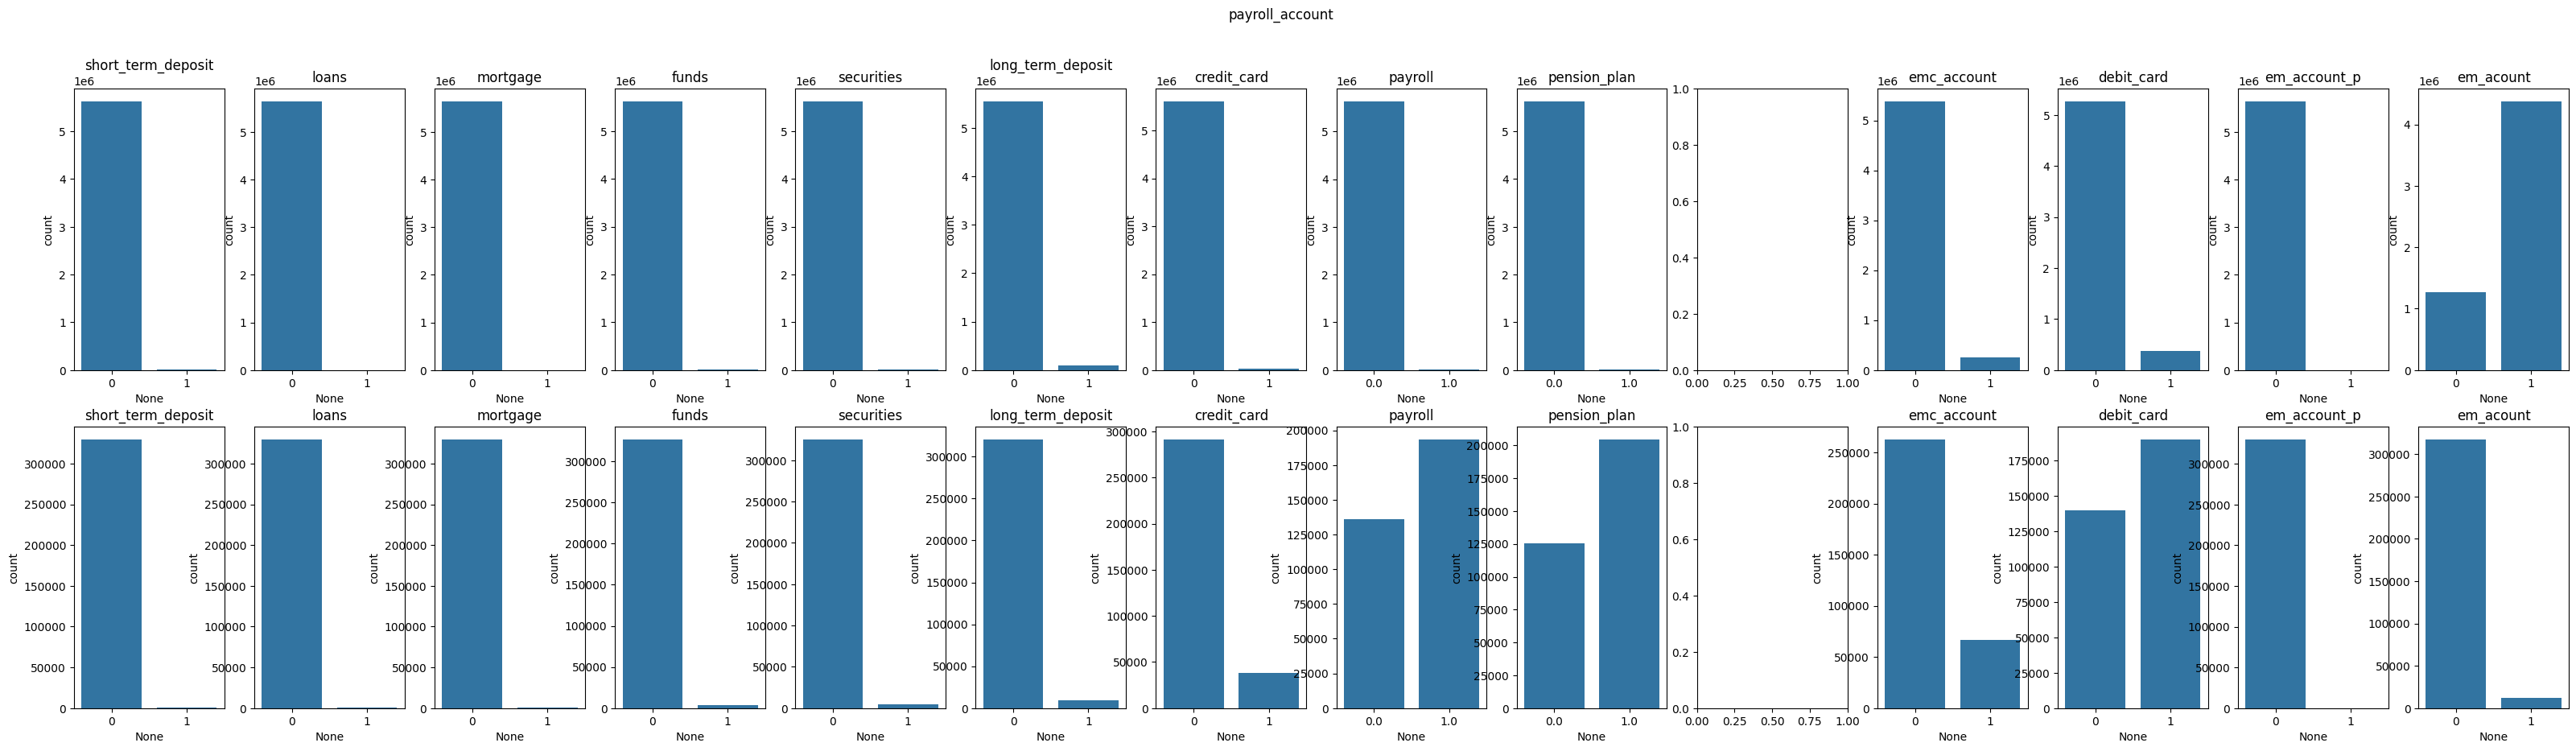

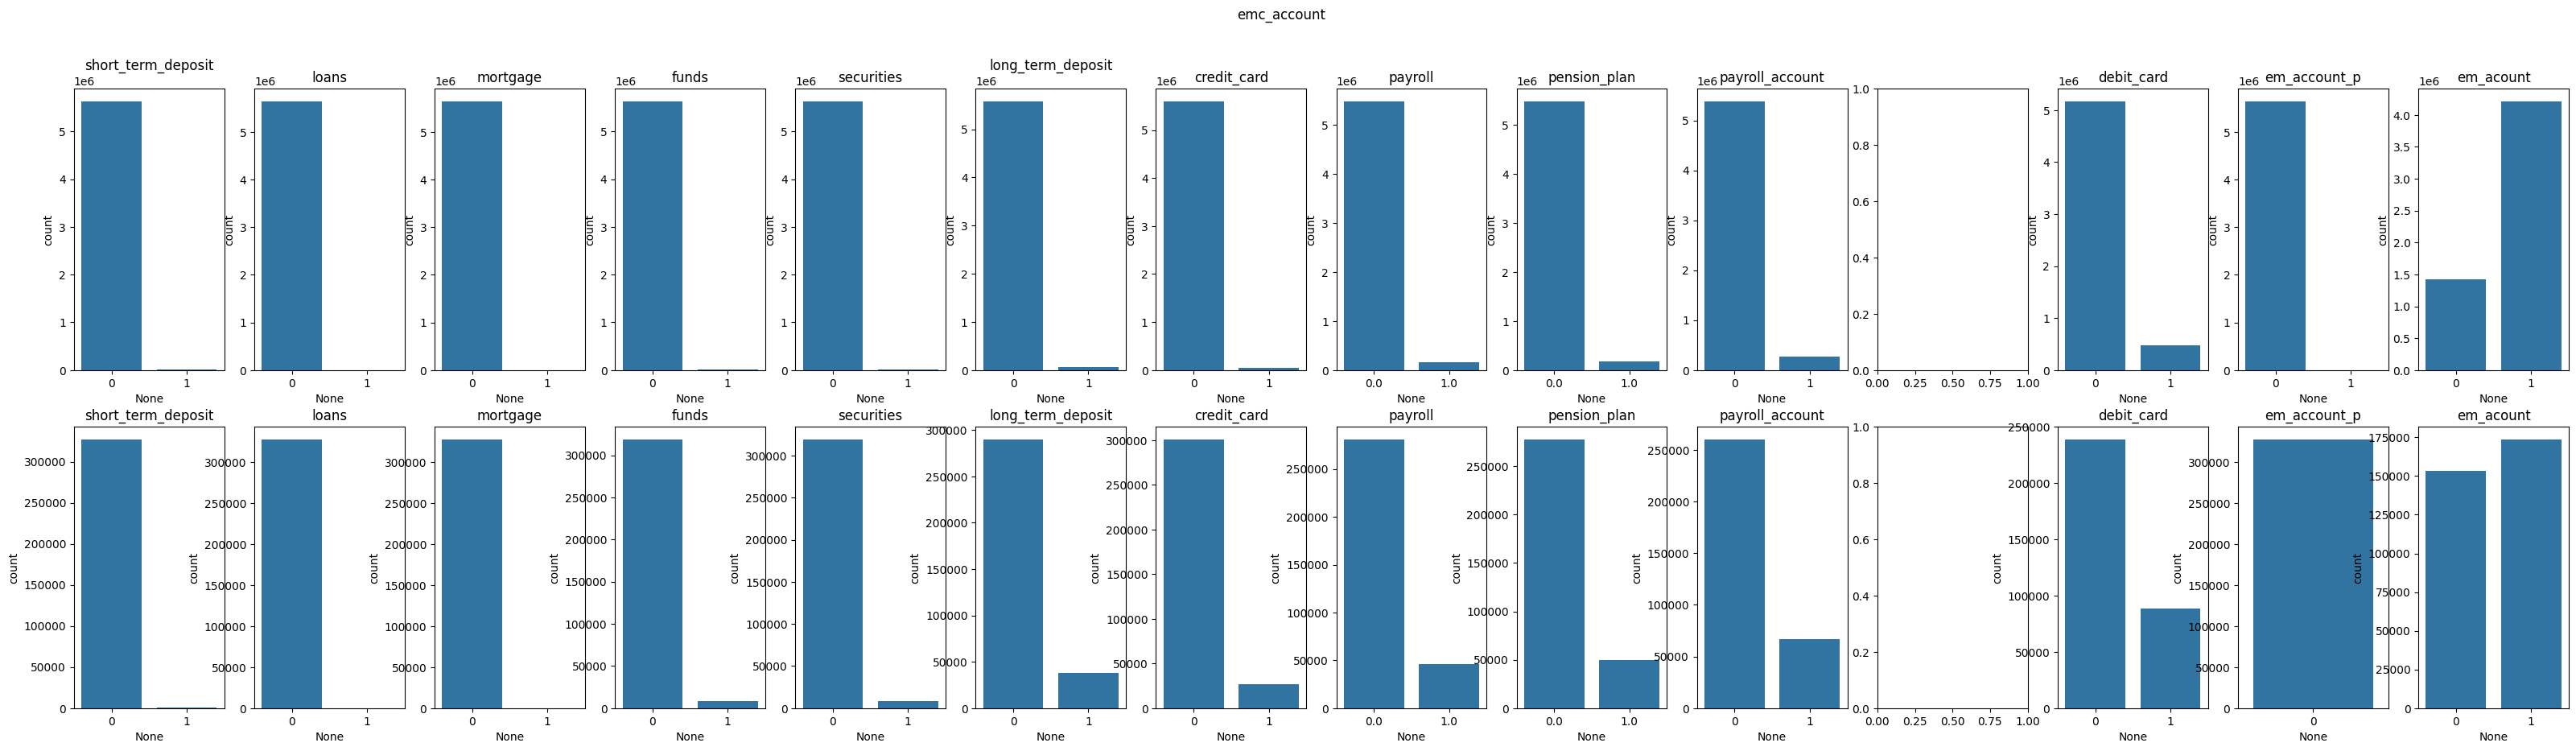

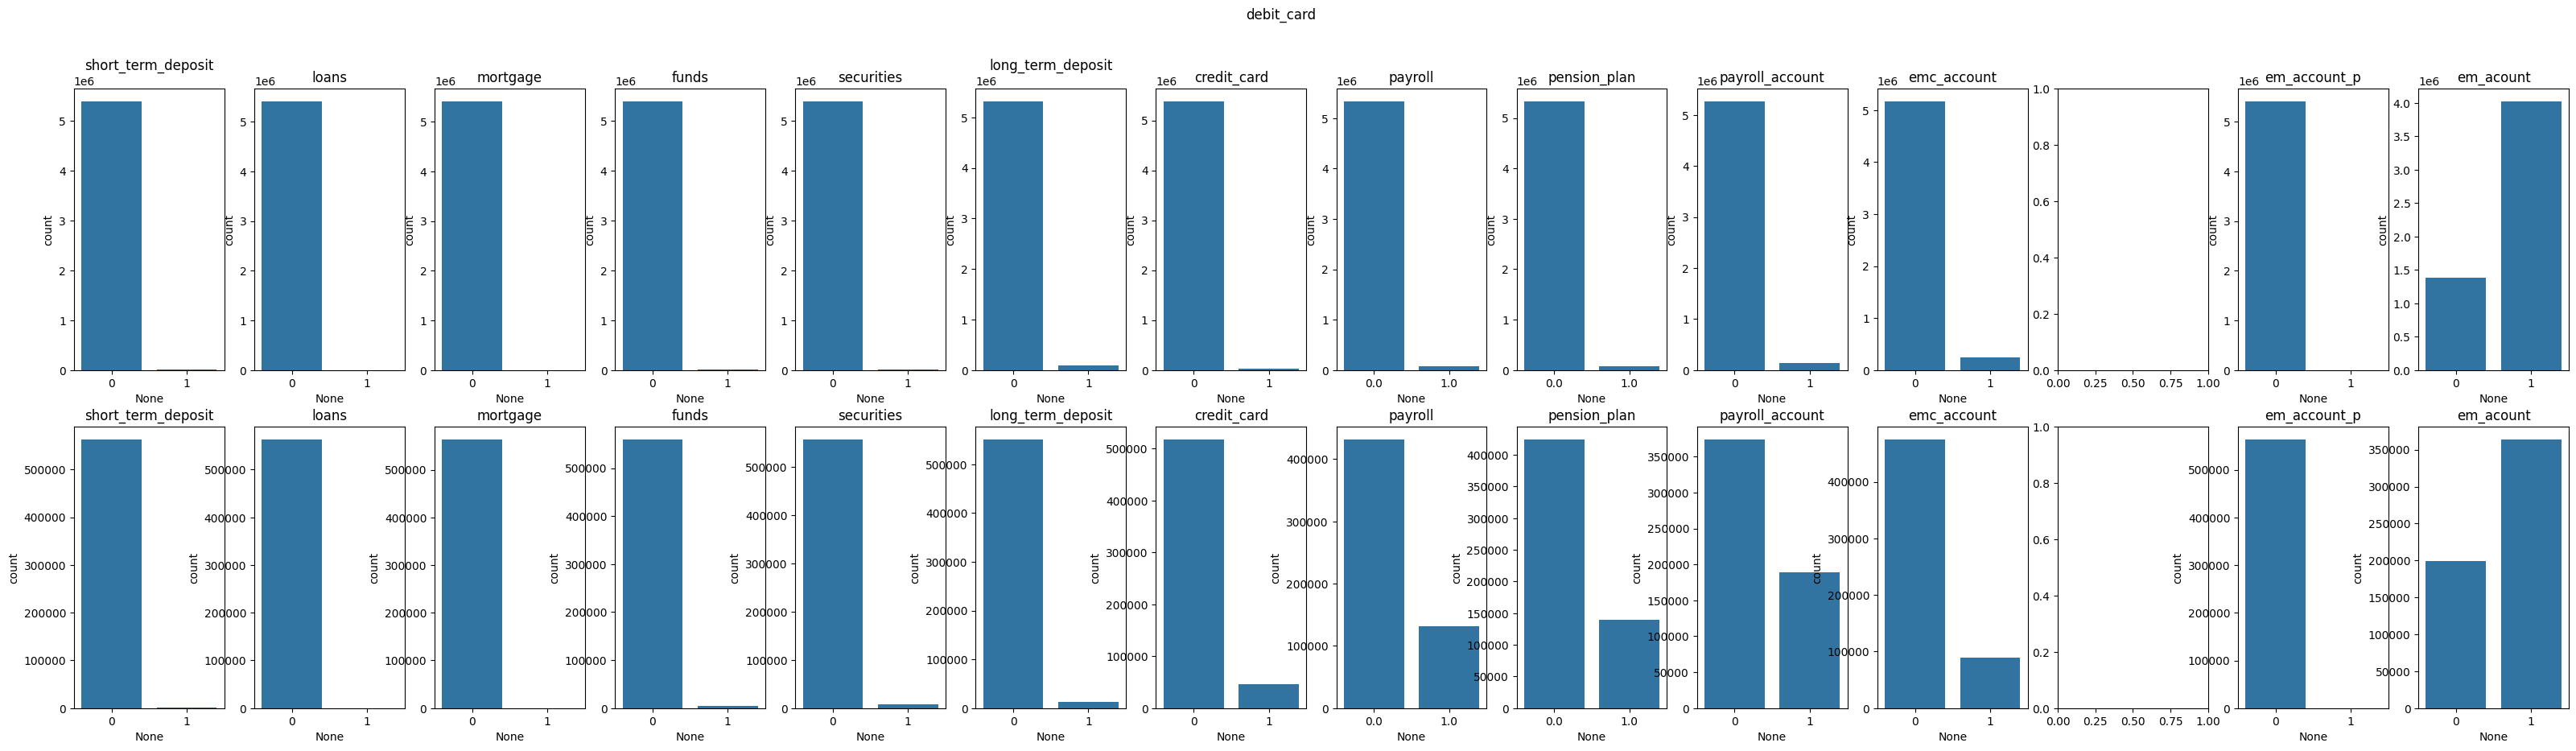

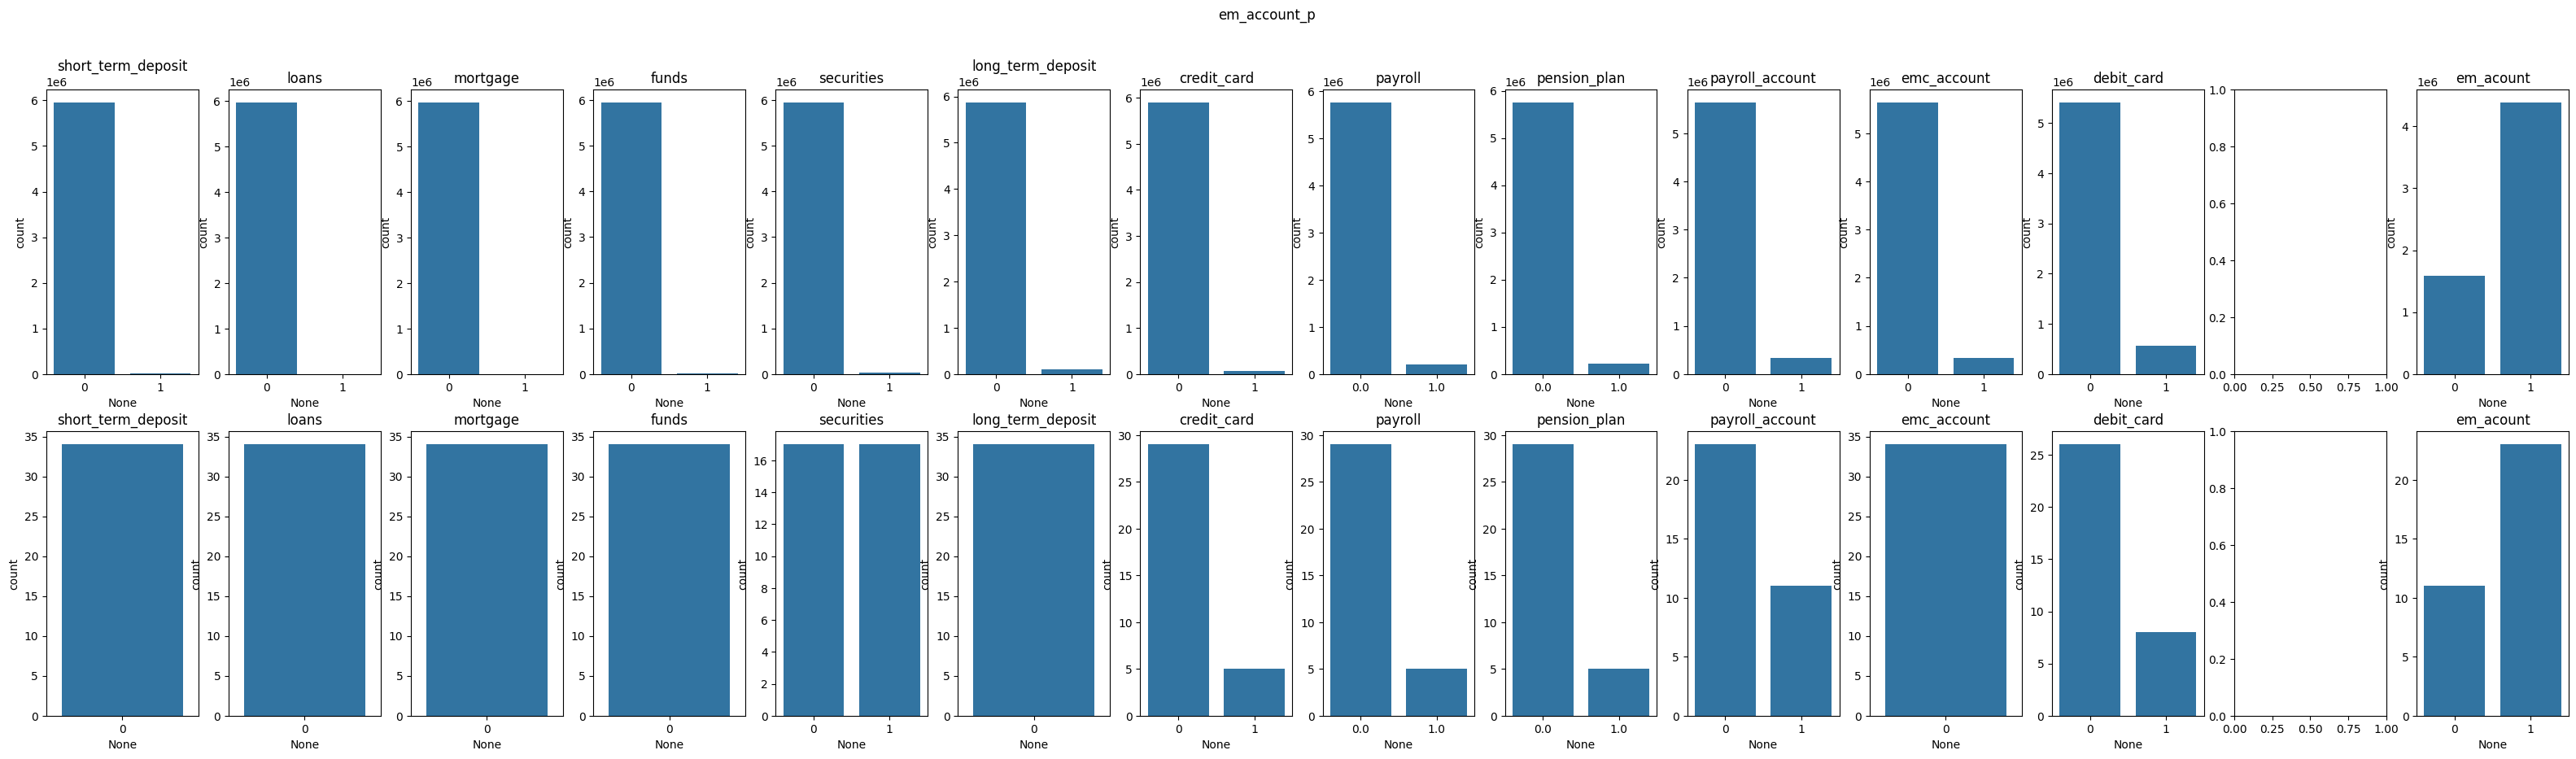

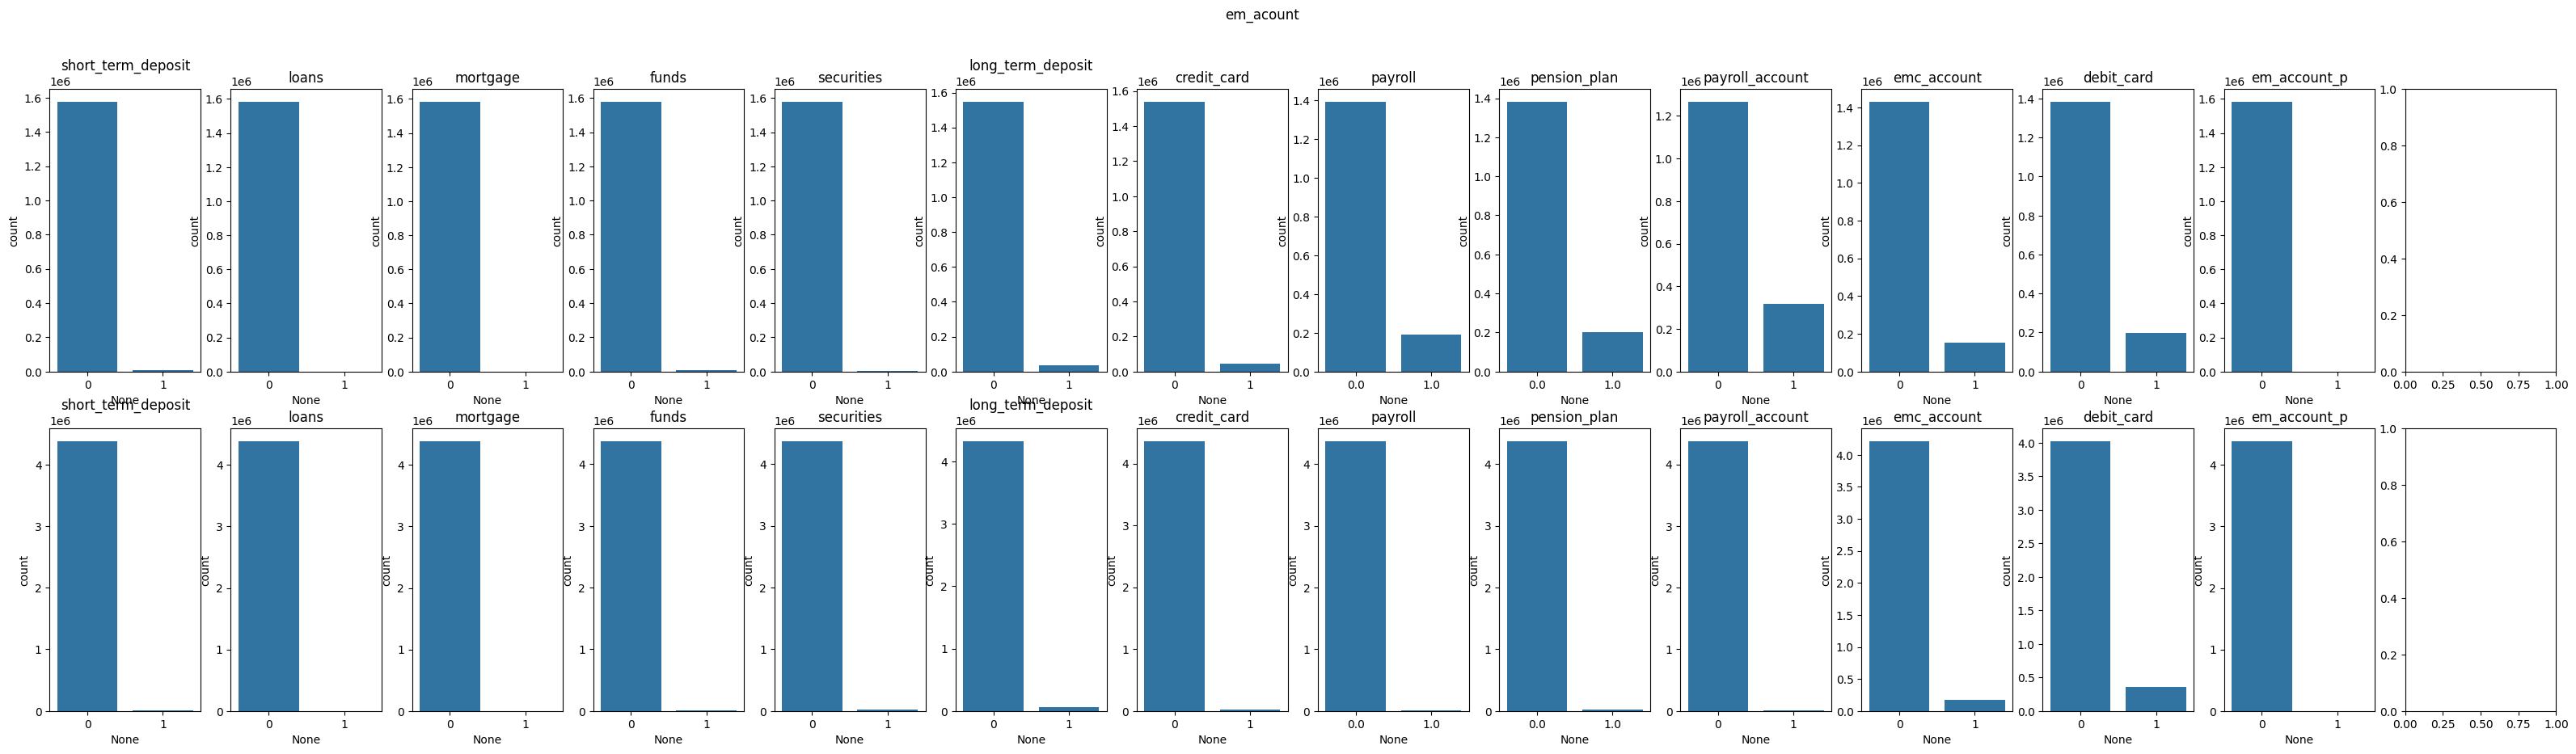

In [139]:
products_ = ['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

for idx, xs in enumerate(products_):
    fig, axes = plt.subplots(2, len(products_))
    fig.suptitle(f'{xs}')
    fig.set_size_inches(40,10)
 
    for idy, ys in enumerate(products_):
        if xs!=ys:
            plt_df2=pd.value_counts(full_commercial_df[ys][full_commercial_df[xs]==0].values)
            plt_df2=pd.DataFrame(plt_df2).sort_values(by="count", ascending=False)
            ax1=sns.barplot(ax=axes[0][idy], x = plt_df2.index, y = 'count', data = plt_df2).set_title(ys)

            plt_df1=pd.value_counts(full_commercial_df[ys][full_commercial_df[xs]==1].values)
            plt_df1=pd.DataFrame(plt_df1).sort_values(by="count", ascending=False)
            ax2=sns.barplot(ax=axes[1][idy], x = plt_df1.index, y = 'count', data = plt_df1).set_title(ys)
    
plt.show() 
                

From all the plot above, one can conclude, looking for the second set of graphs of each product (entries with such product with value 1), ie, considering the bars indicating 1 for both pair of products:
 1. short_term_deposit has some relation with em_acount;
 2. loans have some relation with em_acount;
 3. mortgage has some relation with payroll, pension_plan and debit_card;
 4. funds has some relation with em_acount;
 5. credit_card: has some relation with debit_card and the trend is em_acount be 1 when credit_card is 0;
 6. payroll: all ingestions of payroll = 1 have pension_plan = 1. Also has strong relation with payroll_account and debit_card;
 7. pension_plan: has strong relation with payroll, but not all ones are payroll = 1;
 8. payroll has some relation with payroll_plan and pension_plan, but it is stronger if we look in the perspective of payroll and pension_plan = 1 then the opposite.

__________________
# C. ANALYSIS BY CLIENT
__________________

## 1. Creating a new dataframe by grouping by client cid

The dataset gives information about the situation of each client since 2018, or since, he made a registration (if entry date is after such date).
However it's important to analyse the values in terms of sales, ie, if a client in 2 consecutive months has for instance, em_acount equals 1, it doesn't mean that he bought 2 of such products, but that he mantains the product he bought before.
So, to find the number of sales we need to check the differences between each consecutives months ant when the diference is 1, it means we bought the product in that month. If it is 0, the mantains and if it -1 he "left" the product.

In [140]:
full_commercial_df.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'salary_unknown',
       'pk_partition_day', 'pk_partition_month', 'pk_partition_year',
       'Age_group', 'saving_product', 'financial_product',
       'investment_product', 'account_type', 'new_customer'],
      dtype='object')

In [141]:
cols=['pk_cid', 
      'pk_partition', 'entry_date', 'entry_channel', 'active_customer', 'segment', 
      'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 
       'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id', 
       'region_code', 'gender', 'age', 'deceased', 'salary', 
       'salary_unknown', 'Age_group', 'saving_product', 'financial_product', 'investment_product',
       'account_type','antiquity','new_customer']

full_commercial_1_df=full_commercial_df.copy()
full_commercial_1_df["antiquity"]=(full_commercial_1_df["pk_partition"].max(axis=0)-full_commercial_1_df["entry_date"]).dt.days
client_df = full_commercial_1_df[cols].groupby(['pk_cid']).agg({cols[1]: 'count', cols[2]: 'max' , cols[3]: 'min', cols[4]: 'mean', cols[5]: 'min',
                                                              cols[6]: 'sum', cols[7]: 'sum' , cols[8]: 'sum', cols[9]: 'sum', cols[10]: 'sum',
                                                              cols[11]: 'sum', cols[12]: 'sum' , cols[13]: 'sum', cols[14]: 'sum', cols[15]: 'sum',
                                                              cols[16]: 'sum', cols[17]: 'sum' , cols[18]: 'sum', cols[19]: 'sum', cols[20]: 'max',
                                                              cols[21]: 'max', cols[22]: 'max' , cols[23]: 'max', cols[24]: 'sum', cols[25]: 'mean',
                                                              cols[26]: 'min', cols[27]: 'max' , cols[28]: 'sum', cols[29]: 'sum', cols[30]: 'sum',
                                                              cols[31]: 'sum', cols[32]: 'max', cols[33]: 'max'})

client_df["total_products"] = client_df[products_].sum(axis=1)

**client_df dataframe features:**

* **'index'**: row index; 
* **'pk_cid'**: id of customer;
* **'entry_counting'**: number of partitions in the original dataset;
* **'entry_date'**: customer entry date;
* **'entry_channel'**: customer entry channel (most common);
* **'active_customer'**: ingestions' proportion when the customer was active in the dataset (0 to 1);
* **'segment'**: customer segment;
* **['short_term_deposit','loans','mortgage','funds','securities','long_term_deposit',** 
**'credit_card','payroll','pension_plan','payroll_account','emc_account','debit_card',**
**'em_account_p','em_acount','country_id','region_code','gender']**: number of ingestions for each product: short_term_deposit, loans, etc;
* **'age'**: customer age (max registered);
* **'deceased'**: customer deceased index (0,1);
* **'salary'**: customer salary (ingestion mean);
* **'salary_unknown'**: 0 if it is known, 1 otherwise;
* **'Age_group'**: customer age group (maximum if there is more then one)
* **'saving_product'**: number of ingestions for saving products;
* **'financial_product'**: number of ingestions for financial products;
* **'investment_product'**: number of ingestions for investment products;
* **'account_type'**: number of ingestions for account_types;
* **'antiquity'**: client anquity (in days);
* **'new_customer'**: 0 if not new customer, 1 if it is (regarding the date 01/01/2018);
* **'total_products'**: total number of products ingestions.

In [142]:
client_df.columns

Index(['pk_partition', 'entry_date', 'entry_channel', 'active_customer',
       'segment', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'salary_unknown', 'Age_group',
       'saving_product', 'financial_product', 'investment_product',
       'account_type', 'antiquity', 'new_customer', 'total_products'],
      dtype='object')

In [143]:
client_df.rename(columns = {'pk_partition':'entry_counting'}, inplace = True)
client_df=client_df.reset_index()
client_df.head().T

0                    1  \
pk_cid                            15891                16063   
entry_counting                        2                    7   
entry_date          2018-07-28 00:00:00  2018-11-19 00:00:00   
entry_channel                       KAT                  KAT   
active_customer                     0.5             0.714286   
segment               02 - PARTICULARES    02 - PARTICULARES   
short_term_deposit                    0                    0   
loans                                 0                    0   
mortgage                              0                    0   
funds                                 0                    0   
securities                            0                    0   
long_term_deposit                     0                    0   
credit_card                           0                    0   
payroll                             0.0                  0.0   
pension_plan                        0.0                  0.0   
payroll_account                       0                    0   
emc_account                           0                    0   
debit_card                            0                    0   
em_account_p                          0                    0   
em_acount                             1                    0   
country_id                           ES                   ES   
region_code                        28.0                 28.0   
gender                                1                    1   
age                                  59                   62   
deceased                              0                    0   
salary                             -1.0                 -1.0   
salary_unknown                        1                    1   
Age_group                        Senior               Senior   
saving_product                        0                    0   
financial_product                     0                    0   
investment_product                    0                    0   
account_type                          1                    0   
antiquity                           304                  190   
new_customer                          1                    1   
total_products                      1.0                  0.0   

                                      2                    3  \
pk_cid                            16203                16502   
entry_counting                        6                    9   
entry_date          2018-12-23 00:00:00  2018-09-30 00:00:00   
entry_channel                       KAT                  KHN   
active_customer                0.833333             0.888889   
segment                        01 - TOP    02 - PARTICULARES   
short_term_deposit                    0                    0   
loans                                 0                    0   
mortgage                              0                    0   
funds                                 0                    0   
securities                            0                    0   
long_term_deposit                     0                    0   
credit_card                           0                    0   
payroll                             0.0                  0.0   
pension_plan                        0.0                  0.0   
payroll_account                       0                    0   
emc_account                           0                    5   
debit_card                            0                    0   
em_account_p                          0                    0   
em_acount                             5                    8   
country_id                           ES                   ES   
region_code                         8.0                 28.0   
gender                                0                    1   
age                                  70                   58   
deceased                              0                    0   
salary                             -1.0                 -1.0   
salar

## 2. Identification of outliers

Let's analyse the salary and age in terms of existence of outliers.

In [144]:
df_outliers = client_df[["salary","age"]]

statistics_all = df_outliers.describe().T
statistics_outliers = statistics_all[['mean','std','25%','50%','75%']]

statistics_outliers["severe_low"] = statistics_all["25%"]-3*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_low"] = statistics_all["25%"]-1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["moderate_high"] = statistics_all["75%"]+1.5*(statistics_all["75%"]-statistics_all["25%"])
statistics_outliers["severe_high"] = statistics_all["75%"]+3*(statistics_all["75%"]-statistics_all["25%"])

count_outliers = pd.DataFrame(index=[statistics_outliers.index],columns=["n_severe_low","n_moderate_low","normal","n_moderate_high","n_severe_high","n_na"])
count_outliers = count_outliers.fillna(0)

for col in df_outliers:
    count_outliers.loc[col,"n_severe_low"] = df_outliers[df_outliers[col]<statistics_outliers.loc[col]["severe_low"]].shape[0]
    count_outliers.loc[col,"n_moderate_low"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["severe_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_low"])].shape[0]
    count_outliers.loc[col,"normal"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_low"]) & (df_outliers[col]<statistics_outliers.loc[col]["moderate_high"])].shape[0]
    count_outliers.loc[col,"n_moderate_high"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["moderate_high"]) & (df_outliers[col]<statistics_outliers.loc[col]["severe_high"])].shape[0]
    count_outliers.loc[col,"n_severe_high"] = df_outliers[(df_outliers[col]>=statistics_outliers.loc[col]["severe_high"]) ].shape[0]
    count_outliers.loc[col,"n_na"] = df_outliers.shape[0]-count_outliers.loc[col,:].values.sum()

count_outliers.head(30)

n_severe_low  n_moderate_low  normal  n_moderate_high  n_severe_high  \
salary             0               0  441560            10319           4494   
age                0               0  433384            19658           3331   

        n_na  
salary     0  
age        0

In [145]:
statistics_outliers

mean            std   25%       50%        75%  severe_low  \
salary  76585.487730  176528.426241  -1.0  60453.99  106108.02  -318328.06   
age        30.605036      12.322632  22.0     25.00      36.00      -20.00   

        moderate_low  moderate_high  severe_high  
salary    -159164.53      265271.55    424435.08  
age             1.00          57.00        78.00

From the values above, one can say that the most of the customers in the dataset are between 1 year old and 57 and 3331 are 78 old or above.
Regarding the salary, the distributions is similar to the age, ie, most have a salary less then 265271.55 and 4494 have a salary higher then 424438.08 (remember that those values are a bit influenced by the entries with salary = -1)

__________________
# D. ANALYSIS BY SALES
__________________

## 1. Creating the sales' dataframe

The dataset gives information about the products hold by each cliente in each day, but not directly when the products were sold and how many sales that were made.
So, by calculating the difference between consecutives entried for each client its possible to know if there was a sales, the client gave up on the product of the information stills the same.
In that sense, it is important to create a table that holds such information.

**NOTE**: the code below (3 next blocks) to create the diff dataframe depends on the variable read_csv: if 0, creates the dataframe diff and then diff1, otherwise it reads the csv saved before, because to create such dataframe is so much time consuming. Better mantain read_csv=1 if we don't want to recreate the diff1 set.

In [286]:
read_csv=1
if read_csv==0:
    df_diff = full_commercial_df.set_index('pk_partition').groupby('pk_cid')[products_].resample('M').ffill().diff() 

In [287]:
if read_csv==0:
    df_diff1=df_diff.reset_index()

    for ids in df_diff1["pk_cid"].unique():
        min_indx=df_diff1[(df_diff1["pk_cid"]==ids)].index[0]
        client_= full_commercial_df[full_commercial_df["pk_cid"]==ids]
        for col in products_:
            df_diff1.at[min_indx, col] = client_[col].values[0]
    df_diff1.to_csv('df_diff1.csv', index= False)
else:
    df_diff1 = pd.read_csv("data/df_diff1.csv")
    df_diff1 = df_diff1.rename(columns={"Unnamed: 0": "id"})
df_diff1

'df_diff1=df_diff.reset_index()\ndf_diff1\n\nfor ids in df_diff1["pk_cid"].unique():\n    min_indx=df_diff1[(df_diff1["pk_cid"]==ids)].index[0]\n    client_= full_commercial_df[full_commercial_df["pk_cid"]==ids]\n    for col in products_:\n        df_diff1.at[min_indx, col] = client_[col].values[0]'

In [299]:
for col in products_:
    df_diff1[f"sale_{col}"] = df_diff1[col].apply(lambda x: 1 if x == 1 else 0)
    df_diff1[f"churn_{col}"] = df_diff1[col].apply(lambda x: 1 if x == -1 else 0)

Below the table showing the amount of products sold, by product and partition date.

In [301]:
# Prints sales table for each product and ingestion date
sales_table=df_diff1.groupby('pk_partition')[['sale_loans',
 'sale_short_term_deposit',
 'sale_mortgage',
 'sale_funds',
 'sale_securities',
 'sale_long_term_deposit',
 'sale_credit_card',
 'sale_payroll',
 'sale_pension_plan',
 'sale_payroll_account',
 'sale_emc_account',
 'sale_debit_card',
 'sale_em_account_p',
 'sale_em_acount']].sum()
sales_table

sale_loans  sale_short_term_deposit  sale_mortgage  sale_funds  \
pk_partition                                                                   
2018-01-31            19                      883             15         786   
2018-02-28             0                      665              0          97   
2018-03-31             4                      652              2         119   
2018-04-30             3                      419              1         127   
2018-05-31             3                      383              1          83   
2018-06-30             0                      443              1          53   
2018-07-31             1                      451              1          54   
2018-08-31             2                      434              0          63   
2018-09-30             2                      498              0          38   
2018-10-31             2                      412              0          40   
2018-11-30             0                       96              0          52   
2018-12-31             1                        6              0          60   
2019-01-31             1                        0              1          36   
2019-02-28             1                        0              0          25   
2019-03-31             3                        0              0          28   
2019-04-30             2                        0              3          26   
2019-05-31             0                        0              0          18   

              sale_securities  sale_long_term_deposit  sale_credit_card  \
pk_partition                                                              
2018-01-31                932                    4884              3325   
2018-02-28                 68                     225               510   
2018-03-31                 47                     261               735   
2018-04-30                 45                     249               652   
2018-05-31                 47                     355               621   
2018-06-30                 42                     387               749   
2018-07-31                 59                     450               760   
2018-08-31                101                     345               694   
2018-09-30                 77                     497               749   
2018-10-31                179                     506               743   
2018-11-30                 39                     366               713   
2018-12-31                 86                     464               664   
2019-01-31                254                     194               653   
2019-02-28                120                     219               708   
2019-03-31                 65                      76               741   
2019-04-30                 44                      27               713   
2019-05-31                 39                      12               761   

              sale_payroll  sale_pension_plan  sale_payroll_account  \
pk_partition                                                          
2018-01-31            8145               8835                 13478   
2018-02-28            1966               2006                   974   
2018-03-31            1718               1734                  1015   
2018-04-30            1344               1855                  1098   
2018-05-31            1594               1606                  1125   
2018-06-30            2160               2694                  1119   
2018-07-31            2310               2506                  1649   
2018-08-31            1642               1665                  1556   
2018-09-30            2146               2190                  1075   
2018-10-31            2384               2410                  1398   
2018-11-30            2331               2370                  1861   
2018-12-31            2589               2683                  2294   
2019-01-31            1457               1707                  1365   
20

In [302]:
churn_table=df_diff1.groupby('pk_partition')[['churn_loans',
 'churn_short_term_deposit',
 'churn_mortgage',
 'churn_funds',
 'churn_securities',
 'churn_long_term_deposit',
 'churn_credit_card',
 'churn_payroll',
 'churn_pension_plan',
 'churn_payroll_account',
 'churn_emc_account',
 'churn_debit_card',
 'churn_em_account_p',
 'churn_em_acount']].sum()
churn_table

churn_loans  churn_short_term_deposit  churn_mortgage  \
pk_partition                                                          
2018-01-31              0                         0               0   
2018-02-28              0                       205               0   
2018-03-31              0                       331               0   
2018-04-30              2                       343               1   
2018-05-31              0                       668               0   
2018-06-30              0                       654               0   
2018-07-31              0                       413               0   
2018-08-31              1                       381               0   
2018-09-30              0                       446               0   
2018-10-31              0                       424               1   
2018-11-30              1                       452               0   
2018-12-31              3                       496               0   
2019-01-31              3                       403               0   
2019-02-28              0                       114               0   
2019-03-31              3                         9               0   
2019-04-30              1                         0               0   
2019-05-31              0                         0               0   

              churn_funds  churn_securities  churn_long_term_deposit  \
pk_partition                                                           
2018-01-31              0                 0                        0   
2018-02-28             11                35                      153   
2018-03-31             22                47                      252   
2018-04-30             12                27                      107   
2018-05-31             22                18                      106   
2018-06-30             39                35                      155   
2018-07-31             41                25                      242   
2018-08-31             16                21                      218   
2018-09-30             20                 9                      262   
2018-10-31             28                32                      284   
2018-11-30             19                27                      299   
2018-12-31             20                26                      162   
2019-01-31             28                19                      284   
2019-02-28             39                28                      220   
2019-03-31             22                43                      197   
2019-04-30             27                31                      196   
2019-05-31             23                32                      251   

              churn_credit_card  churn_payroll  churn_pension_plan  \
pk_partition                                                         
2018-01-31                    0              0                   0   
2018-02-28                  553           1217                1340   
2018-03-31                  506            862                1336   
2018-04-30                  410           1173                1176   
2018-05-31                  558           1502                2014   
2018-06-30                  516           1198                1198   
2018-07-31                  672           1397                1393   
2018-08-31                  625           2142                2313   
2018-09-30                  666           1679                1692   
2018-10-31                  647           1776                1807   
2018-11-30                  585           1749                1769   
2018-12-31                  640           1166                1173   
2019-01-31                  696           3846                4487   
2019-02-28                  659           1713                1960   
2019-03-31                  707           1647                1739   
2019-04-30                  542           2065                2073   
2019-05-31                  707    

## 2. Plotting the sales' dataframe for all pk_partition

In [305]:
col_sales = ['sale_loans',
           'sale_short_term_deposit',
 'sale_mortgage',
 'sale_funds',
 'sale_securities',
 'sale_long_term_deposit',
 'sale_credit_card',
 'sale_payroll',
 'sale_pension_plan',
 'sale_payroll_account',
 'sale_emc_account',
 'sale_debit_card',
 'sale_em_account_p',
 'sale_em_acount']

col_churn= ['churn_loans',
           'churn_short_term_deposit',
 'churn_mortgage',
 'churn_funds',
 'churn_securities',
 'churn_long_term_deposit',
 'churn_credit_card',
 'churn_payroll',
 'churn_pension_plan',
 'churn_payroll_account',
 'churn_emc_account',
 'churn_debit_card',
 'churn_em_account_p',
 'churn_em_acount']

In [313]:
def plot_sales_churn(df,col_plt,grf_shape,xlabel,ylabel,title):
    plt.figure(figsize = grf_shape)
    for col in col_plt:
        plt.plot(df.index, df[col], label=col)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()

### 2.1 Plotting the sales'/churns' dataframe for all pk_partition

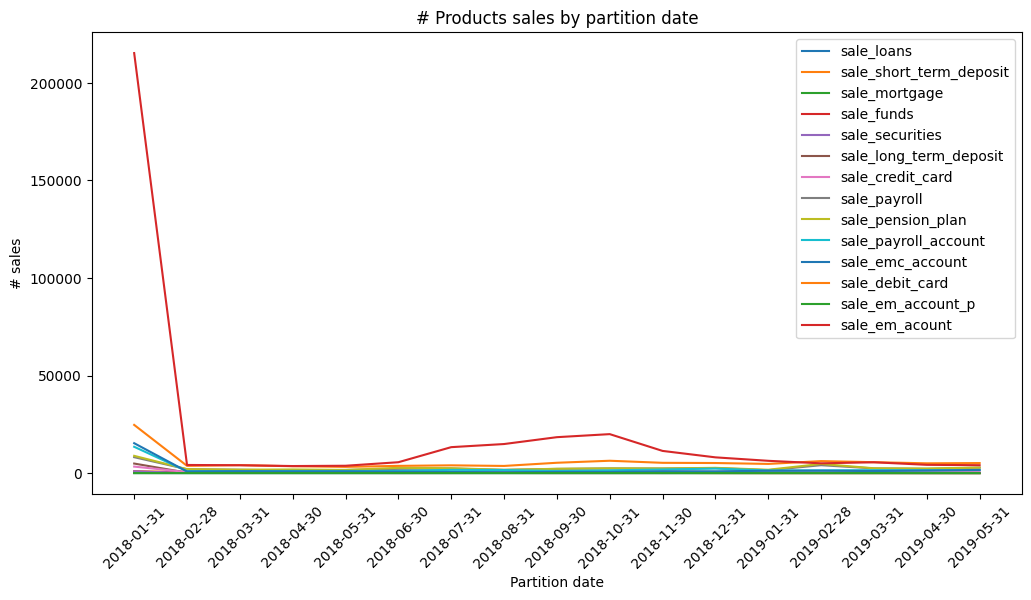

In [314]:
plot_sales_churn(sales_table,col_sales,(12,6),'Partition date','# sales',"# Products sales by partition date")

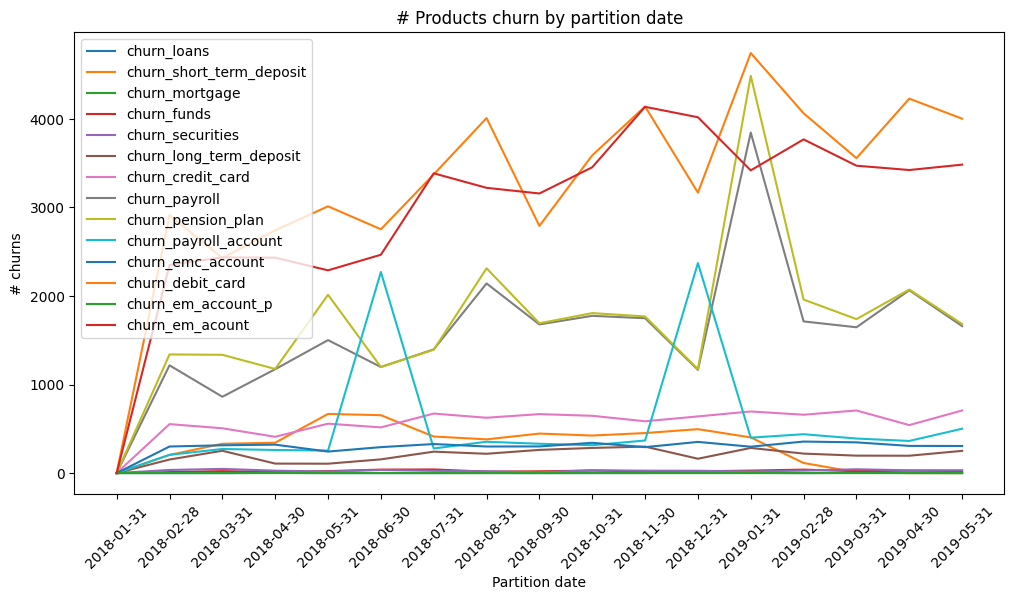

In [316]:
plot_sales_churn(churn_table,col_churn,(12,6),'Partition date','# churns',"# Products churn by partition date")

### 2.2 Plotting the sales'/churn' dataframe for the last 6 months

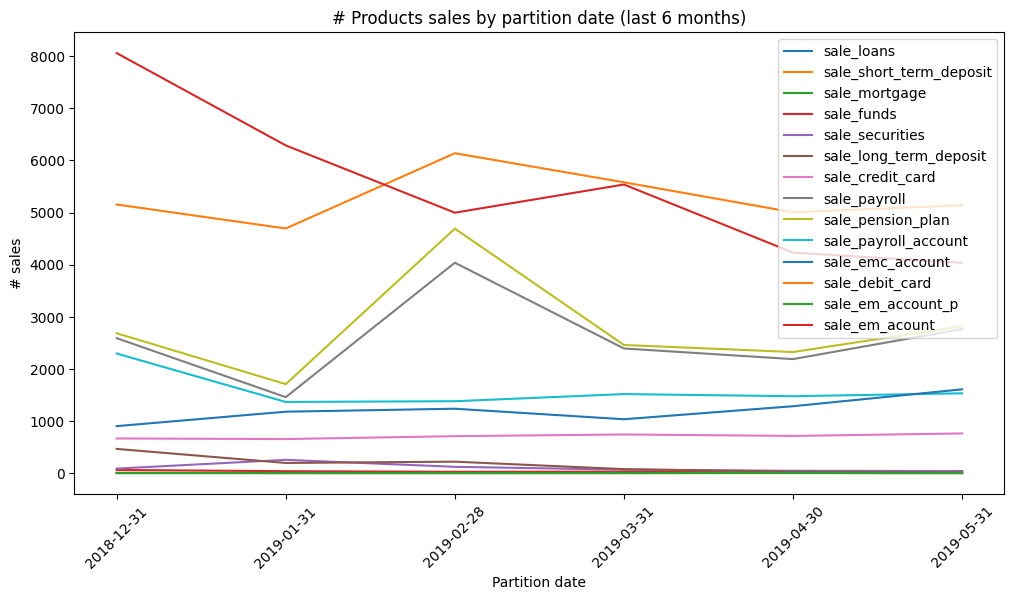

In [319]:
plot_sales_churn(sales_table[sales_table.index>="2018-12-01"],col_sales,(12,6),'Partition date','# sales',"# Products sales by partition date (last 6 months)")

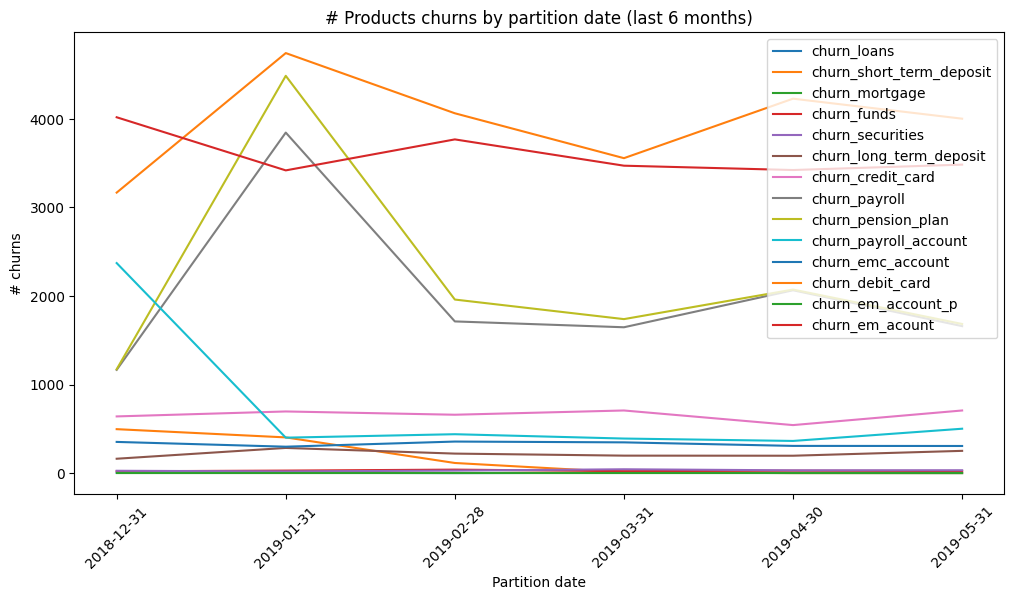

In [320]:
plot_sales_churn(churn_table[sales_table.index>="2018-12-01"],col_churn,(12,6),'Partition date','# churns',"# Products churns by partition date (last 6 months)")

### 2.2.1 Plotting the sales'/churn' for each product individually (Comparing 2018/2019)

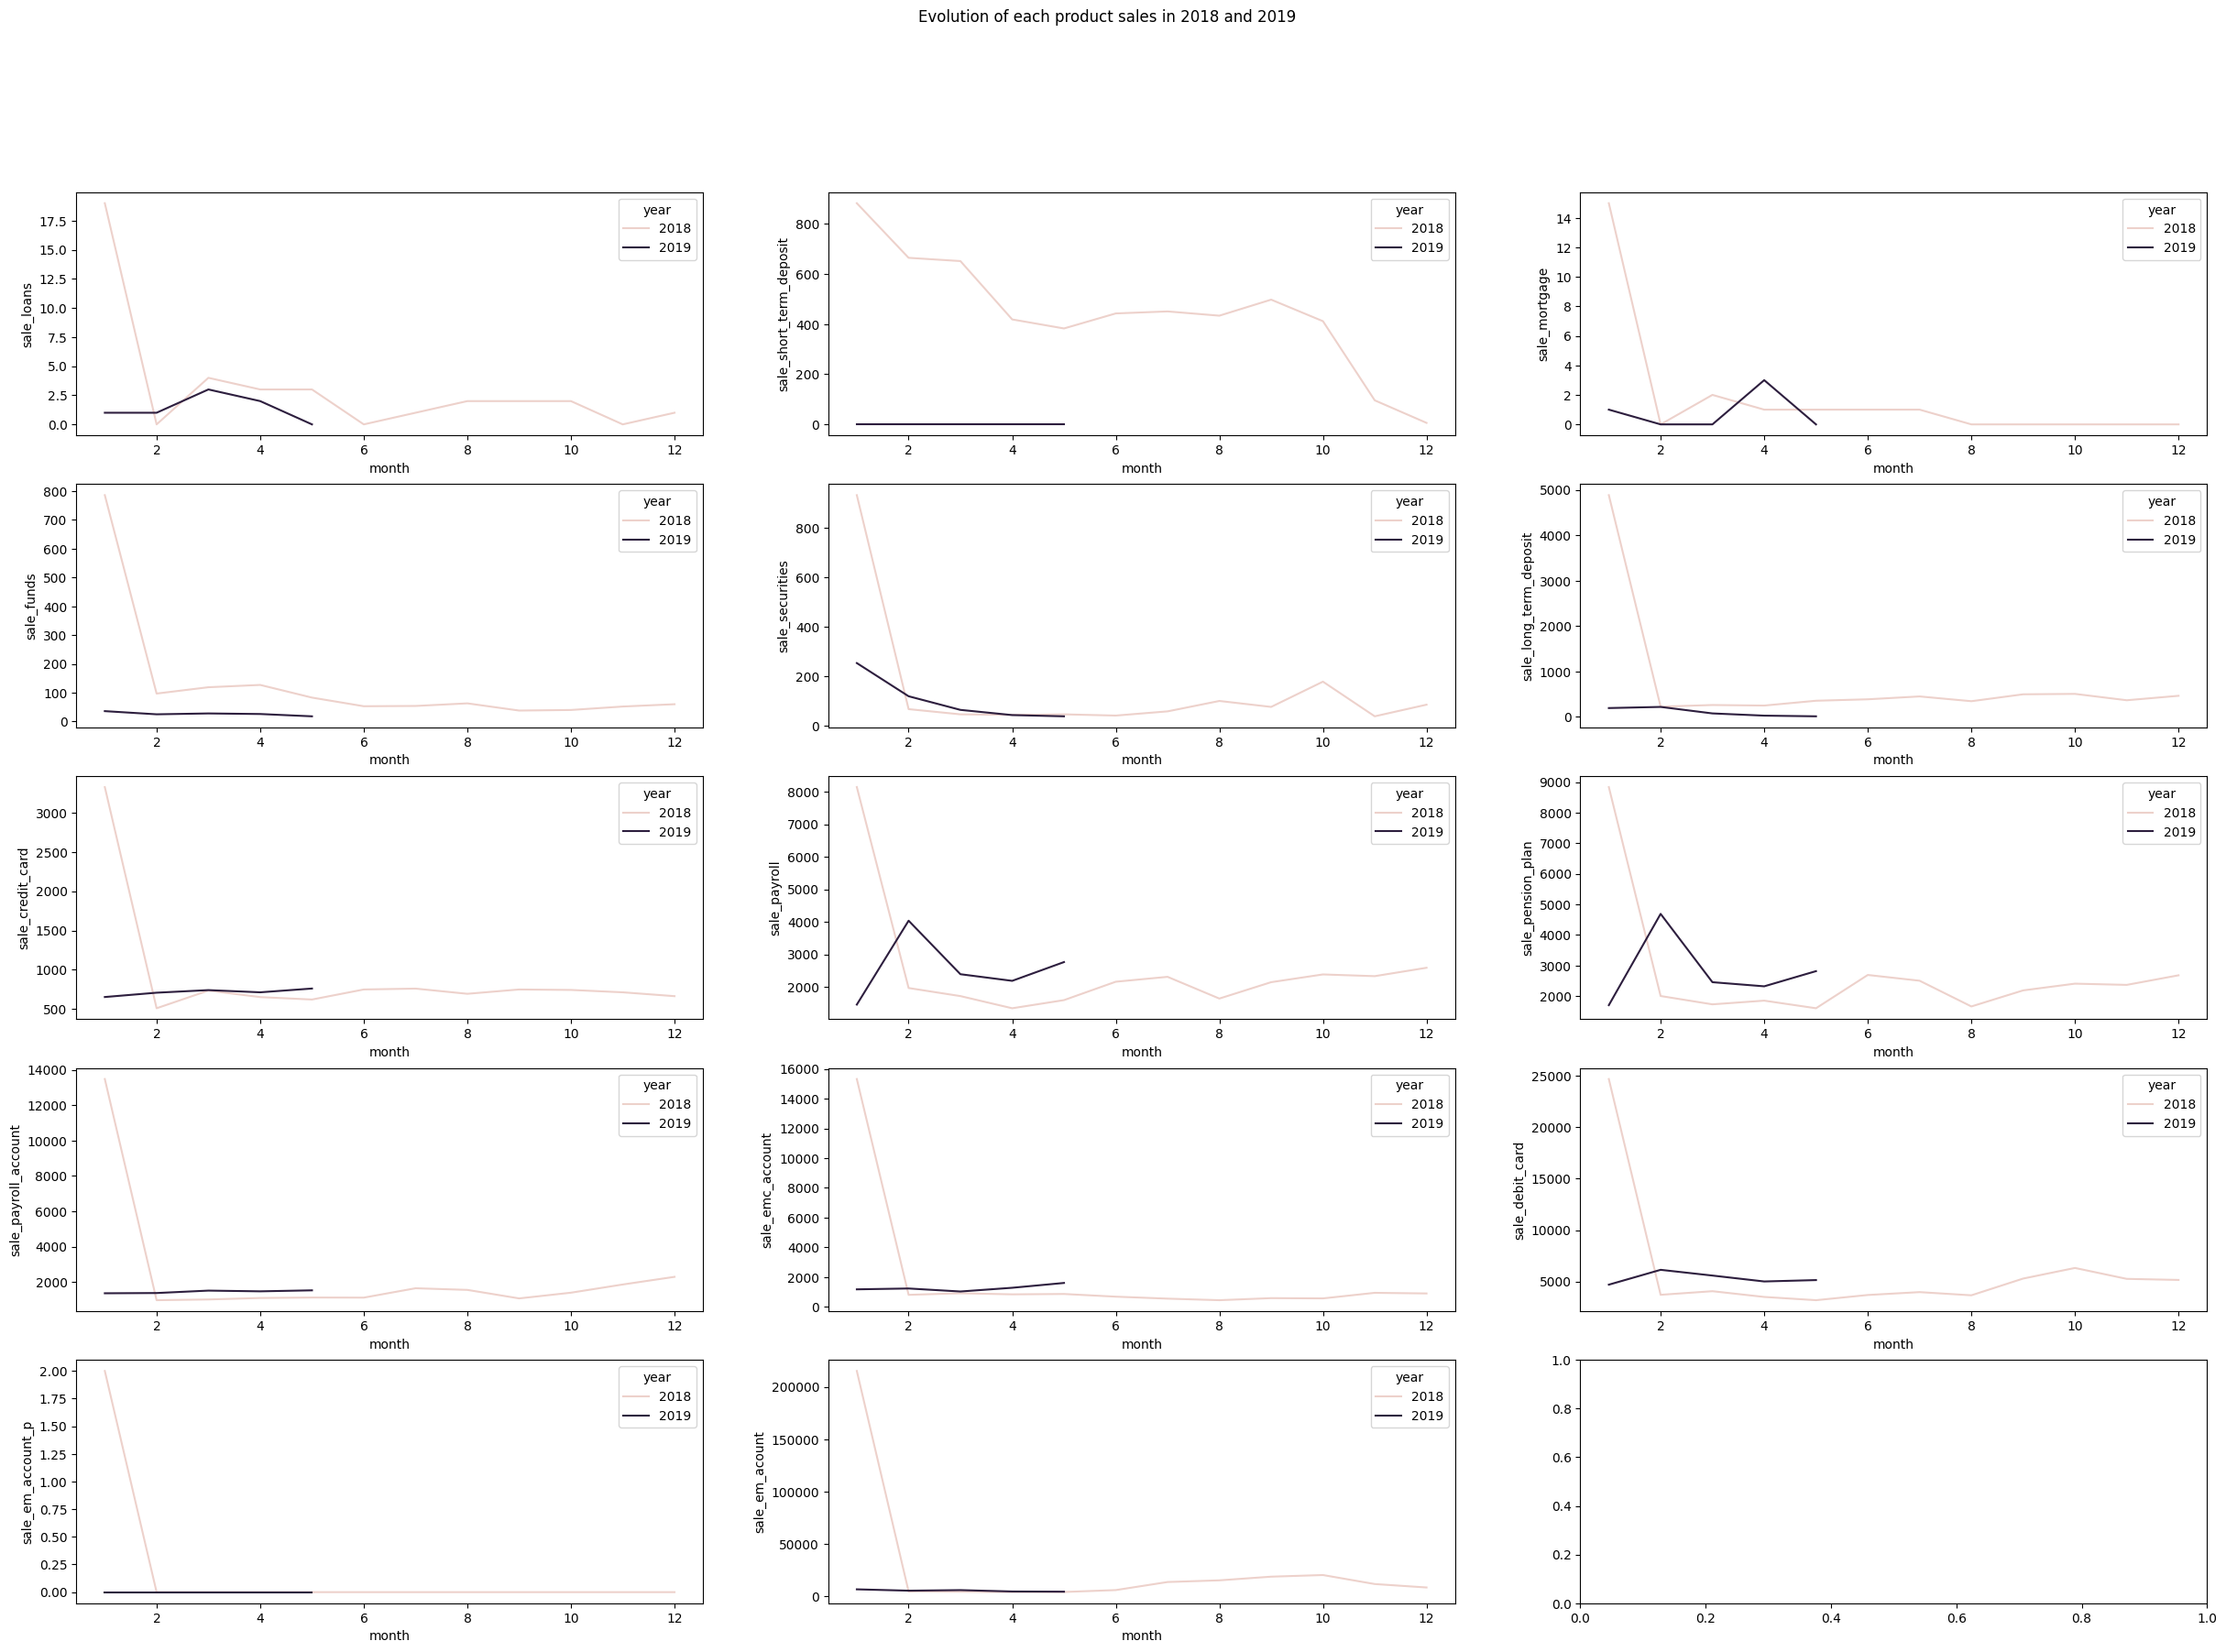

In [326]:
s=sales_table.copy()
s=s.reset_index()
s["pk_partition"]=pd.to_datetime(s["pk_partition"],format='%Y-%m-%d')
s["month"]=s["pk_partition"].dt.month
s["year"]=s["pk_partition"].dt.year

fig, axes = plt.subplots(5, 3)
fig.suptitle('Evolution of each product sales in 2018 and 2019')
fig.set_size_inches(30,20)

k=0
for dx in [0,1,2,3,4]:
        for idx, feature in enumerate(col_sales[k:3+k]):
                sns.lineplot(x = 'month', y = feature, data = s, ax = axes[dx][idx], hue="year")
        k+=3

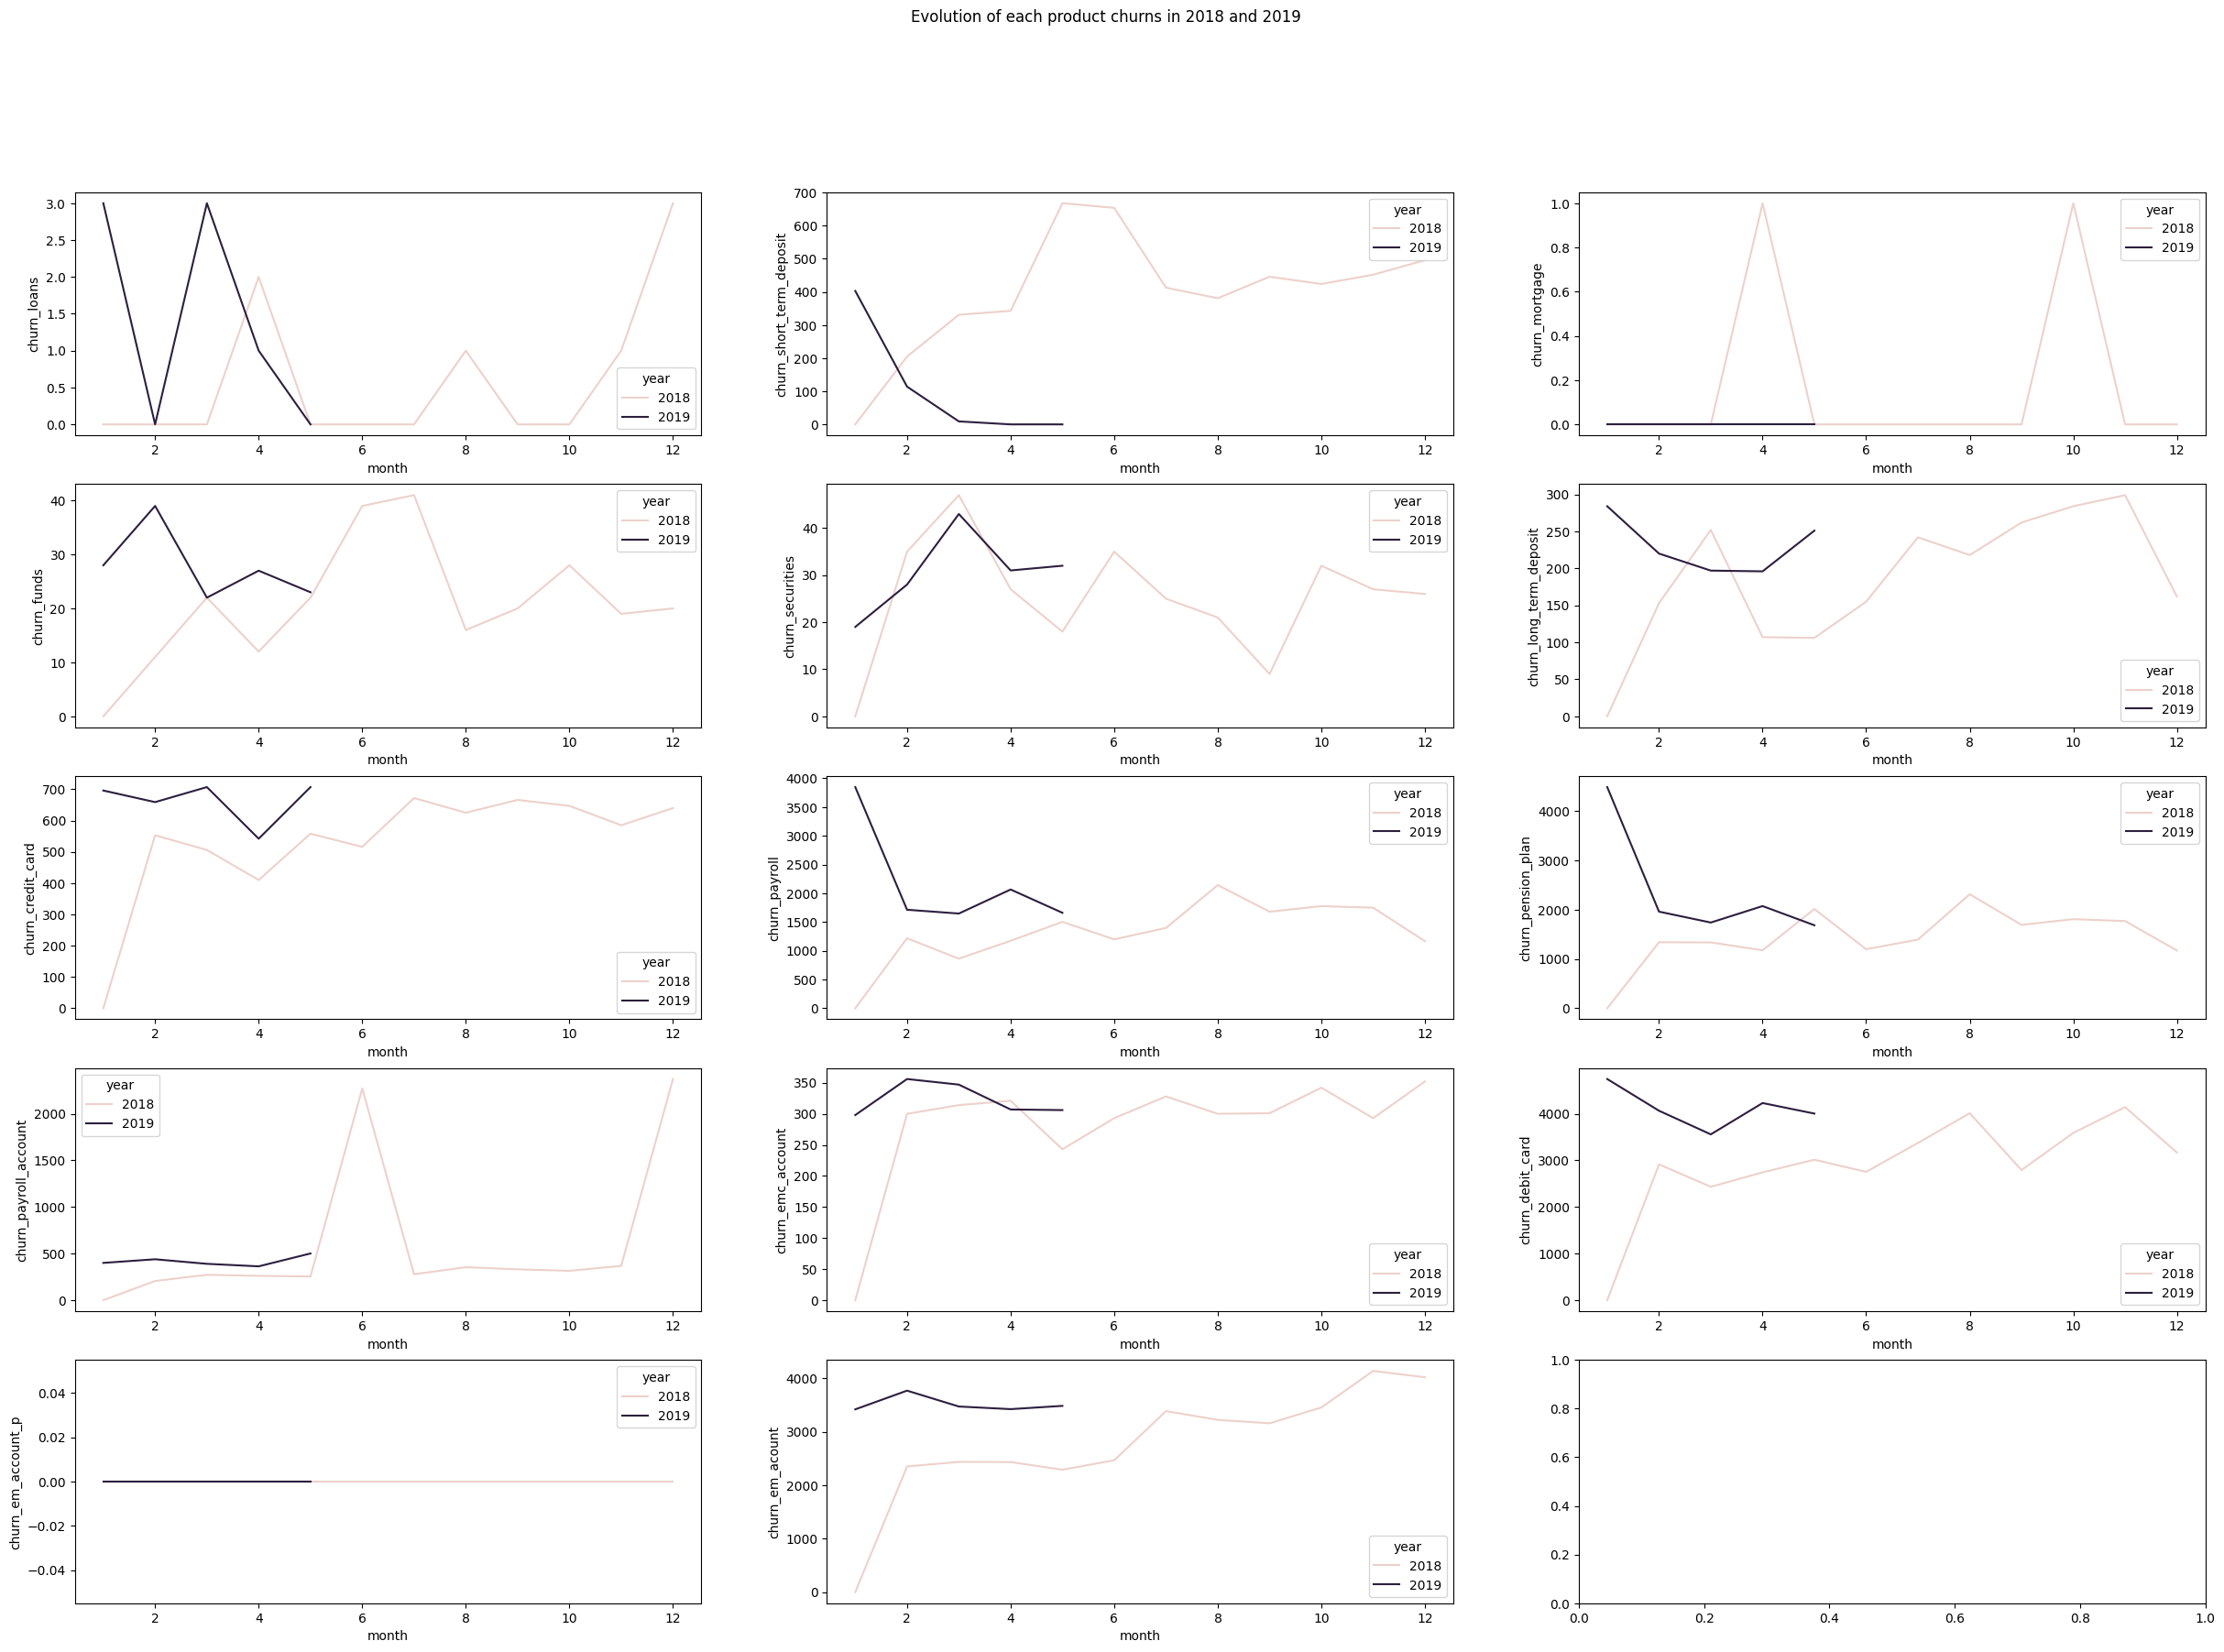

In [328]:
c=churn_table.copy()
c=c.reset_index()
c["pk_partition"]=pd.to_datetime(c["pk_partition"],format='%Y-%m-%d')
c["month"]=c["pk_partition"].dt.month
c["year"]=c["pk_partition"].dt.year

fig, axes = plt.subplots(5, 3)
fig.suptitle('Evolution of each product churns in 2018 and 2019')
fig.set_size_inches(30,20)

k=0
for dx in [0,1,2,3,4]:
        for idx, feature in enumerate(col_churn[k:3+k]):
                sns.lineplot(x = 'month', y = feature, data = c, ax = axes[dx][idx], hue="year")
        k+=3

### 2.3 Sales on the last month by customer antiquity

In [329]:
df_diff1['pk_partition'] = df_diff1['pk_partition'].astype(str).str.replace('-30', '-28').str.replace('-31', '-28')
df_diff1['pk_partition'] = pd.to_datetime(df_diff1['pk_partition'])

In [333]:
col_merge = ['pk_cid', 
 'pk_partition', 
 'sale_short_term_deposit',
 'sale_loans',
 'sale_mortgage',
 'sale_funds',
 'sale_securities',
 'sale_long_term_deposit',
 'sale_credit_card',
 'sale_payroll',
 'sale_pension_plan',
 'sale_payroll_account',
 'sale_emc_account',
 'sale_debit_card',
 'sale_em_account_p',
 'sale_em_acount',
 'churn_loans',
 'churn_short_term_deposit',
 'churn_mortgage',
 'churn_funds',
 'churn_securities',
 'churn_long_term_deposit',
 'churn_credit_card',
 'churn_payroll',
 'churn_pension_plan',
 'churn_payroll_account',
 'churn_emc_account',
 'churn_debit_card',
 'churn_em_account_p',
 'churn_em_acount']

#### 2.3.1 Now we can merge the full_comercial_df, the diff table and the client (antiquity, total_products and entry_counting).

In [334]:
sales_included_df = full_commercial_df.merge(df_diff1[col_merge], on=['pk_cid', 'pk_partition'])
sales_included_df = sales_included_df.merge(client_df[["pk_cid","antiquity","total_products","entry_counting"]], on=['pk_cid'])

Let's create a table with the products sold in last month for old customers.

In [340]:
temp_=sales_included_df[(sales_included_df["pk_partition"]>=pd.to_datetime("2019-05-01",format='%Y-%m-%d')) & (sales_included_df["new_customer"]==0)]
plot_old_customers_df=pd.DataFrame(temp_[col_sales].sum())
plot_old_customers_df=plot_old_customers_df.rename(columns={0:"sales_old"})

Let's create a table with the products sold in last month for new customers and merge with the old customers table.

In [341]:
temp_=sales_included_df[(sales_included_df["pk_partition"]>=pd.to_datetime("2019-05-01",format='%Y-%m-%d')) & (sales_included_df["new_customer"]==1)]
plot_customers_sales_df=pd.DataFrame(temp_[col_sales].sum())
plot_customers_sales_df=plot_customers_sales_df.rename(columns={0:"sales_new"})
plot_customers_sales_df = plot_customers_sales_df.merge(plot_old_customers_df, left_index=True, right_index=True)
plot_customers_sales_df.T

sale_loans  sale_short_term_deposit  sale_mortgage  sale_funds  \
sales_new           0                        0              0          16   
sales_old           0                        0              0           2   

           sale_securities  sale_long_term_deposit  sale_credit_card  \
sales_new               26                       3               173   
sales_old               13                       9               588   

           sale_payroll  sale_pension_plan  sale_payroll_account  \
sales_new          1155               1191                   851   
sales_old          1609               1628                   680   

           sale_emc_account  sale_debit_card  sale_em_account_p  \
sales_new              1255             2381                  0   
sales_old               352             2759                  0   

           sale_em_acount  
sales_new            3136  
sales_old             899

In [342]:
plot_customers_sales_df["total"]=plot_customers_sales_df[["sales_new","sales_old"]].sum(axis=1)
plot_customers_sales_df["perc_sales_new"]=round(plot_customers_sales_df["sales_new"]/plot_customers_sales_df["total"]*100,2)
plot_customers_sales_df["perc_sales_old"]=round(plot_customers_sales_df["sales_old"]/plot_customers_sales_df["total"]*100,2)
plot_customers_sales_df[["perc_sales_new","perc_sales_old"]].fillna(0).T

sale_loans  sale_short_term_deposit  sale_mortgage  \
perc_sales_new         0.0                      0.0            0.0   
perc_sales_old         0.0                      0.0            0.0   

                sale_funds  sale_securities  sale_long_term_deposit  \
perc_sales_new       88.89            66.67                    25.0   
perc_sales_old       11.11            33.33                    75.0   

                sale_credit_card  sale_payroll  sale_pension_plan  \
perc_sales_new             22.73         41.79              42.25   
perc_sales_old             77.27         58.21              57.75   

                sale_payroll_account  sale_emc_account  sale_debit_card  \
perc_sales_new                 55.58              78.1            46.32   
perc_sales_old                 44.42              21.9            53.68   

                sale_em_account_p  sale_em_acount  
perc_sales_new                0.0           77.72  
perc_sales_old                0.0           22.28

Let's create a table with the products churn in last month for old customers.

In [345]:
temp_=sales_included_df[(sales_included_df["pk_partition"]>=pd.to_datetime("2019-05-01",format='%Y-%m-%d')) & (sales_included_df["new_customer"]==0)]
plot_old_customers_df=pd.DataFrame(temp_[col_churn].sum())
plot_old_customers_df=plot_old_customers_df.rename(columns={0:"churn_old"})

Let's create a table with the products churn in last month for new customers and merge with the old customers table.

In [346]:
temp_=sales_included_df[(sales_included_df["pk_partition"]>=pd.to_datetime("2019-05-01",format='%Y-%m-%d')) & (sales_included_df["new_customer"]==1)]
plot_customers_churn_df=pd.DataFrame(temp_[col_churn].sum())
plot_customers_churn_df=plot_customers_churn_df.rename(columns={0:"churn_new"})
plot_customers_churn_df = plot_customers_churn_df.merge(plot_old_customers_df, left_index=True, right_index=True)
plot_customers_churn_df.T

churn_loans  churn_short_term_deposit  churn_mortgage  churn_funds  \
churn_new            0                         0               0            5   
churn_old            0                         0               0           18   

           churn_securities  churn_long_term_deposit  churn_credit_card  \
churn_new                16                       65                107   
churn_old                16                      186                600   

           churn_payroll  churn_pension_plan  churn_payroll_account  \
churn_new            565                 582                    155   
churn_old           1095                1102                    346   

           churn_emc_account  churn_debit_card  churn_em_account_p  \
churn_new                115              1264                   0   
churn_old                191              2739                   0   

           churn_em_acount  
churn_new             1892  
churn_old             1592

In [347]:
plot_customers_churn_df["total"]=plot_customers_churn_df[["churn_new","churn_old"]].sum(axis=1)
plot_customers_churn_df["perc_churn_new"]=round(plot_customers_churn_df["churn_new"]/plot_customers_churn_df["total"]*100,2)
plot_customers_churn_df["perc_churn_old"]=round(plot_customers_churn_df["churn_old"]/plot_customers_churn_df["total"]*100,2)
plot_customers_churn_df[["perc_churn_new","perc_churn_old"]].fillna(0).T

churn_loans  churn_short_term_deposit  churn_mortgage  \
perc_churn_new          0.0                       0.0             0.0   
perc_churn_old          0.0                       0.0             0.0   

                churn_funds  churn_securities  churn_long_term_deposit  \
perc_churn_new        21.74              50.0                     25.9   
perc_churn_old        78.26              50.0                     74.1   

                churn_credit_card  churn_payroll  churn_pension_plan  \
perc_churn_new              15.13          34.04               34.56   
perc_churn_old              84.87          65.96               65.44   

                churn_payroll_account  churn_emc_account  churn_debit_card  \
perc_churn_new                  30.94              37.58             31.58   
perc_churn_old                  69.06              62.42             68.42   

                churn_em_account_p  churn_em_acount  
perc_churn_new                 0.0            54.31  
perc_churn_old                 0.0            45.69

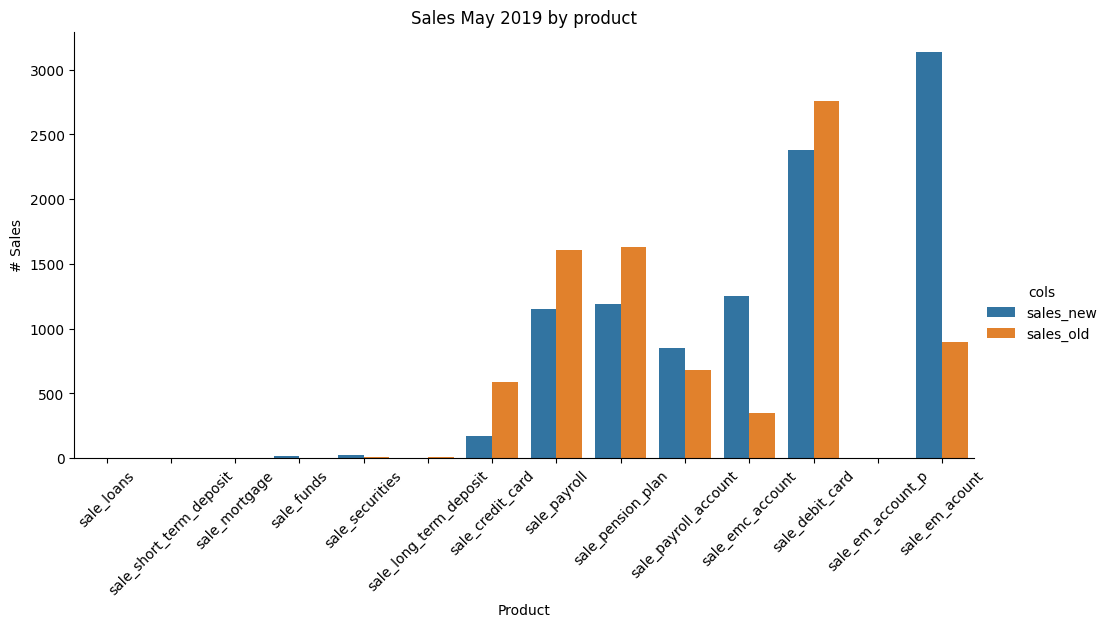

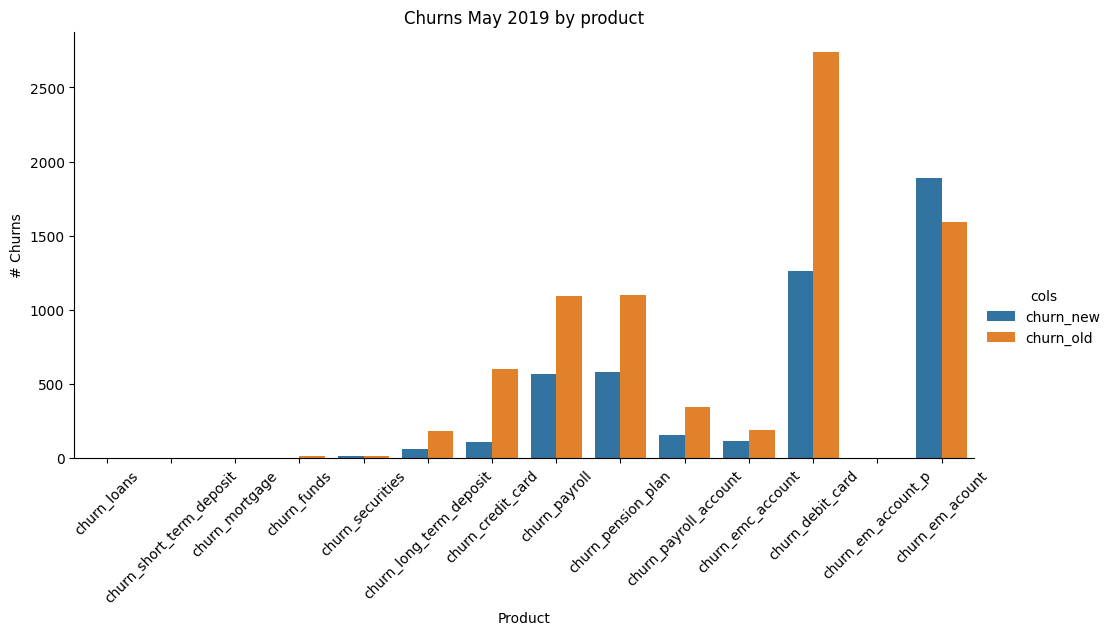

In [356]:
df = plot_customers_sales_df[["sales_new","sales_old"]].reset_index().melt('index', var_name='cols',  value_name='vals')
sns.catplot(x="index", y="vals", hue='cols', data=df, kind='bar', height=5, aspect=10/5)
plt.xlabel('Product')
plt.ylabel('# Sales')
plt.xticks(rotation=45)
plt.title("Sales May 2019 by product")
plt.show()

df = plot_customers_churn_df[["churn_new","churn_old"]].reset_index().melt('index', var_name='cols',  value_name='vals')
sns.catplot(x="index", y="vals", hue='cols', data=df, kind='bar', height=5, aspect=10/5)
plt.xlabel('Product')
plt.ylabel('# Churns')
plt.xticks(rotation=45)
plt.title("Churns May 2019 by product")
plt.show()


In [357]:
print(f'In total, the new customers bought {plot_customers_sales_df.sum().loc["sales_new"]} in May 2019 (last month)')
print(f'In total, the old customers bought {plot_customers_sales_df.sum().loc["sales_old"]} in May 2019 (last month)')

In total, the new customers bought 10187.0 in May 2019 (last month)
In total, the old customers bought 8539.0 in May 2019 (last month)


In [358]:
print(f'In total, the new customers churned {plot_customers_churn_df.sum().loc["churn_new"]} in May 2019 (last month)')
print(f'In total, the old customers churned {plot_customers_churn_df.sum().loc["churn_old"]} in May 2019 (last month)')

In total, the new customers churned 4766.0 in May 2019 (last month)
In total, the old customers churned 7885.0 in May 2019 (last month)


__________________
# E. PRE-ANALYSIS OF CLUSTERS
__________________

## 1. Antiquity

In [359]:
print(f"Max antiquity: {client_df['antiquity'].max()} days.")
print(f"Min antiquity: {client_df['antiquity'].min()} days.")
print(f"Med antiquity: {client_df['antiquity'].median()} days.")

Max antiquity: 1608 days.
Min antiquity: -3 days.
Med antiquity: 662.0 days.


In [360]:
print(f"# old clients: {client_df[client_df['new_customer']==0].shape[0]}")
print(f"# new clients: {client_df[client_df['new_customer']==1].shape[0]}")

# old clients: 301301
# new clients: 155072


### 1.1 Number of customers that buy each product by antiquity

Let's have a look on the number of products ingestion depending on the antiquity of clients (new/old).

Below the plots for the product we've seen to have a significant diference between old/new customers.

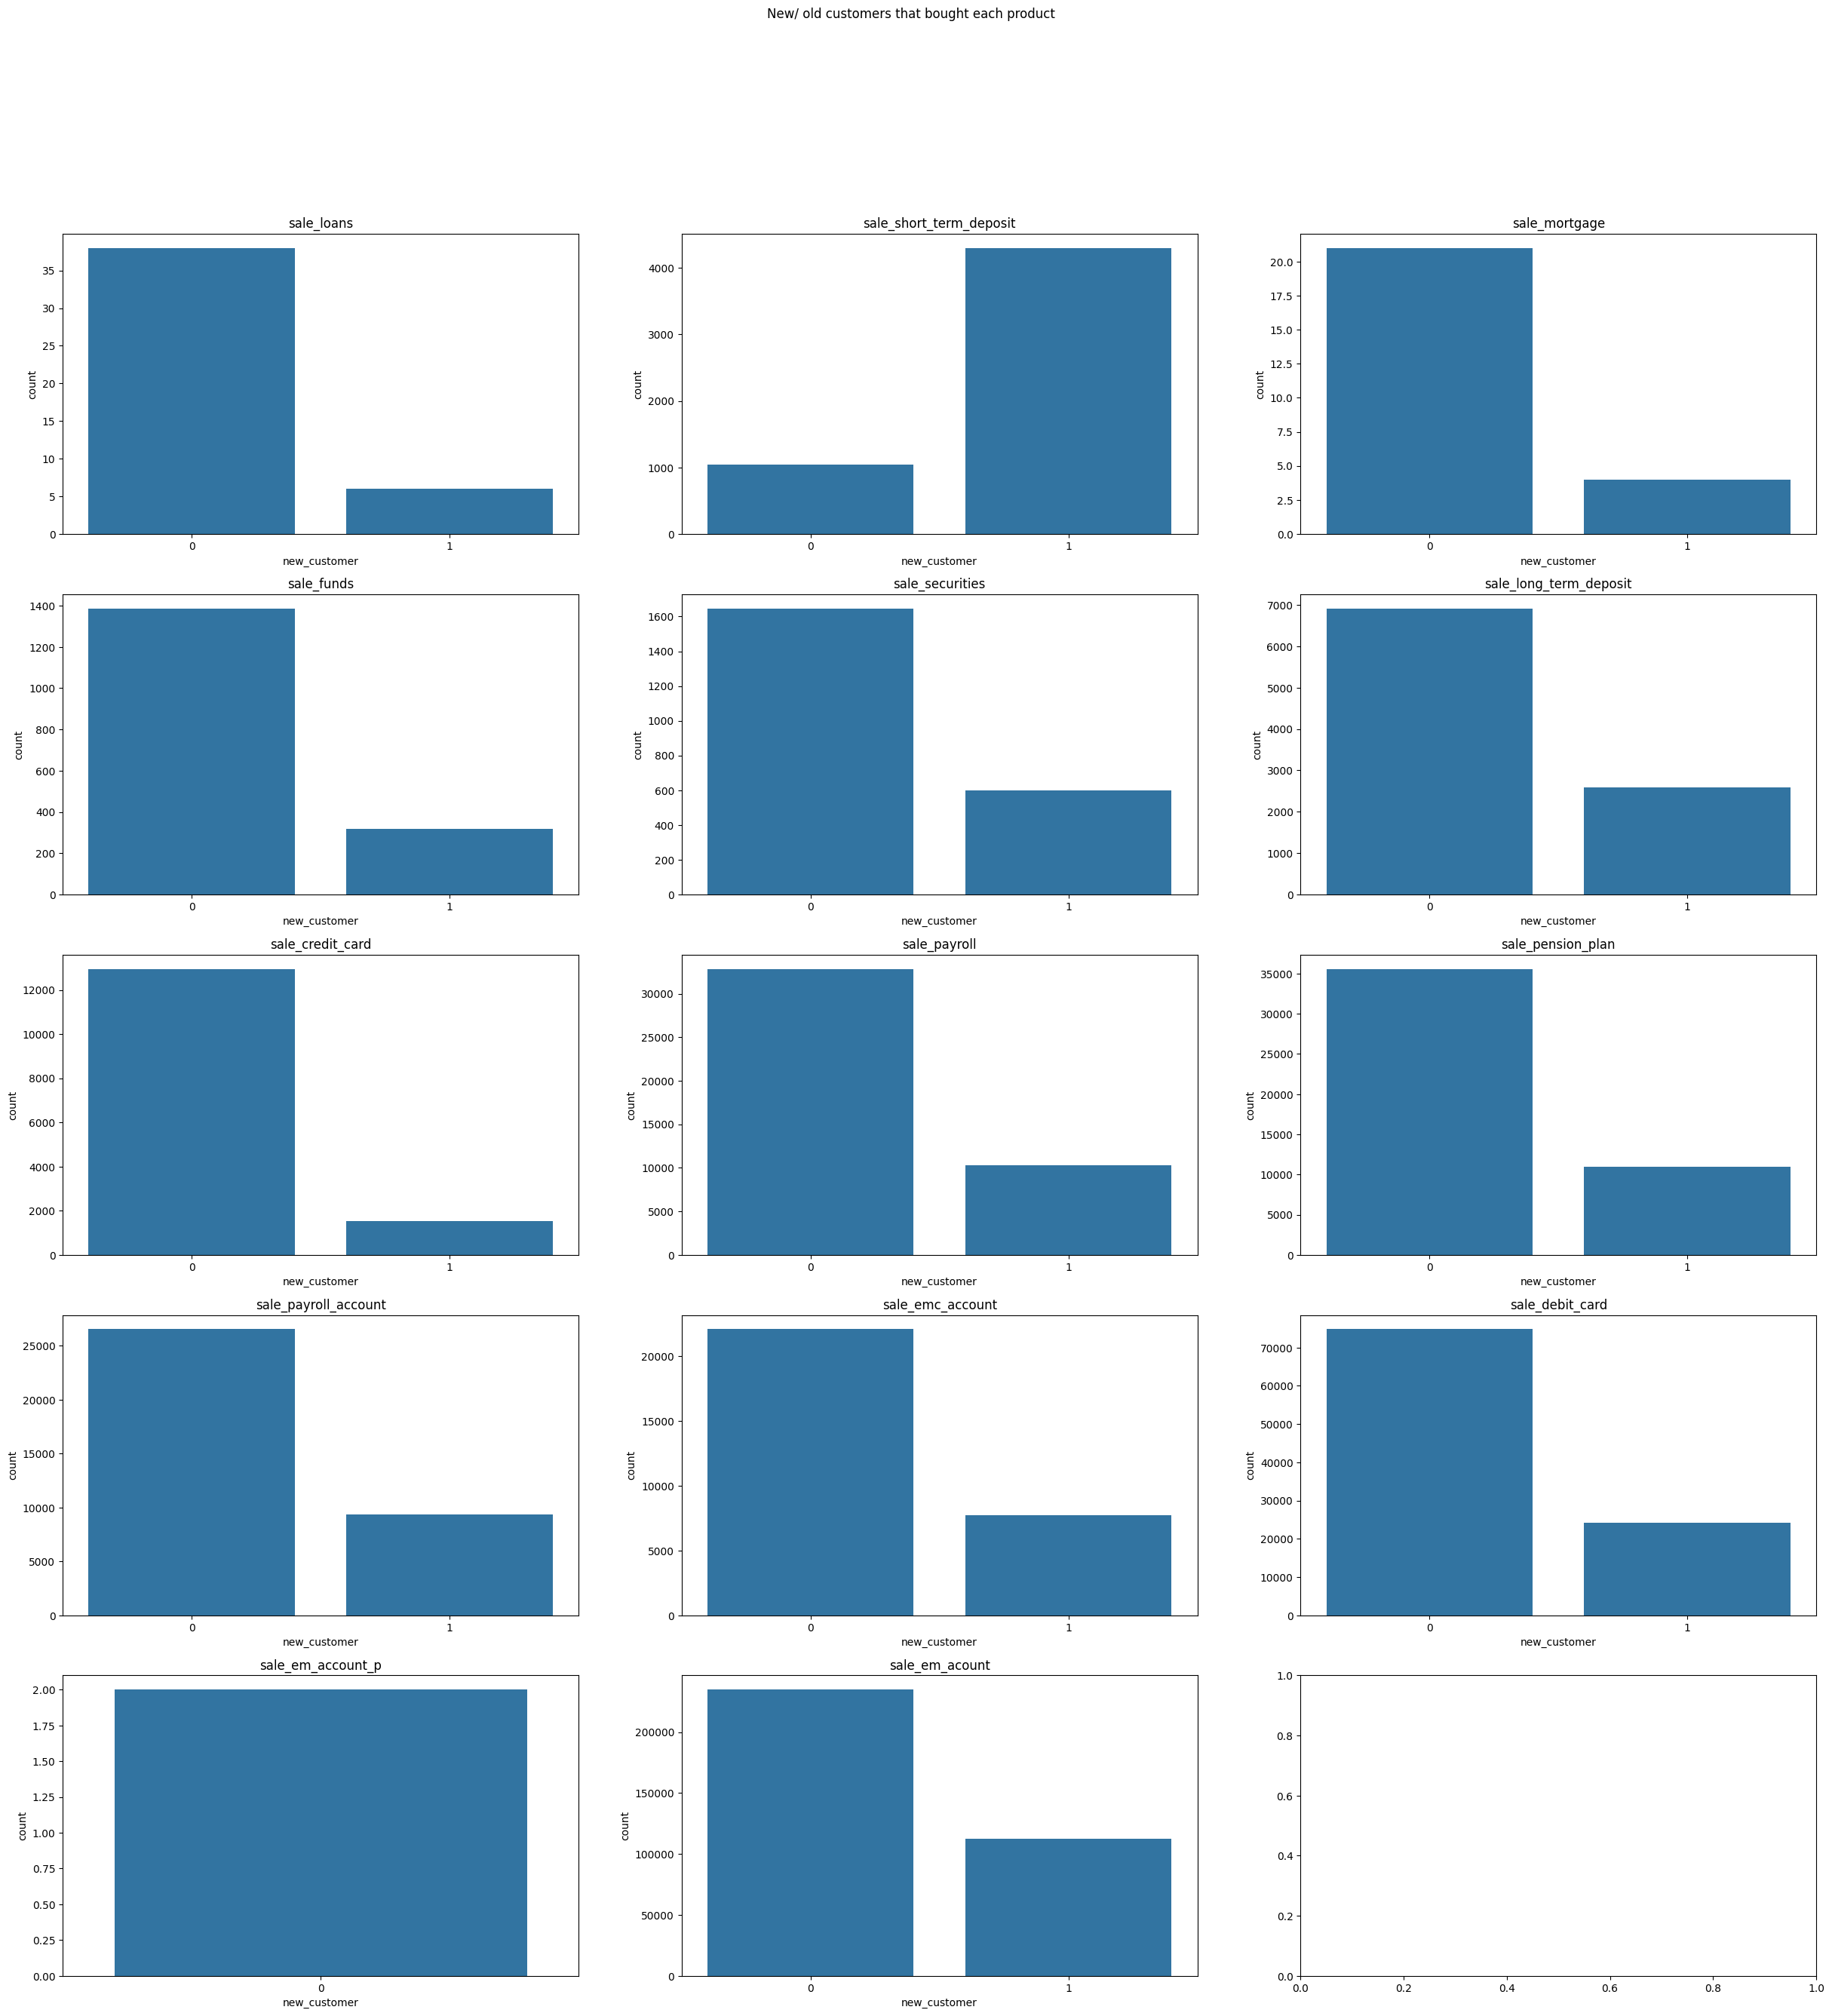

In [361]:
def show_frequency_plots(df,col_plt):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle('New/ old customers that bought each product')
    fig.set_size_inches(30,30)

    k=0
    for dx in [0,1,2,3,4]:
        for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="new_customer", ax=axes[dx][idx]).set_title(feature)
        k+=3
           
show_frequency_plots(sales_included_df,col_sales)

## 2. Segment

First let's encode the segment from 0 to 3:
* **0**: Unkwnown;
* **1**: Top;
* **2**: Particulares;
* **3**: Universitarios.

In [362]:
conditions = [
    (sales_included_df['segment'] == "UNKNOWN"),
    (sales_included_df['segment'] == "01 - TOP"),
    (sales_included_df['segment'] == "02 - PARTICULARES"),
    (sales_included_df['segment'] == "03 - UNIVERSITARIO")
    ]

sales_included_df['segment_'] = np.select(conditions, [0,1,2,3])

In [363]:
conditions = [
    (client_df['segment'] == "UNKNOWN"),
    (client_df['segment'] == "01 - TOP"),
    (client_df['segment'] == "02 - PARTICULARES"),
    (client_df['segment'] == "03 - UNIVERSITARIO")
    ]

client_df['segment_'] = np.select(conditions, [0,1,2,3])

In [364]:
print(f"Percentage of Unknown: {round(client_df['segment_'].value_counts(normalize=True).loc[0]*100,3)}")
print(f"Percentage of Top: {round(client_df['segment_'].value_counts(normalize=True).loc[1]*100,3)}")
print(f"Percentage of Particulares: {round(client_df['segment_'].value_counts(normalize=True).loc[2]*100,3)}")
print(f"Percentage of Universitarios: {round(client_df['segment_'].value_counts(normalize=True).loc[3]*100,3)}")

Percentage of Unknown: 1.917
Percentage of Top: 2.235
Percentage of Particulares: 34.054
Percentage of Universitarios: 61.794


### 2.1 Number of customers that buy each product by segment

Below the plots for the product we've seen to have a significant diference between all the customers' segments.

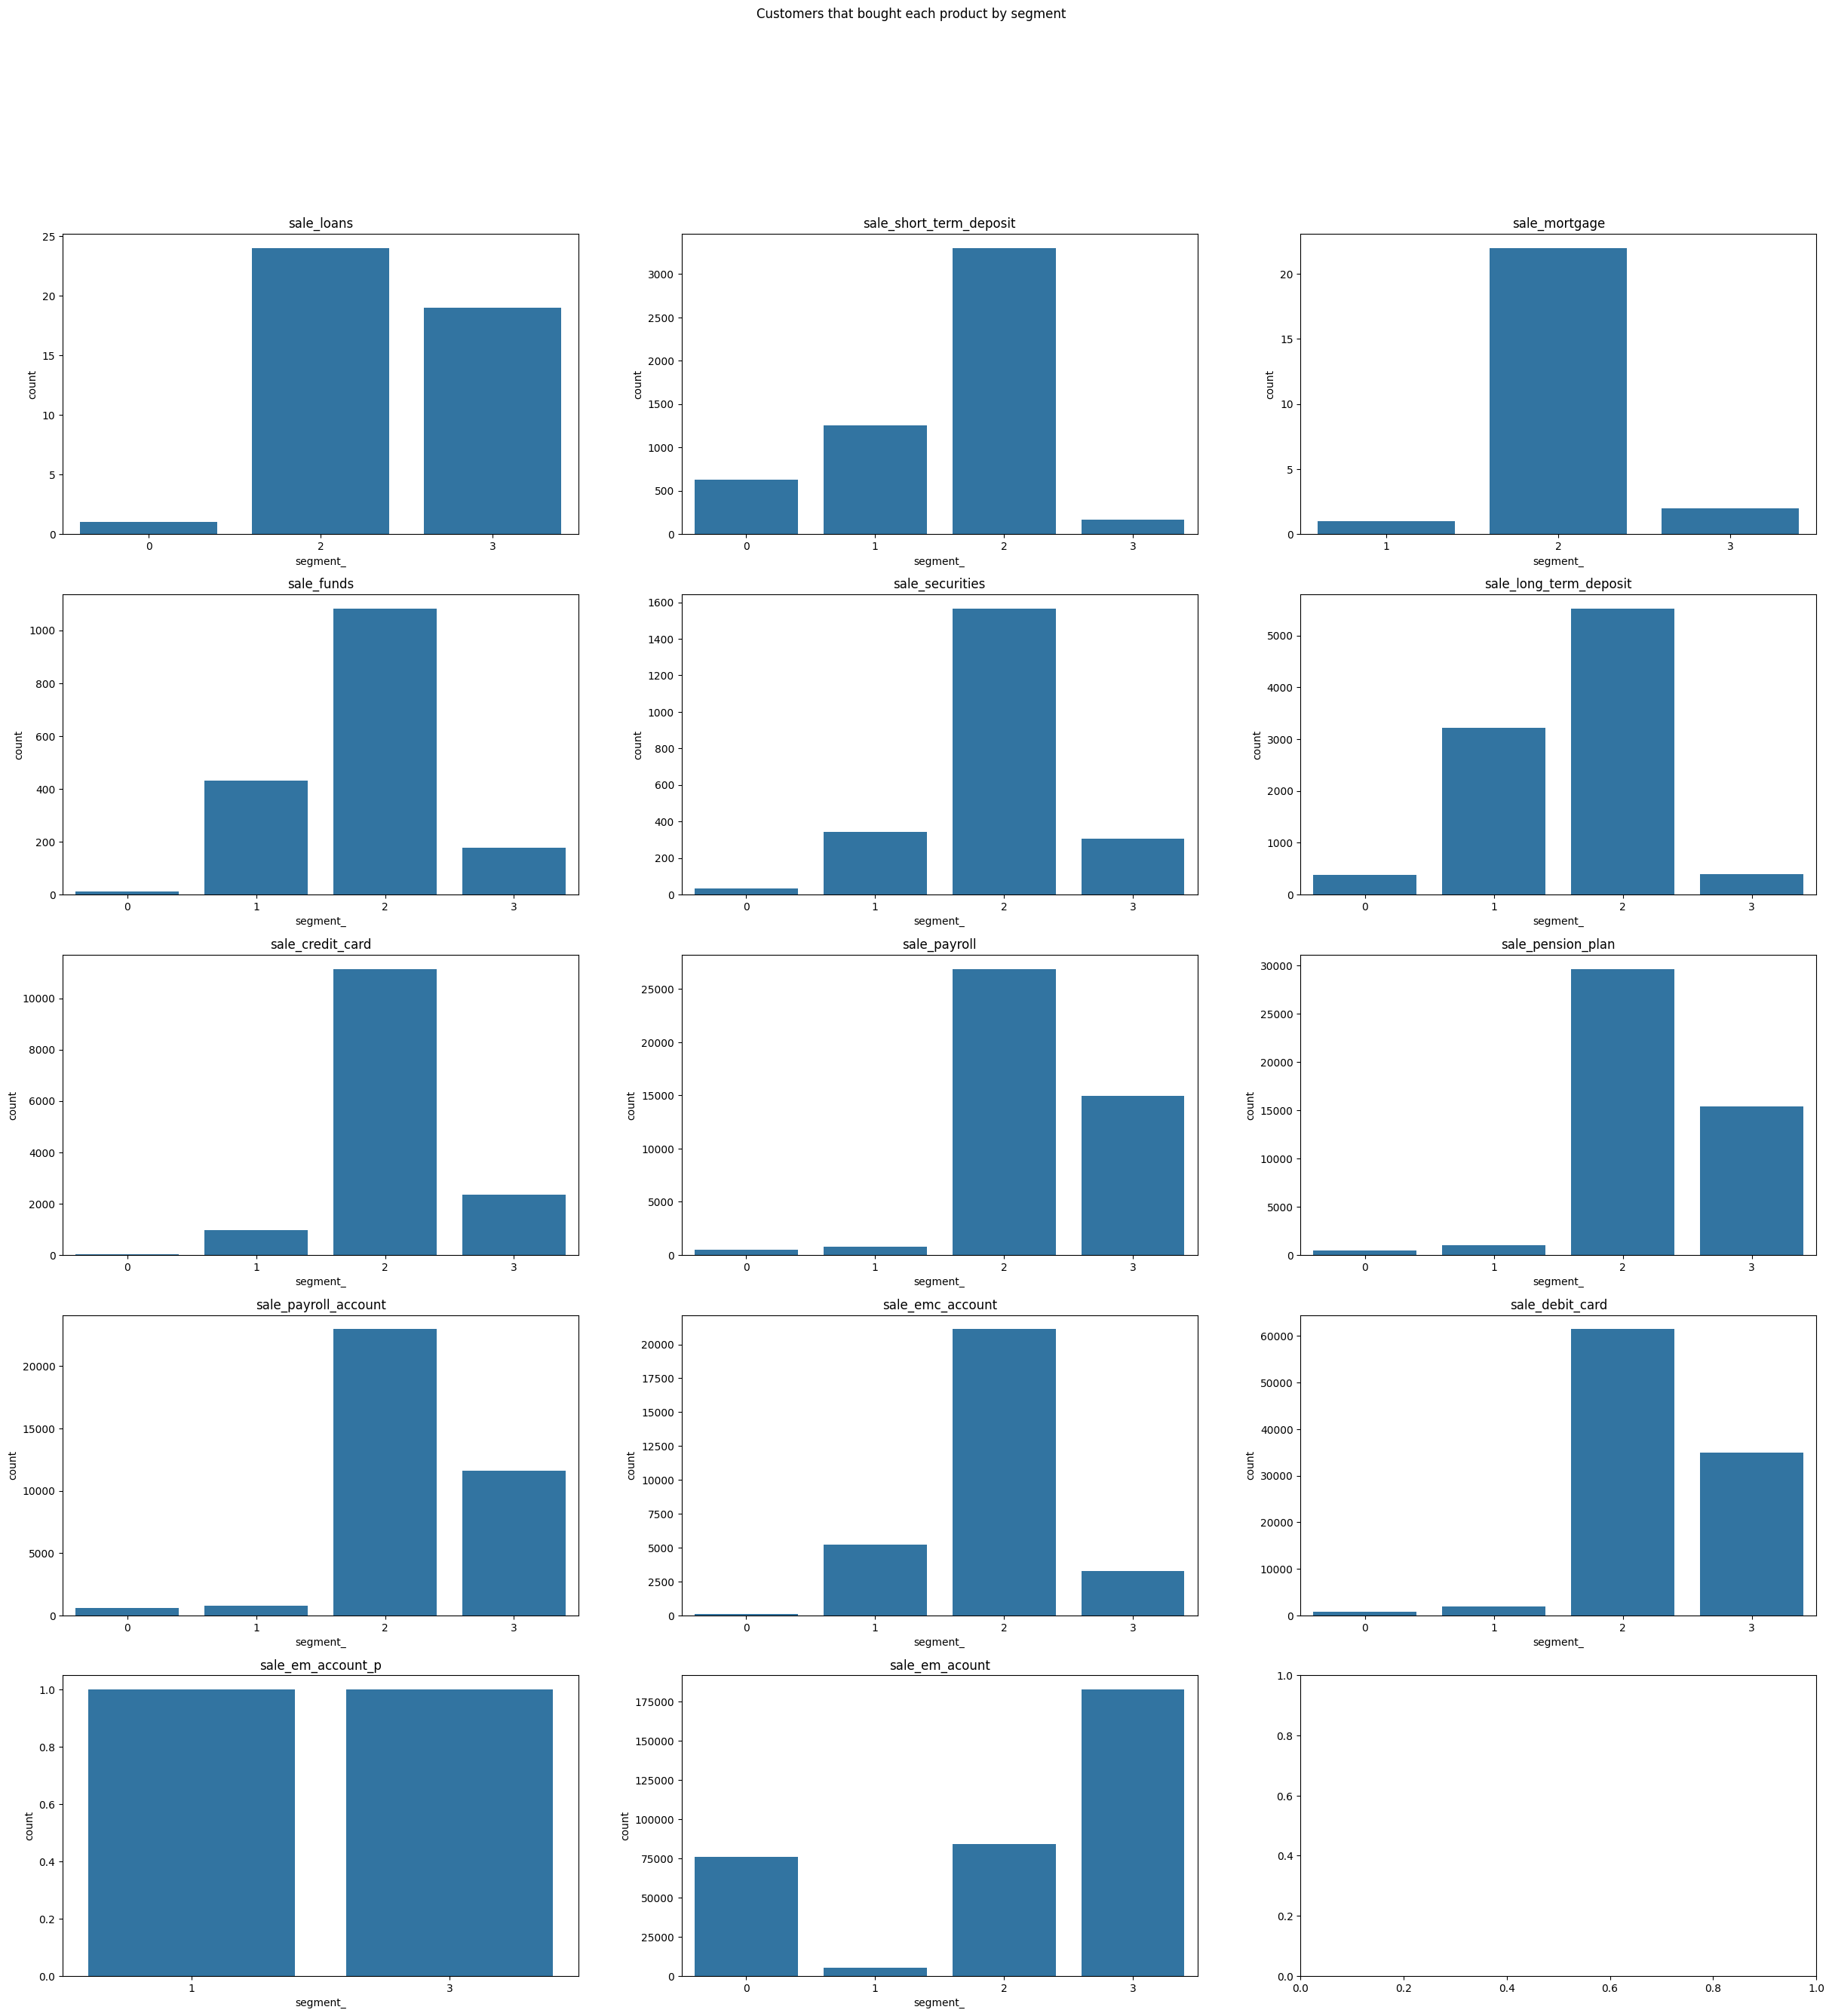

In [365]:
def show_frequency_plots(df,col_plt):
       
    fig, axes = plt.subplots(5, 3)
    fig.suptitle('Customers that bought each product by segment')
    fig.set_size_inches(30,30)

    k=0
    for dx in [0,1,2,3,4]:
        for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="segment_", ax=axes[dx][idx]).set_title(feature)
        k+=3
            
show_frequency_plots(sales_included_df,col_sales)

### 2.2 Number of particulares' customers that buy each product by age group

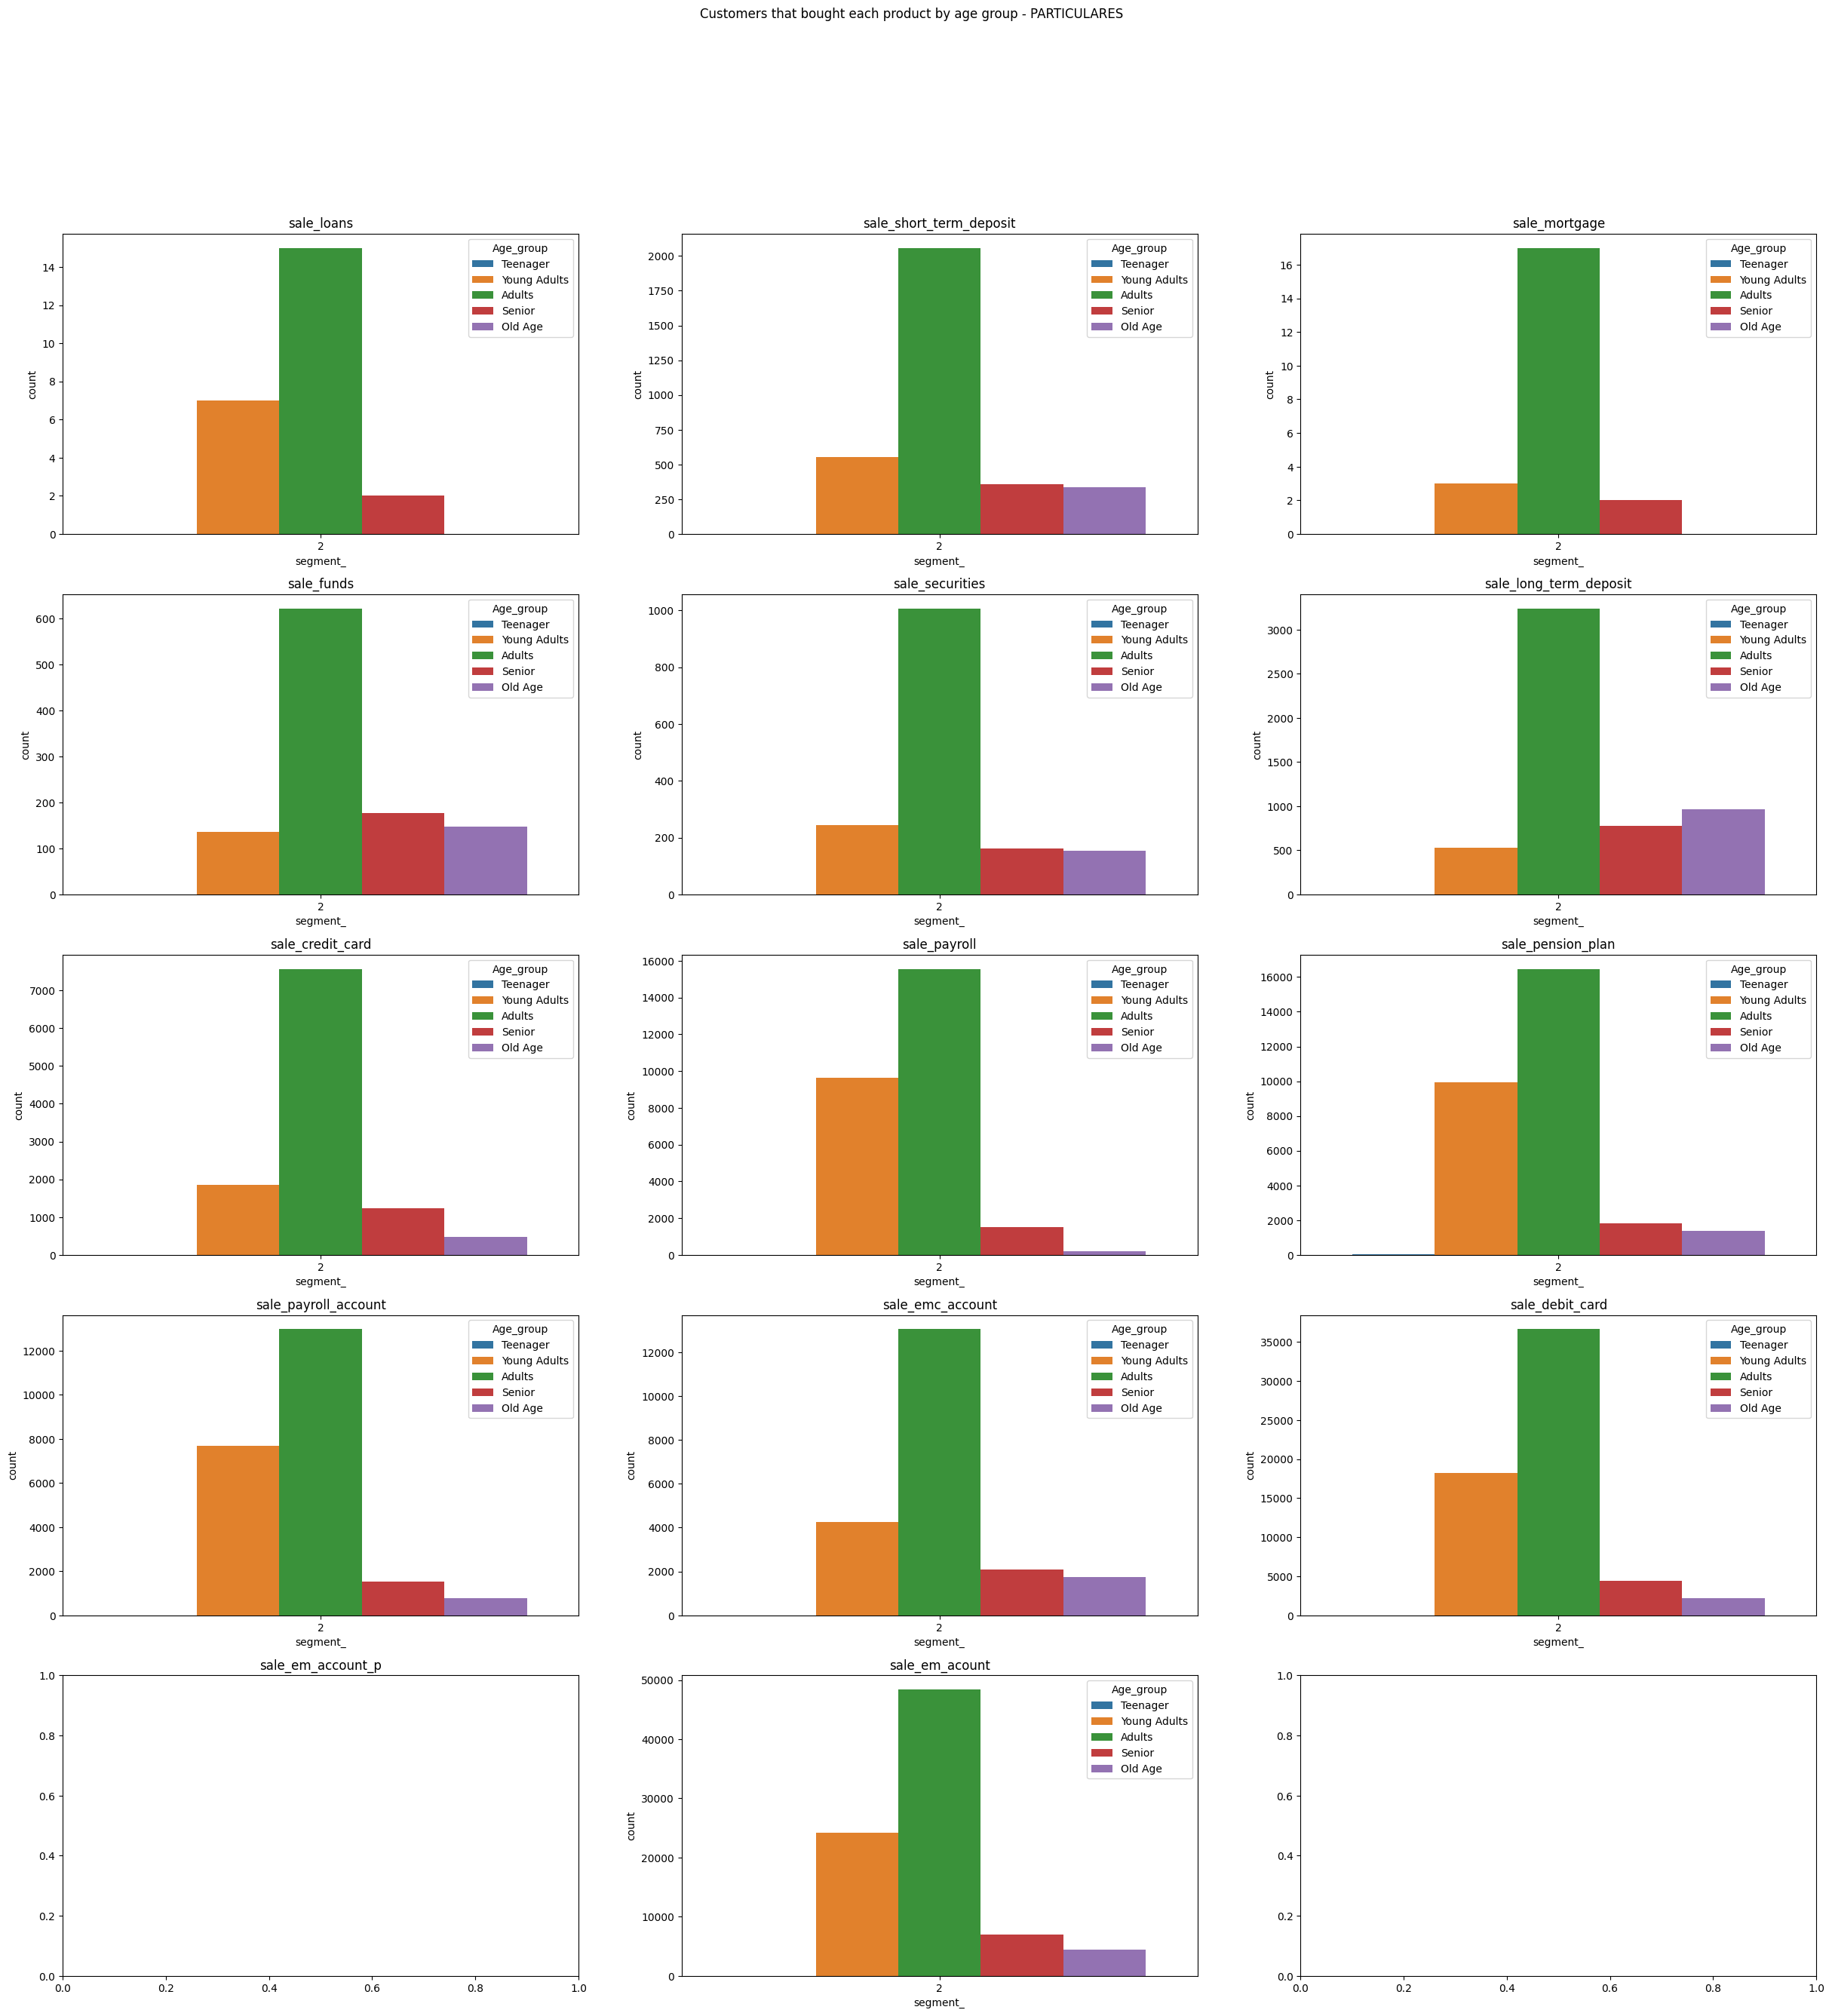

In [366]:
def show_frequency_plots(df,col_plt):

        fig, axes = plt.subplots(5, 3)
        fig.suptitle('Customers that bought each product by age group - PARTICULARES')
        fig.set_size_inches(30,30)

        k=0
        for dx in [0,1,2,3,4]:
            for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="segment_", ax=axes[dx][idx], hue="Age_group").set_title(feature)
            k+=3
           
show_frequency_plots(sales_included_df[sales_included_df["segment_"]==2],col_sales)

From the plots above one can see that the group age Adults has a strong relation with the segment Particulares.

### 2.3 Number of universitarios' customers that buy each product by age group

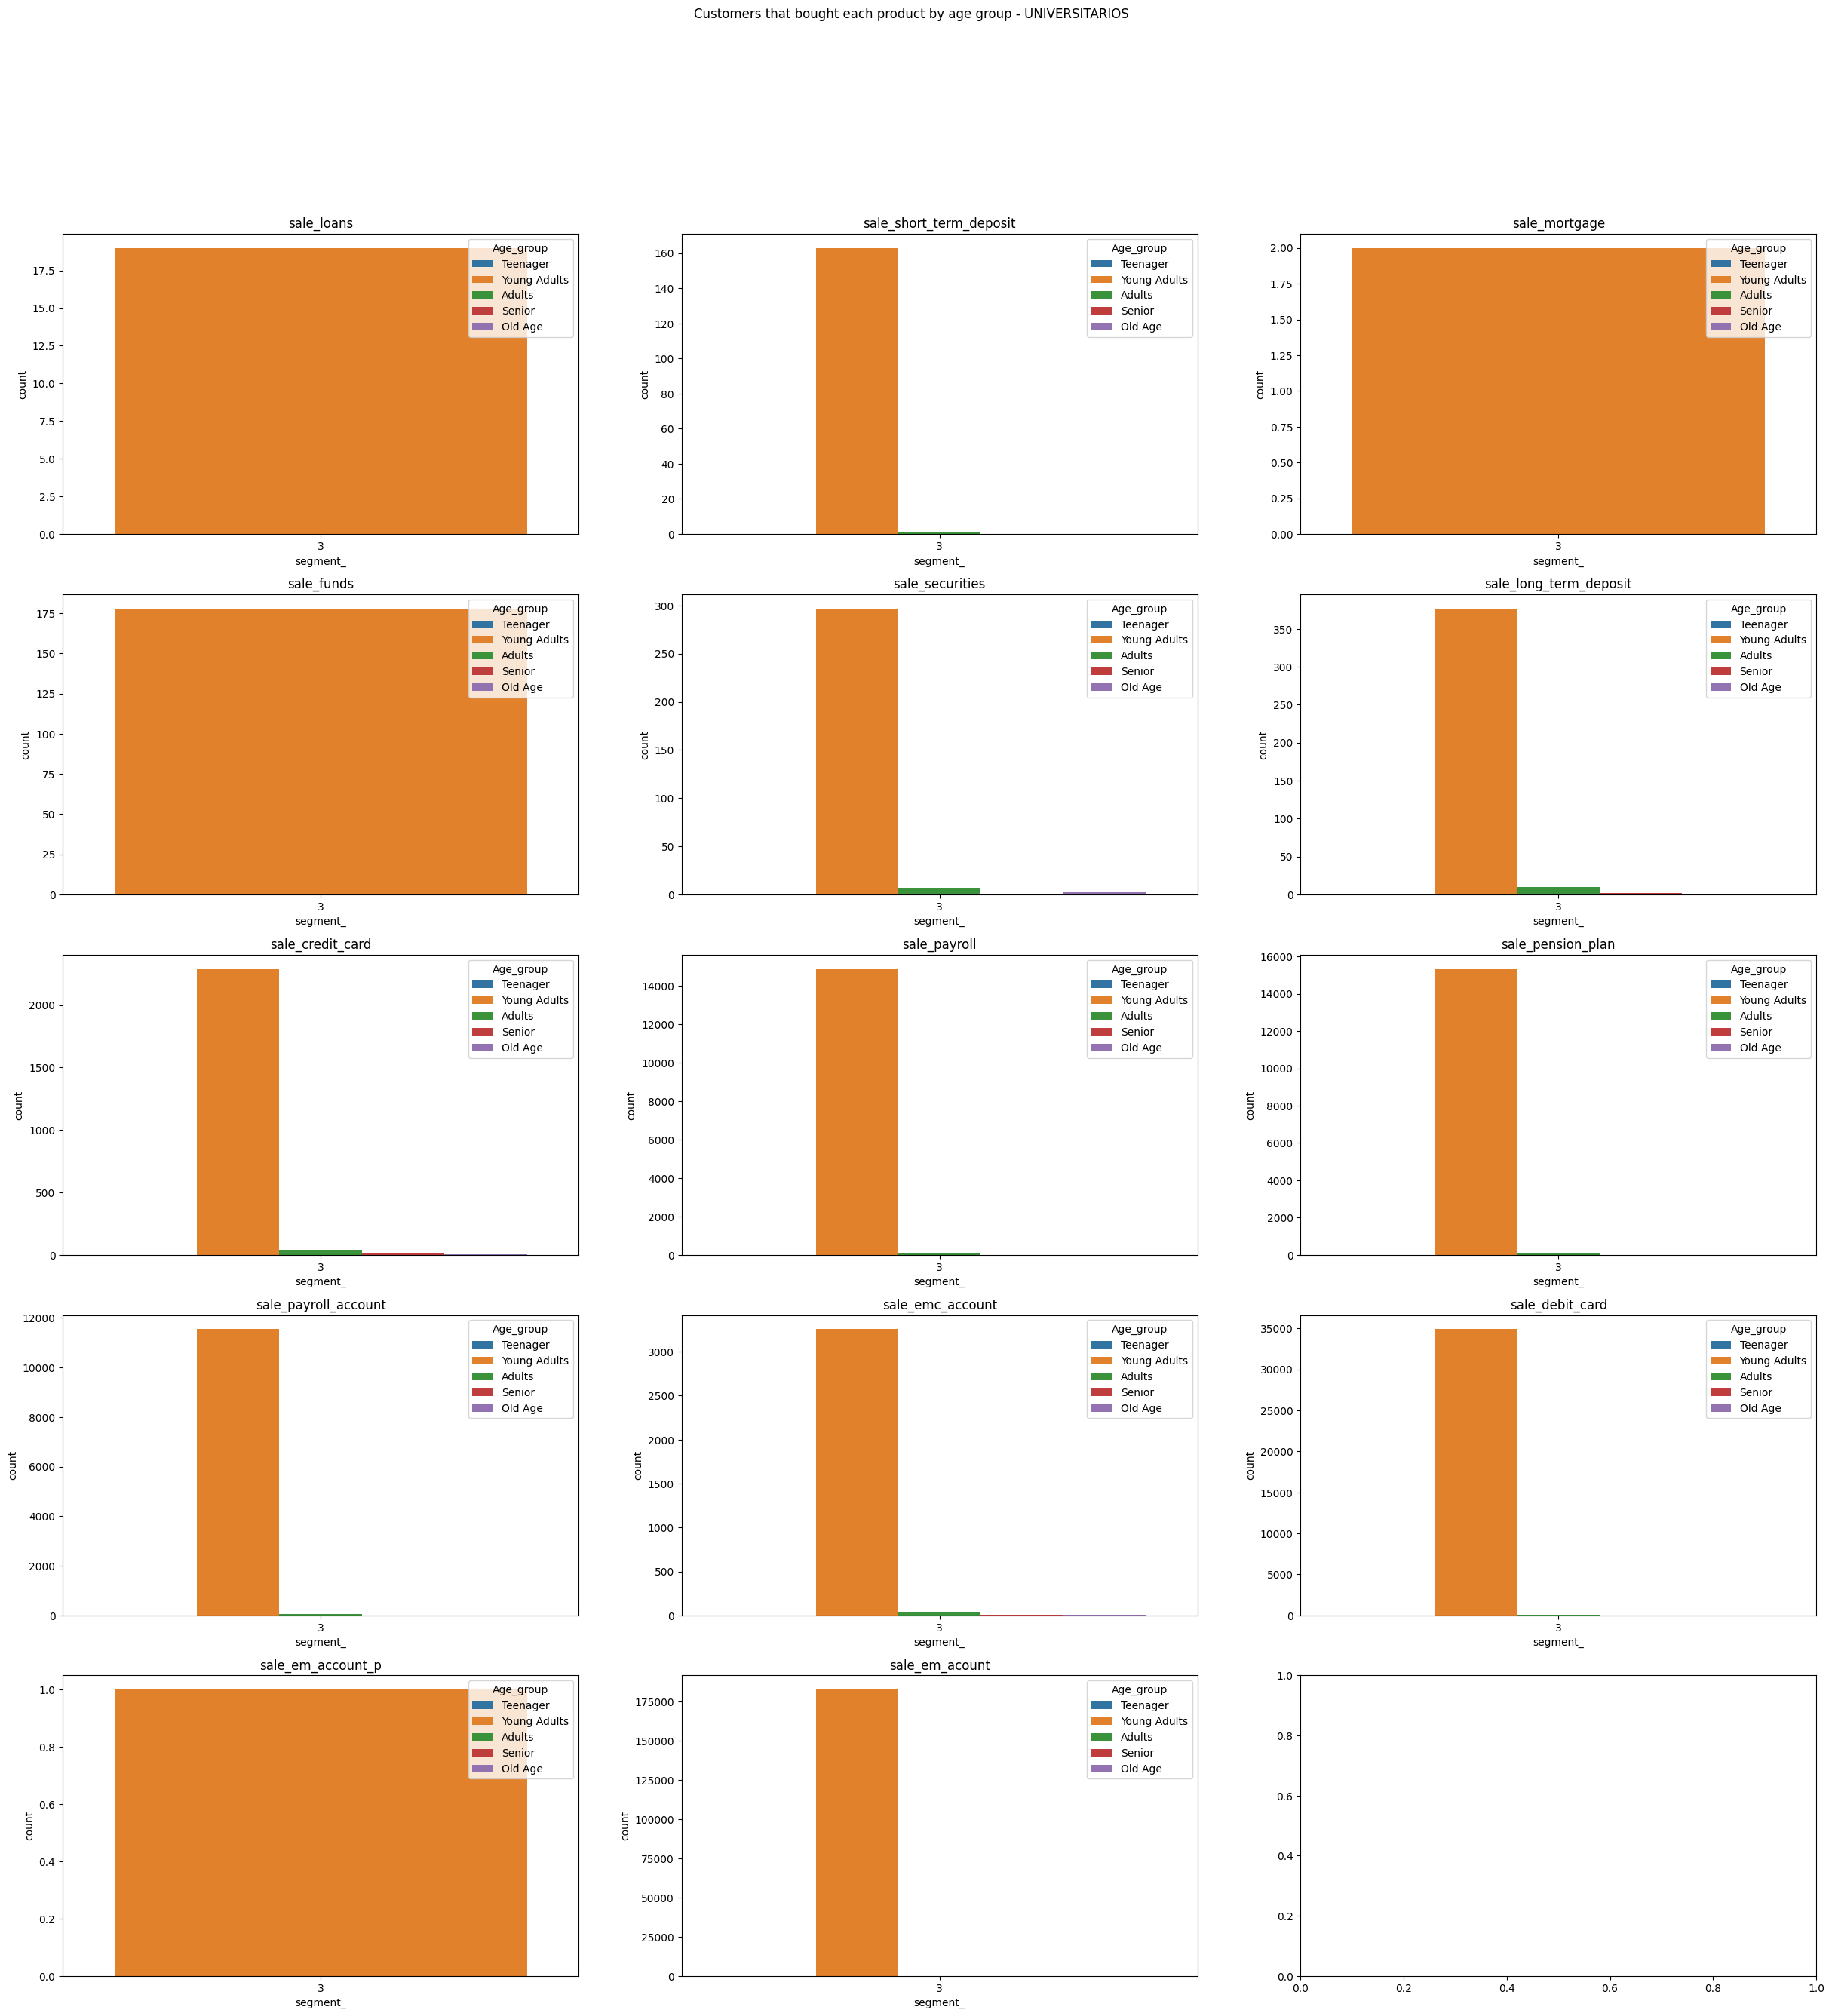

In [367]:
def show_frequency_plots(df,col_plt):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle('Customers that bought each product by age group - UNIVERSITARIOS')
    fig.set_size_inches(30,30)

    k=0
    for dx in [0,1,2,3,4]:
            for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="segment_", ax=axes[dx][idx], hue="Age_group").set_title(feature)
            k+=3
            
show_frequency_plots(sales_included_df[sales_included_df["segment_"]==3],col_sales)

From the plots above one can see that the group age Young Adults has a strong relation with the segment Universitarios.

### 2.4 Number of top' customers that buy each product by age group

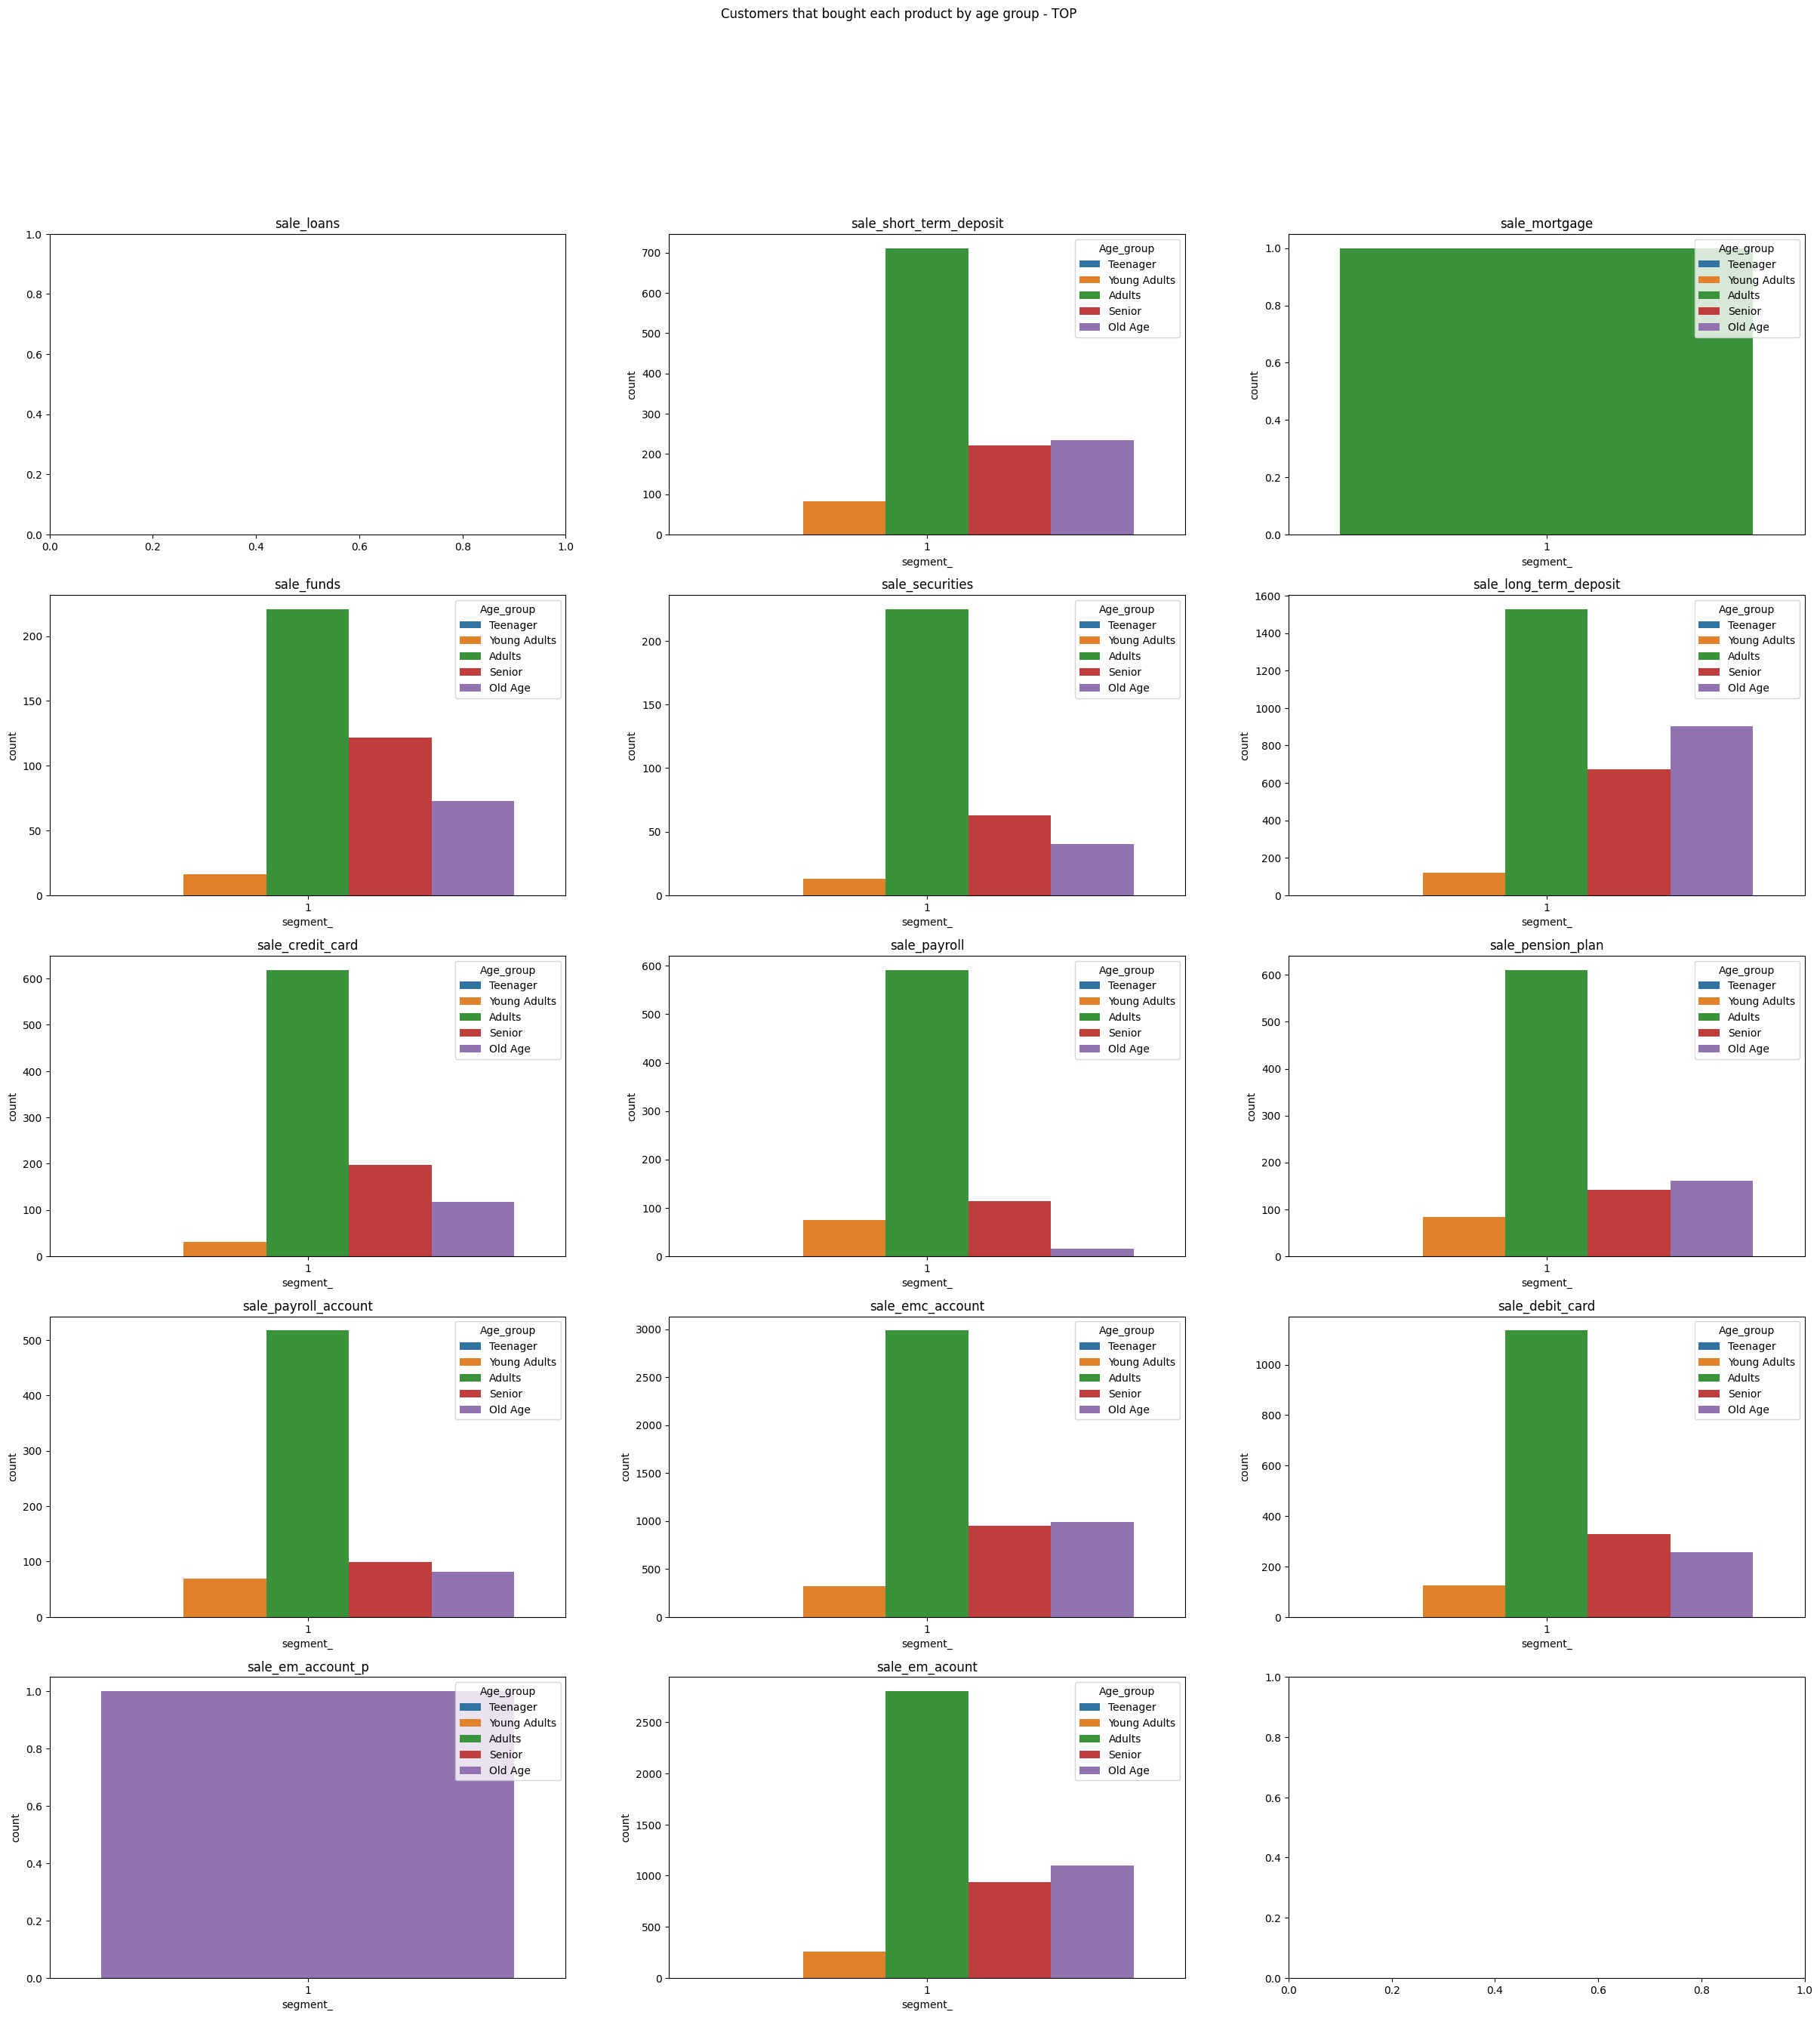

In [368]:
def show_frequency_plots(df,col_plt):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle('Customers that bought each product by age group - TOP')
    fig.set_size_inches(30,30)

    k=0
    for dx in [0,1,2,3,4]:
            for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="segment_", ax=axes[dx][idx], hue="Age_group").set_title(feature)
            k+=3
            
show_frequency_plots(sales_included_df[sales_included_df["segment_"]==1],col_sales)

From the plots above one can see that the group age Adults has a strong relation with the segment Top.

## 3. Salary

In [369]:
sales_included_df[["salary"]].describe().T

count          mean            std  min  25%       50%        75%  \
salary  5962924.0  86447.184957  179616.077174 -1.0 -1.0  69696.21  113462.19   

                max  
salary  28894395.51

Let's consider 2 groups of customers:
* **1**: earn above the 3rd quartil;
* **0**: earn below the 3rd quartil;

In [370]:
conditions = [
    (sales_included_df['salary']>113462.2),
    (sales_included_df['salary']<=113462.2)
    ]
sales_included_df['salary_level'] = np.select(conditions, [1,0])

### 3.1 Number of customers that buy each product by salary level

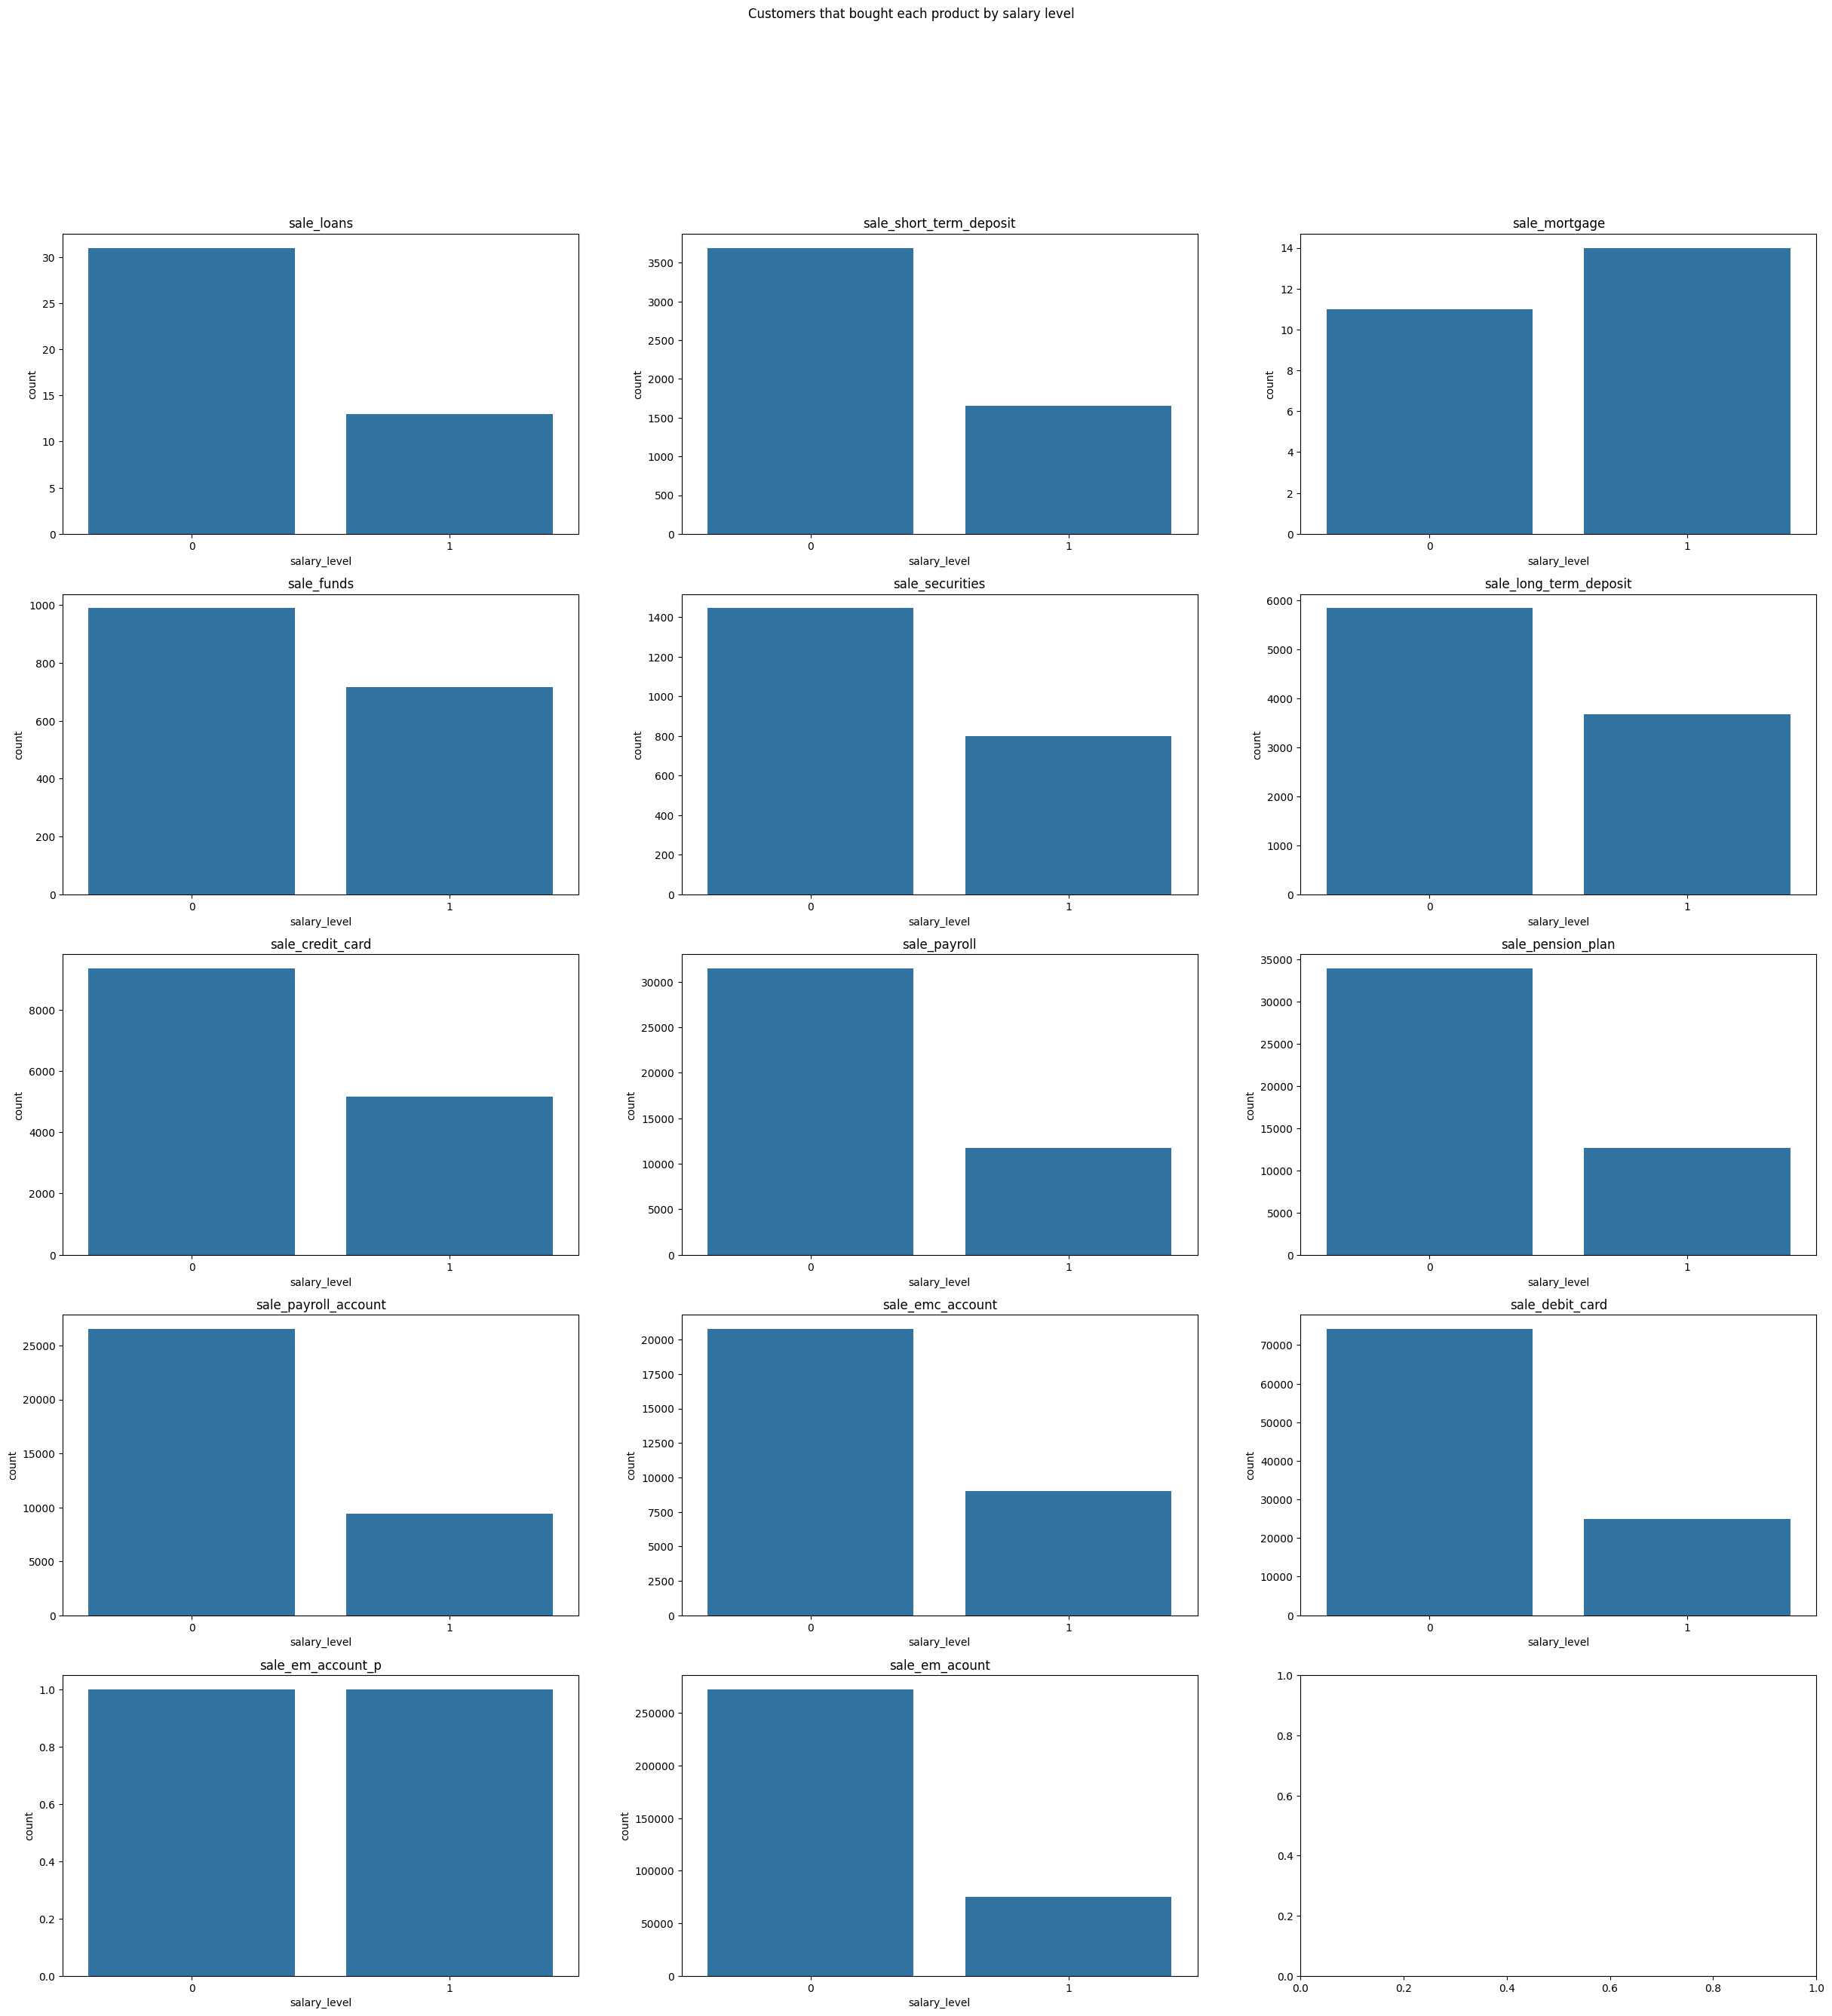

In [371]:
def show_frequency_plots(df,col_plt):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle('Customers that bought each product by salary level')
    fig.set_size_inches(30,30)

    k=0
    for dx in [0,1,2,3,4]:
            for idx, feature in enumerate(col_plt[k:3+k]):
                sns.countplot(data=df[df[feature]==1], x="salary_level", ax=axes[dx][idx]).set_title(feature)
            k+=3
            
show_frequency_plots(sales_included_df,col_sales)

From the plots above one can see that the it's not clear the difference between the 2 groups, as soon as the number of customers in the group of lower salary is higher. However for products like funds, long term securities and securitis, the diference is lower comparing with other products.

### 3.2 Number of customers that buy each product by salary level (and segment)

Let's have a look on the distribution of salary level in each segment:
* **TOP**: 0.96% and 0.68% of customers are in the group of lower salaries and higher salaries respectively (59% vs 41% if we consider the proportion on the group);
* **PARTICULARES**: 22.81% and 7.90% of customers are in the group of lower salaries and higher salaries respectively (74% vs 26% if we consider the proportion on the group);
* **UNIVERSITARIOS**: 49.18% and 16.22% of customers are in the group of lower salaries and higher salaries respectively (75% vs 25% if we consider the proportion on the group);

So, it's clear that the percentage in the top group of higher salaries tends to be higher than the others (41% versus 26/25%).

In [372]:
total_=sales_included_df[["salary_level","pk_cid","segment_"]].groupby(["segment_","salary_level"]).count().sum()
table=sales_included_df[["salary_level","pk_cid","segment_"]].groupby(["segment_","salary_level"]).count()/total_*100
table=table.rename(columns={"pk_cid":"percentage"})
table

percentage
segment_ salary_level            
0        0               2.052718
         1               0.193563
1        0               0.957651
         1               0.684815
2        0              22.808911
         1               7.895405
3        0              49.180821
         1              16.226117

Let's have a look on the distribution of salary level in each age group:
* **TEENAGER**: 0.32% and 0.29% of customers are in the group of lower salaries and higher salaries respectively (52% vs 48% if we consider the proportion on the group);
* **YOUNG ADULTS**: 56.87% and 18.23% of customers are in the group of lower salaries and higher salaries respectively (76% vs 24% if we consider the proportion on the group);
* **ADULTS**: 14.26% and 4.74% of customers are in the group of lower salaries and higher salaries respectively (65% vs 35% if we consider the proportion on the group);
* **SENIOR**: 2.08% and 1.00% of customers are in the group of lower salaries and higher salaries respectively (68% vs 32% if we consider the proportion on the group);
* **OLD AGE**: 1.47% and 0.74% of customers are in the group of lower salaries and higher salaries respectively (67% vs 33% if we consider the proportion on the group);

So, it's clear that the percentage of higher salaries in the teengers' group tends to be higher than the others (48%).
The young adults are the ones with the more customers earning lower salaries.

In [373]:
total_=sales_included_df[["salary_level","pk_cid","Age_group"]].groupby(["Age_group","salary_level"]).count().sum()
table=sales_included_df[["salary_level","pk_cid","Age_group"]].groupby(["Age_group","salary_level"]).count()/total_*100
table=table.rename(columns={"pk_cid":"percentage"})
table

percentage
Age_group    salary_level            
Teenager     0               0.315231
             1               0.286370
Young Adults 0              56.874295
             1              18.230184
Adults       0              14.257636
             1               4.739487
Senior       0               2.079483
             1               0.999258
Old Age      0               1.473455
             1               0.744601

__________________
# F. NOTES
__________________

From all the analysis performed it was concluded that the more significant features to consider to create clusters of customers are the segment/age, salary, antiquity of the client and the amount of products he bought.

__________________
# G. SAVE THE FILES
__________________

In [374]:
sales_list = ['sale_loans',
           'sale_short_term_deposit',
 'sale_mortgage',
 'sale_funds',
 'sale_securities',
 'sale_long_term_deposit',
 'sale_credit_card',
 'sale_payroll',
 'sale_pension_plan',
 'sale_payroll_account',
 'sale_emc_account',
 'sale_debit_card',
 'sale_em_account_p',
 'sale_em_acount']

churn_list = ['churn_loans',
 'churn_short_term_deposit',
 'churn_mortgage',
 'churn_funds',
 'churn_securities',
 'churn_long_term_deposit',
 'churn_credit_card',
 'churn_payroll',
 'churn_pension_plan',
 'churn_payroll_account',
 'churn_emc_account',
 'churn_debit_card',
 'churn_em_account_p',
 'churn_em_acount']

In [376]:
sales_included_save_df=sales_included_df[['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'country_id',
       'region_code', 'gender', 'age', 'deceased', 'salary', 'salary_unknown',
       'Age_group', 'new_customer', 'sale_short_term_deposit', 'sale_loans', 'sale_mortgage', 'sale_funds',
       'sale_securities', 'sale_long_term_deposit', 'sale_credit_card',
       'sale_payroll', 'sale_pension_plan', 'sale_payroll_account',
       'sale_emc_account', 'sale_debit_card', 'sale_em_account_p',
       'sale_em_acount', 'churn_loans', 'churn_short_term_deposit',
       'churn_mortgage', 'churn_funds', 'churn_securities', 'churn_long_term_deposit',
       'churn_credit_card', 'churn_payroll', 'churn_pension_plan',
       'churn_payroll_account', 'churn_emc_account',
       'churn_debit_card', 'churn_em_account_p', 'churn_em_acount','entry_counting',
       'segment_', 'salary_level']]
sales_included_save_df["total_sales"] = sales_included_save_df[sales_list].sum(axis=1)
sales_included_save_df["total_churns"] = sales_included_save_df[churn_list].sum(axis=1)

In [377]:
sales_included_save_df.to_csv('sales_included_df.csv', index= False)
client_df.to_csv('client_df.csv', index= False)
sales_table.to_csv('sales_table.csv', index= False)
churn_table.to_csv('churn_table.csv', index= False)